# PATRONES QUE DETERMINAN SI UN JUEGO TIENE ÉXITO

La tienda online Ice, dedicada a la venta internacional de videojuegos, cuenta con una amplia base de datos que integra información histórica sobre títulos lanzados en diversas plataformas, sus ventas en distintas regiones del mundo y las valoraciones otorgadas tanto por usuarios como por críticos especializados. Con este conjunto de datos, la empresa busca comprender qué factores influyen en el éxito comercial de un videojuego con el fin de optimizar la planificación de campañas publicitarias y orientar la inversión hacia proyectos con mayor potencial.

El presente estudio se desarrolla bajo el supuesto de que es diciembre de 2016 y se requiere preparar una estrategia para el año 2017. Para ello, se dispone de un dataset que recopila información hasta 2016, aunque este último año podría estar incompleto. Dentro de la base de datos se incluyen variables relevantes como el nombre del juego, la plataforma de lanzamiento, el año de publicación, el género, las ventas en Norteamérica, Europa, Japón y otros mercados, además de las puntuaciones de críticos (escala 0–100), las puntuaciones de usuarios (escala 0–10) y la clasificación ESRB, asignada por la Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) que evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

El objetivo principal del proyecto es identificar patrones que permitan determinar los elementos asociados al éxito comercial de un videojuego, analizando tendencias de ventas por plataforma, género y región, así como la relación entre reseñas y comportamiento del mercado. Los resultados facilitarán la selección de los productos más prometedores y la definición de campañas publicitarias más efectivas.

A lo largo del análisis se realizarán tareas de preparación y limpieza de datos, exploración de patrones históricos, segmentación por región, evaluación del impacto de las críticas y la clasificación ESRB, y pruebas estadísticas orientadas a contrastar hipótesis relevantes para la industria. Este enfoque permitirá comprender la dinámica del mercado y brindar recomendaciones estratégicas basadas en evidencia.

## Inicialización

In [1]:
# Cargar todas las librerías

# Manipulación de datos
import pandas as pd #manipulación de datos
import numpy as np #operaciones númericas

# Visualización
import matplotlib.pyplot as plt # gráficos básicas
import seaborn as sns # gráficos estadísticos avanzados

# Análisis estadístico
from scipy import stats as st # pruebas de hipótesis
from scipy.stats import pearsonr # función de correlación

## Paso 1. Cargar datos e información general 

El primer paso en cualquier proyecto de análisis de datos consiste en la carga exitosa del dataset y la comprensión inicial de su estructura y características. Para este estudio, se trabajará con un conjunto de datos que contiene información histórica sobre videojuegos hasta 2016, proporcionado por la tienda online Ice.

En esta sección se procederá a cargar el dataset y realizar un análisis exploratorio inicial que permita identificar las características principales de los datos, incluyendo dimensiones, tipos de variables, presencia de valores ausentes y distribuciones básicas. Esta evaluación inicial será fundamental para diseñar la estrategia de preparación de datos en los pasos posteriores.

In [2]:
# Carga el archivo de datos del DataFrames

games = pd.read_csv('/datasets/games.csv') # datos sobre los juegos

In [3]:
# Verificación que los datos se cargaron correctamente y la cantidad de registros del archivo

print("Datos cargados exitosamente:")
print(f"- Videojuegos: {games.shape[0]} registros")

Datos cargados exitosamente:
- Videojuegos: 16715 registros


In [4]:
games.info() # Información general de videojuegos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Análisis exploratorio inicial de los datos

0. Name

- Valores ausentes: 2
- Posible causa: juegos sin nombre registrado o errores en la base de datos
- Tipo de dato: object (correcto para texto)

1. Platform

- Valores ausentes: 0
- Tipo de dato: object (correcto para categorías como plataformas)

2. Year_of_Release

- Valores ausentes: 269
- Posible causa: juegos sin fecha confirmada o datos incompletos
- Tipo de dato: float64 (se mantiene así debido a la presencia de valores nulos, aunque conceptualmente sería un entero)

3. Genre

- Valores ausentes: 2
- Posible causa: juegos sin clasificación de género
- Tipo de dato: object (correcto para categorías)

4. NA_sales

- Valores ausentes: 0
- Tipo de dato: float64 (correcto para cantidades decimales de ventas)
  
5. EU_sales

- Valores ausentes: 0
- Tipo de dato: float64 (correcto para cantidades decimales de ventas)

6. JP_sales

- Valores ausentes: 0
- Tipo de dato: float64 (correcto para cantidades decimales de ventas)

7. Other_sales

- Valores ausentes: 0
- Tipo de dato: float64 (correcto para cantidades decimales de ventas)

8. Critic_Score

- Valores ausentes: 8578
- Posible causa: ausencia de reseñas de críticos en una gran proporción de juegos
- Tipo de dato: float64 (correcto para una escala numérica)

9. User_Score

- Valores ausentes: 6701
- Posible causa: juegos sin suficientes reseñas de usuarios; también aparecen valores como “tbd”
- Tipo de dato: object (debería convertirse a float64 tras limpiar los valores no numéricos)

10. Rating

- Valores ausentes: 6766
- Posible causa: juegos sin clasificación ESRB asignada
- Tipo de dato: object (correcto para categorías de clasificación por edad)

In [5]:
games.sample(5)  # Muestra aleatoria de videojuegos

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15574,Virtual Kasparov,GBA,2002.0,Strategy,0.01,0.01,0.00,0.00,70.0,tbd,E
7822,Jampack: Summer 2003 (RP-T),PS2,2003.0,Misc,0.09,0.07,0.00,0.02,NaN,NaN,NaN
16545,Madagascar: Escape 2 Africa,PC,2008.0,Action,0.01,0.00,0.00,0.00,58.0,8,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
4903,Taiko no Tatsujin Wii: Ketteiban,Wii,2011.0,Misc,0.00,0.00,0.39,0.00,NaN,NaN,NaN


## Paso 2. Prepara los datos

La preparación de datos constituye una etapa fundamental para garantizar la calidad y confiabilidad del análisis posterior. Durante el análisis exploratorio inicial, se identificaron varios aspectos que requieren atención: inconsistencias en el formato de los nombres de columnas, tipos de datos que necesitan conversión, presencia significativa de valores ausentes (especialmente en las puntuaciones de críticos y usuarios), y la necesidad de crear métricas derivadas como las ventas totales globales.

Este capítulo aborda sistemáticamente cada uno de estos desafíos mediante cuatro pasos principales: estandarización de nombres de columnas, conversión de tipos de datos, tratamiento de valores ausentes y creación de variables derivadas. Cada decisión tomada durante este proceso se fundamenta en el objetivo final de construir un modelo predictivo robusto para identificar patrones de éxito en videojuegos.

### 2.1 Estandarización de nombres de columnas

La consistencia en el formato de los nombres de columnas es esencial para mantener un código limpio y evitar errores durante el análisis. Se procederá a convertir todos los nombres a minúsculas para seguir las mejores prácticas de programación en Python.

In [6]:
# Convertir nombres de columnas a minúsculas
games.columns = games.columns.str.lower()

# Verificar el cambio
print(games.columns.tolist())

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


### 2.2 Conversión de tipos de datos
Durante el análisis exploratorio se identificaron columnas con tipos de datos inadecuados que pueden afectar el rendimiento y precisión de los análisis posteriores. Este paso garantiza que cada variable tenga el tipo de dato más apropiado para su naturaleza y uso.

#### Conversión de year_of_release

In [7]:
# Conversión de year_of_release
print("=== CONVERSIÓN DE year_of_release ===")
print(f"Valores ausentes: {games['year_of_release'].isna().sum()} ({games['year_of_release'].isna().sum()/len(games)*100:.1f}%)")

# DataFrame principal: mantener como float64 para preservar NaN
print(f"Manteniendo como {games['year_of_release'].dtype} en dataset principal")

# Crear subset para análisis temporal
games_clean_years = games.dropna(subset=['year_of_release']).copy()
games_clean_years['year_of_release'] = games_clean_years['year_of_release'].astype(int)

print(f"\nDataset temporal: {len(games_clean_years)} juegos con año definido")
print(f"Rango temporal: {games_clean_years['year_of_release'].min()} - {games_clean_years['year_of_release'].max()}")

=== CONVERSIÓN DE year_of_release ===
Valores ausentes: 269 (1.6%)
Manteniendo como float64 en dataset principal

Dataset temporal: 16446 juegos con año definido
Rango temporal: 1980 - 2016


In [8]:
# Verificar que la conversión funcionó
print("=== VERIFICACIÓN DE CONVERSIÓN ===")
print(f"Tipo en games (original): {games['year_of_release'].dtype}")
print(f"Tipo en games_clean_years: {games_clean_years['year_of_release'].dtype}")
print(f"NaN en games: {games['year_of_release'].isna().sum()}")
print(f"NaN en games_clean_years: {games_clean_years['year_of_release'].isna().sum()}")

# Mostrar algunos valores para confirmar
print(f"\nMuestra de años en games_clean_years:")
print(games_clean_years['year_of_release'].head())

=== VERIFICACIÓN DE CONVERSIÓN ===
Tipo en games (original): float64
Tipo en games_clean_years: int64
NaN en games: 269
NaN en games_clean_years: 0

Muestra de años en games_clean_years:
0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64


#### Conversion de user_score

In [9]:
# Análisis detallado de user_score antes de la conversión
print("=== ANÁLISIS DE user_score ANTES DE LA CONVERSIÓN ===")
print(f"Tipo de dato actual: {games['user_score'].dtype}")
print(f"Total de registros: {len(games['user_score'])}")
print(f"Valores no nulos: {games['user_score'].notna().sum()}")
print(f"Valores nulos: {games['user_score'].isna().sum()}")

print("\n--- Valores únicos no numéricos ---")

# Identificar valores que no son numéricos (excluyendo NaN)
non_numeric = games['user_score'][games['user_score'].notna() & 
                                  ~games['user_score'].astype(str).str.replace('.', '').str.isdigit()]
print(f"Cantidad de valores 'tbd': {(games['user_score'] == 'tbd').sum()}")
print(f"Otros valores no numéricos: {non_numeric[non_numeric != 'tbd'].value_counts()}")

print("\n--- Muestra de valores actuales ---")
print(games['user_score'].value_counts().head(10))

=== ANÁLISIS DE user_score ANTES DE LA CONVERSIÓN ===
Tipo de dato actual: object
Total de registros: 16715
Valores no nulos: 10014
Valores nulos: 6701

--- Valores únicos no numéricos ---
Cantidad de valores 'tbd': 2424
Otros valores no numéricos: Series([], Name: user_score, dtype: int64)

--- Muestra de valores actuales ---
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: user_score, dtype: int64


In [10]:
# CONVERSIÓN DE TIPOS DE DATOS

# 1. Preservar datos originales en user_score_raw
games['user_score_raw'] = games['user_score'].copy()

# 2. Convertir user_score a numérico (columna principal para análisis)
# Los valores 'tbd' y otros no numéricos se convertirán automáticamente a NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# 3. Verificar la conversión realizada
print("=== RESULTADOS DE LA CONVERSIÓN ===")
print(f"user_score_raw (datos originales): {games['user_score_raw'].dtype}")
print(f"user_score (convertido para análisis): {games['user_score'].dtype}")

print("\n--- Estadísticas de la conversión ---")
print(f"Valores 'tbd' en datos originales: {(games['user_score_raw'] == 'tbd').sum()}")
print(f"Valores numéricos válidos en user_score: {games['user_score'].notna().sum()}")
print(f"Valores NaN en user_score después de conversión: {games['user_score'].isna().sum()}")

print("\n--- Comparación de rangos ---")
print("Estadísticas de user_score (numérico):")
print(games['user_score'].describe())

=== RESULTADOS DE LA CONVERSIÓN ===
user_score_raw (datos originales): object
user_score (convertido para análisis): float64

--- Estadísticas de la conversión ---
Valores 'tbd' en datos originales: 2424
Valores numéricos válidos en user_score: 7590
Valores NaN en user_score después de conversión: 9125

--- Comparación de rangos ---
Estadísticas de user_score (numérico):
count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


### 2.3 Documentación de cambios en tipos de datos

Es fundamental documentar y justificar cada conversión realizada para mantener la transparencia del proceso analítico y facilitar la reproducibilidad del estudio. A continuación se detallan las columnas que requirieron modificaciones en sus tipos de datos, las estrategias implementadas y las justificaciones técnicas correspondientes.

Durante el análisis exploratorio se identificaron dos columnas principales que necesitaban conversión de tipos: **year_of_release** y **user_score**. Ambas presentaban desafíos específicos que requirieron estrategias diferenciadas para preservar la integridad de los datos originales mientras se optimizaba su uso para análisis posteriores.

La estrategia general adoptada se basó en el **principio de preservación**: mantener los datos originales intactos y crear versiones optimizadas para análisis específicos, garantizando así la trazabilidad y la posibilidad de revertir cualquier transformación si fuera necesario.

#### 1. year_of_release
- Cambio realizado:
  - Dataset original (games): Mantenido como float64
  - Dataset limpio (games_clean_years): Convertido a int64
- Justificación:
  - La columna tenía 269 valores ausentes (1.6% del total)
  - Pandas no puede almacenar valores NaN en columnas de tipo entero
- Estrategia implementada:
  - Preservar el dataset original con float64 para mantener todos los datos
  - Crear un subset limpio (games_clean_years) con int64 para análisis temporales específicos
- Beneficios:
  - Conserva la integridad de los datos originales
  - Permite análisis temporal preciso cuando sea necesario
  - Evita pérdida de información por eliminación prematura de registros

#### 2. user_score
- Cambio realizado:
  - Tipo original: object (contenía texto y números)
  - Tipo convertido: float64 (solo valores numéricos)
  - Columna adicional: user_score_raw (preserva datos originales)
- Justificación:
  - La columna contenía 2,424 valores "tbd" (to be determined) que impedían cálculos numéricos
- Estrategia implementada:
  - Conversión con pd.to_numeric(errors='coerce') que convierte valores no numéricos a NaN
  - Preservación de datos originales en user_score_raw
  - Resultado: 7,590 valores numéricos válidos para análisis estadístico
- Beneficios:
  - Permite cálculos estadísticos y correlaciones
  - Mantiene trazabilidad de los datos originales
  - Facilita análisis de relación entre puntuaciones de usuarios y ventas

### 2.4 Tratamiento de valores ausentes
Basándose en el análisis exploratorio inicial, se implementará una estrategia específica para cada columna con valores ausentes. La decisión principal adoptada es la preservación en lugar de eliminación, manteniendo la integridad del dataset completo mientras se crean versiones optimizadas para análisis específicos cuando sea necesario.

#### Estrategias de tratamiento de valores ausentes

1. name (2 valores ausentes - 0.01%)
- Decisión: Mantener valores ausentes como NaN en el dataset principal.
- Justificación: Porcentaje insignificante que no afecta el análisis. Los registros conservan información valiosa de ventas y puntuaciones.
- Causa probable: Errores en la entrada de datos durante la catalogación o juegos con nombres no registrados correctamente en la base de datos original.

2. year_of_release (269 valores ausentes - 1.6%)
- Decisión: Mantener valores ausentes como NaN en el dataset principal.
- Justificación: Porcentaje mínimo que no compromete la representatividad. Se creó subset limpio (games_clean_years) para análisis temporales específicos.
- Causa probable: Juegos con fechas de lanzamiento no confirmadas, registros históricos incompletos de títulos antiguos, o errores en la catalogación de la base de datos original.

3. genre (2 valores ausentes - 0.01%)
- Decisión: Mantener valores ausentes como NaN en el dataset principal.
- Justificación: Porcentaje insignificante que no afecta el análisis. Los registros conservan información valiosa de ventas por región.
- Causa probable: Juegos sin clasificación de género asignada durante el proceso de catalogación o títulos con géneros ambiguos difíciles de categorizar.

4. critic_score (8.578 valores ausentes - 51.3%)
- Decisión: Mantener valores ausentes como NaN en el dataset principal.
- Justificación: Alta proporción de ausentes refleja la realidad del mercado, muchos juegos no reciben reseñas profesionales, especialmente títulos independientes o de menor presupuesto.
- Causa probable: Ausencia de cobertura crítica para juegos independientes, títulos de nicho, plataformas con menor visibilidad mediática, o juegos lanzados sin campañas de marketing dirigidas a medios especializados.

5. user_score (9.125 valores ausentes después de conversión)
- Decisión: Convertir valores "tbd" a NaN y preservar datos originales en user_score_raw.
- Justificación: Los 2,424 valores "tbd" representaban información explícita sobre el estado de las puntuaciones ("to be determined" = a determinar). La conversión a NaN permite análisis numérico mientras se mantiene la trazabilidad. Los 6,701 valores ausentes originales se conservaron para análisis de patrones de disponibilidad de datos.
- Causa probable: Juegos recién lanzados sin suficientes evaluaciones de usuarios, títulos con baja popularidad que no generan participación comunitaria, o juegos en plataformas con menor base de usuarios activos para calificaciones. Los valores "tbd" específicamente indican casos donde la plataforma reconoce la necesidad de una puntuación pero aún no tiene datos suficientes para calcularla.
- Manejo específico de valores "TBD":
  - Interpretación: "To be determined" indica puntuaciones explícitamente marcadas como pendientes por la plataforma de origen
  - Estrategia implementada: Conversión sistemática a NaN para habilitar cálculos estadísticos
  - Preservación: Mantenimiento de valores originales en user_score_raw para análisis alternativos
  - Beneficio: Permite distinguir entre ausencia natural de datos vs. estado explícito de "pendiente"

6. rating (6.766 valores ausentes - 40.5%)
- Decisión: Mantener valores ausentes como NaN en el dataset principal.
- Justificación: Refleja que una proporción significativa de juegos no tiene clasificación ESRB, lo cual es información válida sobre la disponibilidad de este tipo de datos en el mercado.
- Causa probable: Juegos lanzados antes del establecimiento del sistema ESRB (1994), títulos distribuidos en mercados sin esta clasificación, juegos independientes que no pasaron por el proceso de certificación, o plataformas que no requerían clasificación ESRB en ciertos períodos.

### 2.5 Creación de variable de ventas totales
Para facilitar el análisis del éxito comercial global de los videojuegos, se creará una nueva columna que consolide las ventas de todas las regiones en una métrica única y comprehensiva.

Se implementará en ambos datasets:

- Dataset principal (games): Columna total_sales para análisis completo
- Dataset temporal (games_clean_years): Columna total_sales_clean para análisis

In [11]:
# Calcular ventas totales globales

# Sumar las ventas de todas las regiones: NA, EU, JP y Other
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Verificar la creación de la nueva columna
print("=== CREACIÓN DE VENTAS TOTALES ===")
print(f"Nueva columna 'total_sales' creada exitosamente")
print(f"Registros procesados: {len(games)}")
print(f"Valores nulos en total_sales: {games['total_sales'].isna().sum()}")

=== CREACIÓN DE VENTAS TOTALES ===
Nueva columna 'total_sales' creada exitosamente
Registros procesados: 16715
Valores nulos en total_sales: 0


In [12]:
games.sample(5)  # Muestra aleatoria de videojuegos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_raw,total_sales
1676,F1 2011,PS3,2011.0,Racing,0.12,0.74,0.11,0.24,82.0,7.1,E,7.1,1.21
685,James Bond 007: Everything or Nothing,PS2,2004.0,Shooter,0.85,1.06,0.09,0.32,84.0,9.1,T,9.1,2.32
14828,Gotcha Force,GC,2003.0,Shooter,0.01,0.00,0.01,0.00,56.0,8.2,E,8.2,0.02
10604,Bee Movie Game,PS2,2007.0,Action,0.05,0.04,0.00,0.01,65.0,7.5,E,7.5,0.10
14544,Looney Tunes: Galactic Sports,PSV,2015.0,Action,0.00,0.02,0.00,0.01,NaN,NaN,NaN,tbd,0.03


In [13]:
# Agregar ventas totales al DataFrame limpio para análisis temporal
games_clean_years['total_sales_clean'] = (games_clean_years['na_sales'] + 
                                         games_clean_years['eu_sales'] + 
                                         games_clean_years['jp_sales'] + 
                                         games_clean_years['other_sales'])

# Verificar información básica de la nueva columna
print("=== VERIFICACIÓN DE total_sales_clean ===")
print(f"Registros procesados: {len(games_clean_years)}")
print(f"Valores nulos en total_sales_clean: {games_clean_years['total_sales_clean'].isnull().sum()}")
print(f"Tipo de datos: {games_clean_years['total_sales_clean'].dtype}")

=== VERIFICACIÓN DE total_sales_clean ===
Registros procesados: 16446
Valores nulos en total_sales_clean: 0
Tipo de datos: float64


## Paso 3. Analiza los datos

Con los datos preparados y las ventas totales calculadas, se procede al análisis exploratorio para identificar patrones que determinen el éxito de los videojuegos. Este análisis se enfoca en construir un modelo predictivo para 2017, evaluando tendencias temporales, comportamiento de plataformas y factores que influyen en las ventas.

### 3.1 Juegos fueron lanzados en diferentes años

In [14]:
# Análisis de juegos lanzados por año
print("=== ANÁLISIS TEMPORAL DE LANZAMIENTOS ===")

# Contar juegos por año
yearly_releases = games_clean_years['year_of_release'].value_counts().sort_index()

print(f"Período analizado: {yearly_releases.index.min()} - {yearly_releases.index.max()}")
print(f"Total de juegos con año definido: {len(games_clean_years)}")
print(f"Promedio de juegos por año: {yearly_releases.mean():.1f}")

# Mostrar estadísticas por décadas
print("\n--- Lanzamientos por década ---")
decades = games_clean_years['year_of_release'] // 10 * 10
decade_counts = decades.value_counts().sort_index()
for decade, count in decade_counts.items():
    print(f"{int(decade)}s: {count} juegos ({count/len(games_clean_years)*100:.1f}%)")

# Análisis de los últimos años (relevantes para modelo 2017)

print("\n--- Análisis de años recientes ---")
recent_years = yearly_releases[(yearly_releases.index >= 2010) & (yearly_releases.index <= 2016)]
for year, count in recent_years.items():
    print(f"{year}: {count} juegos")
print(f"\nTotal 2010-2016: {recent_years.sum()} juegos ({recent_years.sum()/len(games_clean_years)*100:.1f}% del total)")

=== ANÁLISIS TEMPORAL DE LANZAMIENTOS ===
Período analizado: 1980 - 2016
Total de juegos con año definido: 16446
Promedio de juegos por año: 444.5

--- Lanzamientos por década ---
1980s: 205 juegos (1.2%)
1990s: 1771 juegos (10.8%)
2000s: 9193 juegos (55.9%)
2010s: 5277 juegos (32.1%)

--- Análisis de años recientes ---
2010: 1255 juegos
2011: 1136 juegos
2012: 653 juegos
2013: 544 juegos
2014: 581 juegos
2015: 606 juegos
2016: 502 juegos

Total 2010-2016: 5277 juegos (32.1% del total)


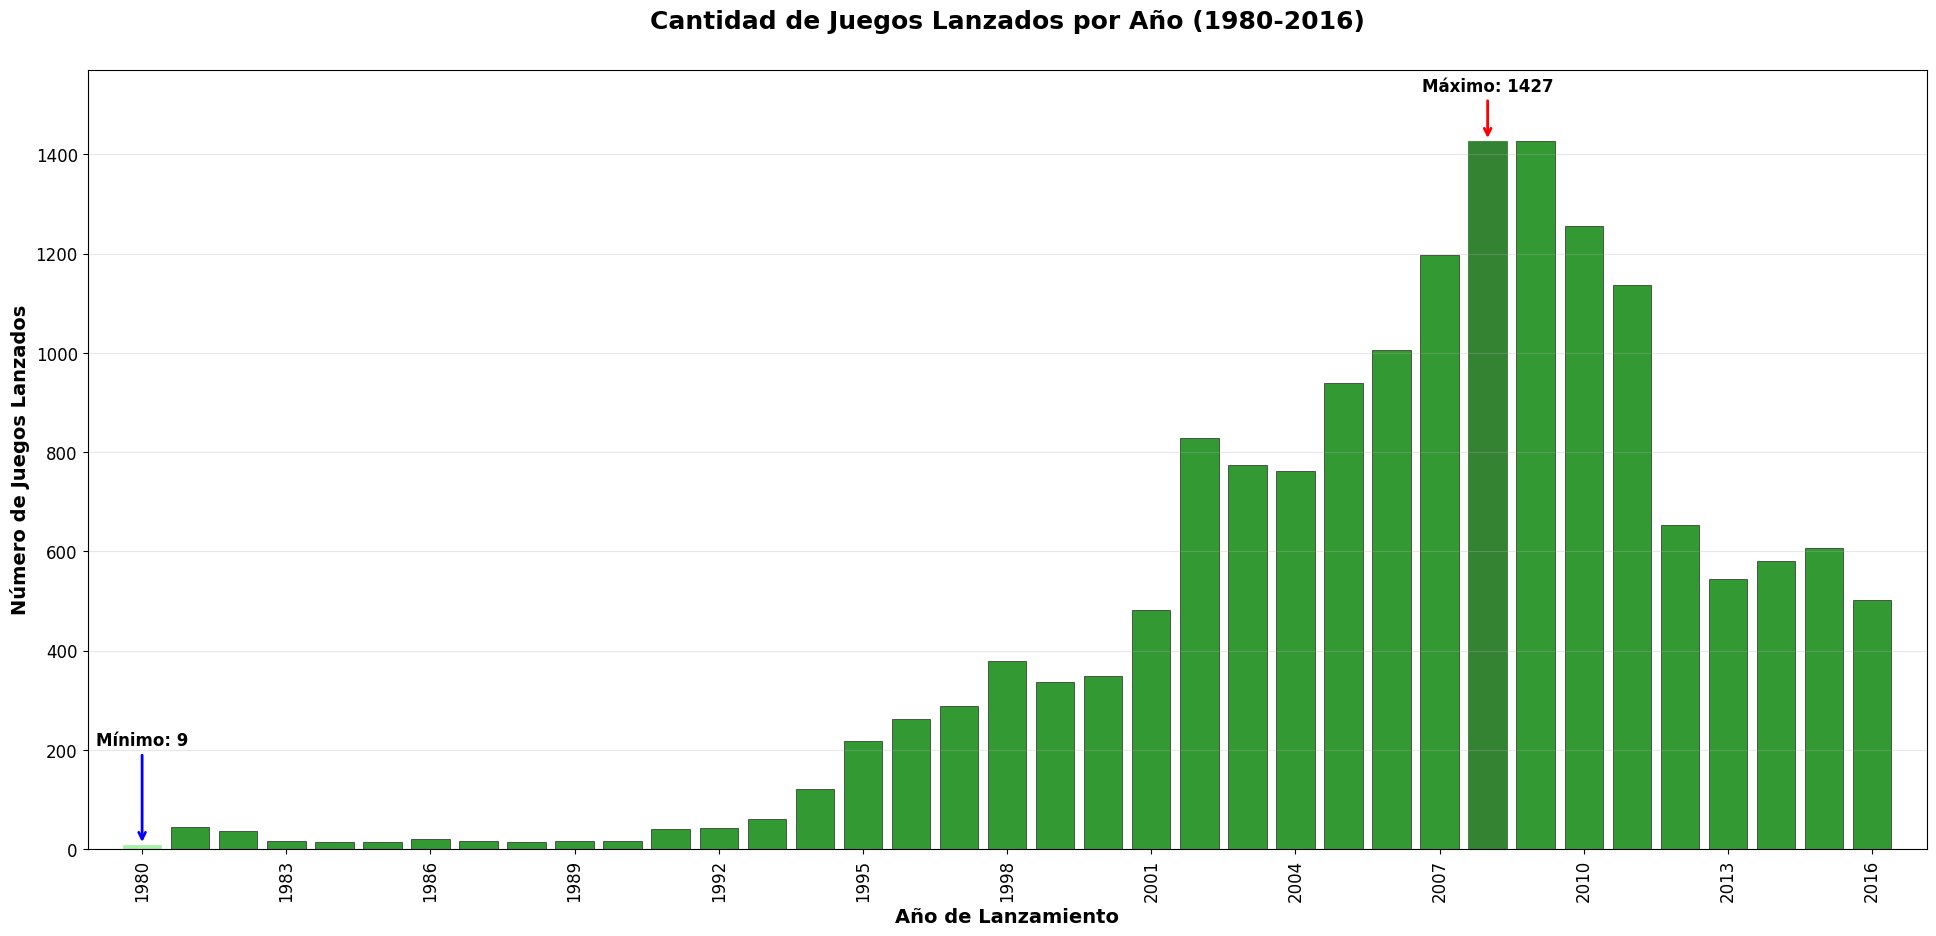

In [15]:
# Encontrar valores máximo y mínimo
max_year = yearly_releases.idxmax()
max_value = yearly_releases.max()
min_year = yearly_releases.idxmin()
min_value = yearly_releases.min()

# Crear el gráfico
plt.figure(figsize=(20, 10))  # Aumentamos el tamaño

# Crear el gráfico de barras
bars = plt.bar(yearly_releases.index, yearly_releases.values,
               color='green', alpha=0.8, edgecolor='black', linewidth=0.5,
               width=0.8)  # Ajustar el ancho de las barras

# Personalizar el gráfico
plt.title('Cantidad de Juegos Lanzados por Año (1980-2016)',
          fontsize=18, fontweight='bold', pad=30)
plt.xlabel('Año de Lanzamiento', fontsize=14, fontweight='bold')
plt.ylabel('Número de Juegos Lanzados', fontsize=14, fontweight='bold')

# Configurar el eje X 
plt.xticks(range(1980, 2017, 3), rotation=90, fontsize=12)  # Cada 3 años
plt.yticks(fontsize=12)

# Agregar más espacio en los márgenes
plt.margins(x=0.02, y=0.1)  # Márgenes en X e Y

plt.grid(axis='y', alpha=0.3)

# Resaltar los valores máximo y mínimo
max_bar_index = list(yearly_releases.index).index(max_year)
min_bar_index = list(yearly_releases.index).index(min_year)

bars[max_bar_index].set_color('darkgreen')
bars[min_bar_index].set_color('lightgreen')

# Etiquetas mejoradas
plt.annotate(f'Máximo: {max_value}', 
             xy=(max_year, max_value), 
             xytext=(max_year, max_value + 100),
             ha='center', fontweight='bold', fontsize=12,
             arrowprops=dict(arrowstyle='->', color='red', lw=2))

plt.annotate(f'Mínimo: {min_value}', 
             xy=(min_year, min_value), 
             xytext=(min_year, min_value + 200),
             ha='center', fontweight='bold', fontsize=12,
             arrowprops=dict(arrowstyle='->', color='blue', lw=2))

# Ajustar el layout 
plt.tight_layout(pad=3.0)
plt.show()

### ¿Son significativos los datos de cada período?

Sí, los datos de cada período son altamente significativos, pero con diferentes niveles de relevancia para nuestro objetivo de construir un modelo predictivo para 2017:

**Períodos con alta significancia estadística:**
- 2012-2016 (Período de análisis propuesto):
  - Significancia: MUY ALTA
  - Razón: Consistencia en el volumen de lanzamientos de juegos por año
  - Relevancia para modelo 2017: CRÍTICA - Datos más recientes y directamente aplicables para predicciones
  - Justificación: Este período muestra estabilidad en la actividad de la industria, lo que garantiza datos comparables entre años
    

- 2000-2011 (Época de crecimiento exponencial):
  - Significancia: MEDIA para análisis histórico
  - Razón: Mayor volumen de lanzamientos, expansión significativa de la industria
  - Relevancia para modelo 2017: LIMITADA - Útil para entender patrones históricos, pero puede no reflejar el mercado actual


**Períodos con significancia limitada:**
- 2016 (Datos posiblemente incompletos):
  - Significancia: ALTA para tendencias más recientes
  - Precaución: Los datos pueden estar incompletos según se menciona en la descripción del proyecto
  - Relevancia: CRÍTICA para validar tendencias, pero requiere verificación de completitud
- Antes del 2000:
  - Significancia: BAJA para predicción 2017
  - Razón: Volumen de lanzamientos considerablemente menor, contexto de mercado tecnológico y cultural muy diferente

#### Conclusión preliminar:
El período 2012-2016 presenta la mayor significancia para nuestro modelo predictivo porque:

- Mantiene consistencia en el volumen de lanzamientos que garantiza comparabilidad estadística
- Representa el contexto más cercano a 2017 sin alejarse demasiado del período objetivo
- Evita la volatilidad de los años de crecimiento exponencial (2008-2011)
- Incluye suficientes años para identificar tendencias sin incluir datos obsoletos
- Los datos anteriores a 2012 son valiosos para contexto histórico, pero podrían introducir ruido en las predicciones al reflejar un mercado significativamente diferente al actual.

In [16]:
# Obtener datos de lanzamientos por año
years_analysis = [2012, 2013, 2014, 2015, 2016]
yearly_counts = {}

for year in years_analysis:
    count = len(games_clean_years[games_clean_years['year_of_release'] == year])
    yearly_counts[year] = count

print("Lanzamientos por año:")
for year, count in yearly_counts.items():
    print(f"{year}: {count} juegos")

print("\n=== VARIACIONES PORCENTUALES AÑO A AÑO ===")

# Calcular variaciones porcentuales
for i in range(len(years_analysis) - 1):
    year_actual = years_analysis[i]
    year_siguiente = years_analysis[i + 1]
    
    count_actual = yearly_counts[year_actual]
    count_siguiente = yearly_counts[year_siguiente]
    
    # Calcular porcentaje de cambio
    variacion = ((count_siguiente - count_actual) / count_actual) * 100
    
    # Determinar si es aumento o disminución
    direccion = "↗️ aumento" if variacion > 0 else "↘️ disminución"
    
    print(f"{year_actual} → {year_siguiente}: {variacion:+.1f}% ({direccion})")
    print(f"   {count_actual} → {count_siguiente} juegos")

# Calcular variación total del período
variacion_total = ((yearly_counts[2016] - yearly_counts[2012]) / yearly_counts[2012]) * 100
print(f"\n=== VARIACIÓN TOTAL DEL PERÍODO ===")
print(f"2012 → 2016: {variacion_total:+.1f}%")
print(f"De {yearly_counts[2012]} a {yearly_counts[2016]} juegos")

Lanzamientos por año:
2012: 653 juegos
2013: 544 juegos
2014: 581 juegos
2015: 606 juegos
2016: 502 juegos

=== VARIACIONES PORCENTUALES AÑO A AÑO ===
2012 → 2013: -16.7% (↘️ disminución)
   653 → 544 juegos
2013 → 2014: +6.8% (↗️ aumento)
   544 → 581 juegos
2014 → 2015: +4.3% (↗️ aumento)
   581 → 606 juegos
2015 → 2016: -17.2% (↘️ disminución)
   606 → 502 juegos

=== VARIACIÓN TOTAL DEL PERÍODO ===
2012 → 2016: -23.1%
De 653 a 502 juegos


### 3.2 Ventas por plataformas

#### Selección del marco temporal para la predicción

Para construir un modelo predictivo confiable para las ventas de videojuegos en 2017, he decidido enfocar el análisis en el período 2012-2016, excluyendo años anteriores por las siguientes razones fundamentadas:

1. Relevancia Temporal para Predicciones: Los datos del período 2012-2016 representan el contexto más cercano y relevante para predecir el comportamiento del mercado en 2017. Los años anteriores (2008-2011) reflejan un ecosistema de gaming significativamente diferente, con plataformas y tendencias que ya no son representativas del mercado actual.

2. Consistencia en el Volumen de Lanzamientos: El análisis de la cantidad de juegos lanzados por año revela que el período 2012-2016 mantiene una consistencia en el volumen de lanzamientos, lo que garantiza que los datos sean comparables entre años y que las tendencias observadas sean estadísticamente significativas.

3. Optimización Visual y Analítica: La concentración en este período (2012-2016 ) permite:
- Gráficos más legibles al eliminar el ruido de datos obsoletos
- Cálculos más significativos al trabajar con plataformas activas
- Tendencias más claras en cuanto a crecimiento y declive de plataformas

In [17]:
# Crear tabla de ventas por plataforma y año
platform_yearly = games_clean_years.groupby(['year_of_release', 'platform'])['total_sales_clean'].sum().unstack(fill_value=0)

In [18]:
# Comparar la actividad de plataformas en diferentes períodos
print("=== PLATAFORMAS ACTIVAS POR PERÍODO ===")
period_2000_2011 = platform_yearly.loc[2000:2011].sum(axis=0)
period_2012_2016 = platform_yearly.loc[2012:2016].sum(axis=0)

# Ver cuántas plataformas tienen ventas significativas en cada período
active_2000_2011 = (period_2000_2011 > 10).sum()
active_2012_2016 = (period_2012_2016 > 10).sum()

print(f"Plataformas activas 2000-2011: {active_2000_2011}")
print(f"Plataformas activas 2012-2016: {active_2012_2016}")

=== PLATAFORMAS ACTIVAS POR PERÍODO ===
Plataformas activas 2000-2011: 14
Plataformas activas 2012-2016: 11


In [19]:
# Ver las plataformas más activas en 2012-2016
top_platforms_recent = period_2012_2016[period_2012_2016 > 10].sort_values(ascending=False)
print("=== TOP PLATAFORMAS 2012-2016 ===")
print(top_platforms_recent)

=== TOP PLATAFORMAS 2012-2016 ===
platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
dtype: float64


In [20]:
# Analizar plataformas activas específicamente en 2016
print("=== ANÁLISIS DETALLADO DE 2016 ===")
ventas_2016 = platform_yearly.loc[2016]

# Filtrar plataformas con ventas significativas en 2016
activas_2016 = ventas_2016[ventas_2016 > 5].sort_values(ascending=False)
print(f"Plataformas con ventas > 5M en 2016: {len(activas_2016)}")
print("\n=== TOP PLATAFORMAS 2016 ===")
print(activas_2016)

# Ver también las que tienen ventas menores pero no cero
print(f"\n=== PLATAFORMAS CON ALGUNA ACTIVIDAD EN 2016 ===")
todas_activas_2016 = ventas_2016[ventas_2016 > 0].sort_values(ascending=False)
print(f"Total de plataformas con ventas > 0: {len(todas_activas_2016)}")
print(todas_activas_2016)

=== ANÁLISIS DETALLADO DE 2016 ===
Plataformas con ventas > 5M en 2016: 4

=== TOP PLATAFORMAS 2016 ===
platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
Name: 2016, dtype: float64

=== PLATAFORMAS CON ALGUNA ACTIVIDAD EN 2016 ===
Total de plataformas con ventas > 0: 9
platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: 2016, dtype: float64


In [21]:
# Calcular el total de ventas en 2016
total_2016 = ventas_2016.sum()
print(f"Total de ventas en 2016: {total_2016:.2f} millones")

# Calcular porcentajes
porcentajes_2016 = (ventas_2016 / total_2016 * 100).round(2)
print("Porcentajes por plataforma en 2016:")
print(porcentajes_2016[porcentajes_2016 > 0].sort_values(ascending=False))

Total de ventas en 2016: 129.94 millones
Porcentajes por plataforma en 2016:
platform
PS4     53.29
XOne    20.12
3DS     11.65
PC       4.04
WiiU     3.54
PSV      3.27
PS3      2.77
X360     1.17
Wii      0.14
Name: 2016, dtype: float64


In [22]:
print("=== IDENTIFICACIÓN DE PLATAFORMAS ACTIVAS DESDE 2012 ===")

# Calcular ventas totales por plataforma en el periodo 2012-2016
period_2012_2016 = platform_yearly.loc[2012:2016].sum(axis=0)

# Filtrar plataformas con ventas > 0 millones en el periodo
plataformas_activas = period_2012_2016[period_2012_2016 > 0].index.tolist()

print(f"Plataformas activas desde 2012 (>0M ventas): {len(plataformas_activas)}")
print("Plataformas seleccionadas:", plataformas_activas)

# Crear tabla solo para plataformas activas
years_analysis = [2012, 2013, 2014, 2015, 2016]

print("\n=== TABLA ENFOCADA: PLATAFORMAS ACTIVAS 2012-2016 ===")

# Ventas en millones con formato plataformas en filas, años en columnas
print("\n--- VENTAS EN MILLONES DE DÓLARES ---")
ventas_activas_formato = pd.DataFrame()
for year in years_analysis:
    ventas_activas_formato[year] = platform_yearly.loc[year, plataformas_activas].round(2)
ventas_activas_formato.index = plataformas_activas
ventas_activas_formato

=== IDENTIFICACIÓN DE PLATAFORMAS ACTIVAS DESDE 2012 ===
Plataformas activas desde 2012 (>0M ventas): 11
Plataformas seleccionadas: ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

=== TABLA ENFOCADA: PLATAFORMAS ACTIVAS 2012-2016 ===

--- VENTAS EN MILLONES DE DÓLARES ---


,2012,2013,2014,2015,2016
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,0.00,0.00,0.00
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,0.00
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,99.74,88.58,34.74,11.96,1.52


In [23]:
# Porcentajes con el mismo formato
print("\n--- PORCENTAJES POR AÑO ---")
porcentajes_activas = pd.DataFrame()

for year in years_analysis:
    total_year = platform_yearly.loc[year].sum()
    porcentajes_year = (platform_yearly.loc[year, plataformas_activas] / total_year * 100).round(2)
    porcentajes_activas[year] = porcentajes_year

porcentajes_activas.index = plataformas_activas
porcentajes_activas


--- PORCENTAJES POR AÑO ---


,2012,2013,2014,2015,2016
3DS,14.43,15.66,13.20,10.37,11.65
DS,3.09,0.43,0.00,0.00,0.00
PC,6.53,3.43,4.01,3.18,4.04
PS3,30.17,31.35,14.41,6.28,2.77
PS4,0.00,7.19,30.16,44.37,53.29
PSP,2.16,0.87,0.07,0.04,0.00
PSV,4.55,2.93,3.59,2.33,3.27
Wii,6.10,2.38,1.13,0.43,0.14
WiiU,4.93,5.99,6.64,6.10,3.54
X360,28.03,24.52,10.48,4.46,1.17


In [24]:
# Tabla combinada
print("\n=== TABLA COMBINADA: MILLONES (PORCENTAJE) ===")
tabla_combinada_activas = pd.DataFrame()

for year in years_analysis:
    combined_col = []
    total_year = platform_yearly.loc[year].sum()
    
    for platform in plataformas_activas:
        millones = platform_yearly.loc[year, platform]
        porcentaje = (millones / total_year * 100) if total_year > 0 else 0
        
        if millones > 0:
            combined_col.append(f"{millones:.1f}M ({porcentaje:.1f}%)")
        else:
            combined_col.append("0.0M (0.0%)")
    
    tabla_combinada_activas[year] = combined_col

tabla_combinada_activas.index = plataformas_activas
tabla_combinada_activas


=== TABLA COMBINADA: MILLONES (PORCENTAJE) ===


,2012,2013,2014,2015,2016
3DS,51.4M (14.4%),56.6M (15.7%),43.8M (13.2%),27.8M (10.4%),15.1M (11.7%)
DS,11.0M (3.1%),1.5M (0.4%),0.0M (0.0%),0.0M (0.0%),0.0M (0.0%)
PC,23.2M (6.5%),12.4M (3.4%),13.3M (4.0%),8.5M (3.2%),5.2M (4.0%)
PS3,107.4M (30.2%),113.2M (31.4%),47.8M (14.4%),16.8M (6.3%),3.6M (2.8%)
PS4,0.0M (0.0%),26.0M (7.2%),100.0M (30.2%),118.9M (44.4%),69.3M (53.3%)
PSP,7.7M (2.2%),3.1M (0.9%),0.2M (0.1%),0.1M (0.0%),0.0M (0.0%)
PSV,16.2M (4.5%),10.6M (2.9%),11.9M (3.6%),6.2M (2.3%),4.2M (3.3%)
Wii,21.7M (6.1%),8.6M (2.4%),3.8M (1.1%),1.1M (0.4%),0.2M (0.1%)
WiiU,17.6M (4.9%),21.6M (6.0%),22.0M (6.6%),16.4M (6.1%),4.6M (3.5%)
X360,99.7M (28.0%),88.6M (24.5%),34.7M (10.5%),12.0M (4.5%),1.5M (1.2%)


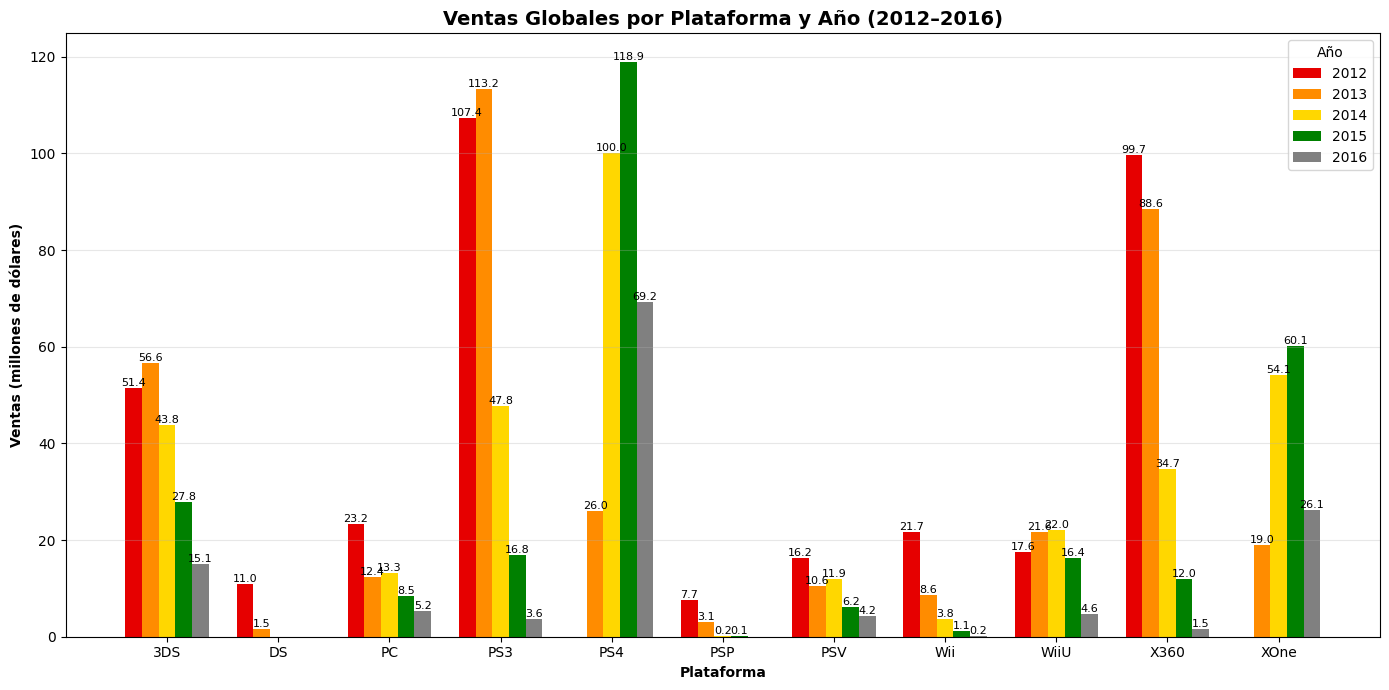

In [25]:
# Configuración del gráfico
plt.figure(figsize=(14, 7))

platforms = ventas_activas_formato.index.tolist()
years = ventas_activas_formato.columns.tolist()

x = np.arange(len(platforms))
bar_width = 0.15

# Colores
colors = ['#E60000', '#FF8C00', '#FFD700', 'green', 'grey']

# Graficar barras por año
for i, year in enumerate(years):
    plt.bar(
        x + i * bar_width,
        ventas_activas_formato[year],
        width=bar_width,
        label=str(year),
        color=colors[i]
    )

# Etiquetas y título 
plt.title('Ventas Globales por Plataforma y Año (2012–2016)', fontsize=14, fontweight='bold')
plt.xlabel('Plataforma', fontweight='bold')
plt.ylabel('Ventas (millones de dólares)', fontweight='bold')

# Ejes
plt.xticks(x + bar_width * (len(years) - 1) / 2, platforms)
plt.legend(title='Año')

# Líneas de cuadrícula suaves
plt.grid(axis='y', alpha=0.3)

# Etiquetas numéricas sobre las barras
for i, year in enumerate(years):
    for j, value in enumerate(ventas_activas_formato[year]):
        if value > 0:
            plt.text(
                x[j] + i * bar_width,
                value,
                f'{value:.1f}',
                ha='center',
                va='bottom',
                fontsize=8
            )

plt.tight_layout()
plt.show()

In [26]:
# Obtener las top 5 plataformas por ventas totales
top_5_platforms = period_2012_2016.sort_values(ascending=False).head(5)
print("=== TOP 5 PLATAFORMAS: VENTAS ===")
top_5_platforms

=== TOP 5 PLATAFORMAS: VENTAS ===


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
dtype: float64

In [27]:
# Crear dataset enfocado en las top 5 plataformas
top_5_platforms_list = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
years_analysis = [2012, 2013, 2014, 2015, 2016]

# Crear tabla enfocada en las top 5
top_5_data = pd.DataFrame()
for year in years_analysis:
    top_5_data[year] = platform_yearly.loc[year, top_5_platforms_list]
top_5_data.index = top_5_platforms_list

print("=== TOP 5 PLATAFORMAS: VENTAS POR AÑO ===")
top_5_data.round(1)

=== TOP 5 PLATAFORMAS: VENTAS POR AÑO ===


,2012,2013,2014,2015,2016
PS4,0.0,26.0,100.0,118.9,69.3
PS3,107.4,113.2,47.8,16.8,3.6
X360,99.7,88.6,34.7,12.0,1.5
3DS,51.4,56.6,43.8,27.8,15.1
XOne,0.0,19.0,54.1,60.1,26.2


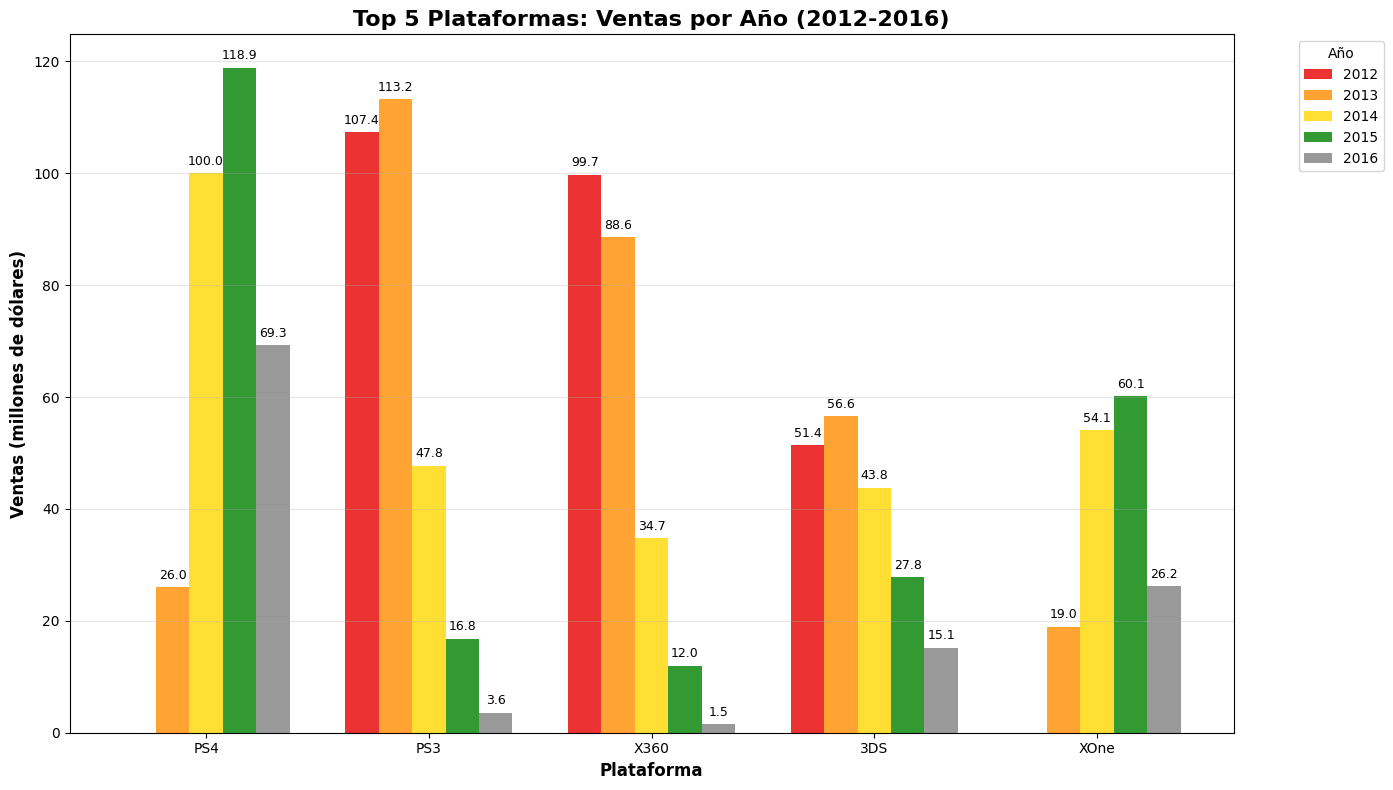

In [28]:
# Configuración del gráfico
plt.figure(figsize=(14, 8))
platforms = top_5_data.index.tolist()
years = top_5_data.columns.tolist()
x = np.arange(len(platforms))
bar_width = 0.15

# Tus colores definidos
colors = ['#E60000', '#FF8C00', '#FFD700', 'green', 'grey']

# Crear barras agrupadas SIN bordes
for i, year in enumerate(years):
    plt.bar(
        x + i * bar_width,
        top_5_data[year],
        width=bar_width,
        label=str(year),
        color=colors[i],
        alpha=0.8
    )

# Personalización
plt.title('Top 5 Plataformas: Ventas por Año (2012-2016)', fontsize=16, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12, fontweight='bold')
plt.ylabel('Ventas (millones de dólares)', fontsize=12, fontweight='bold')

# Configurar ejes
plt.xticks(x + bar_width * 2, platforms)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar valores sobre las barras SIN negrita
for i, year in enumerate(years):
    for j, value in enumerate(top_5_data[year]):
        if value > 0:
            plt.text(
                x[j] + i * bar_width,
                value + 1,
                f'{value:.1f}',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
# Cálculo de cambios porcentuales y en millones año a año
print("=== ANÁLISIS DE CAMBIOS AÑO A AÑO (2012-2016) ===")

# Plataformas principales para analizar
plataformas_principales = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC']
años = [2012, 2013, 2014, 2015, 2016]

# Para cada plataforma, calcular cambios año a año
for plataforma in plataformas_principales:
    print(f"\n=== {plataforma} ===")
    
    for i in range(len(años) - 1):
        año_actual = años[i]
        año_siguiente = años[i + 1]
        
        # Obtener ventas de cada año
        ventas_actual = platform_yearly.loc[año_actual, plataforma]
        ventas_siguiente = platform_yearly.loc[año_siguiente, plataforma]
        
        # Calcular diferencia en millones
        diferencia_millones = ventas_siguiente - ventas_actual
        
        # Calcular cambio porcentual (evitar división por cero)
        if ventas_actual > 0:
            cambio_porcentual = ((ventas_siguiente - ventas_actual) / ventas_actual) * 100
        else:
            cambio_porcentual = float('inf') if ventas_siguiente > 0 else 0
        
        # Determinar dirección del cambio
        if diferencia_millones > 0:
            direccion = "↗️ aumento"
        elif diferencia_millones < 0:
            direccion = "↘️ disminución"
        else:
            direccion = "→ sin cambio"
        
        # Mostrar resultados
        print(f"{año_actual}→{año_siguiente}: {diferencia_millones:+.1f}M ({cambio_porcentual:+.1f}%) {direccion}")
        print(f"   {ventas_actual:.1f}M → {ventas_siguiente:.1f}M")

=== ANÁLISIS DE CAMBIOS AÑO A AÑO (2012-2016) ===

=== PS4 ===
2012→2013: +26.0M (+inf%) ↗️ aumento
   0.0M → 26.0M
2013→2014: +74.0M (+284.8%) ↗️ aumento
   26.0M → 100.0M
2014→2015: +18.9M (+18.9%) ↗️ aumento
   100.0M → 118.9M
2015→2016: -49.7M (-41.8%) ↘️ disminución
   118.9M → 69.3M

=== XOne ===
2012→2013: +19.0M (+inf%) ↗️ aumento
   0.0M → 19.0M
2013→2014: +35.1M (+185.2%) ↗️ aumento
   19.0M → 54.1M
2014→2015: +6.1M (+11.2%) ↗️ aumento
   54.1M → 60.1M
2015→2016: -34.0M (-56.5%) ↘️ disminución
   60.1M → 26.2M

=== 3DS ===
2012→2013: +5.2M (+10.1%) ↗️ aumento
   51.4M → 56.6M
2013→2014: -12.8M (-22.6%) ↘️ disminución
   56.6M → 43.8M
2014→2015: -16.0M (-36.5%) ↘️ disminución
   43.8M → 27.8M
2015→2016: -12.6M (-45.5%) ↘️ disminución
   27.8M → 15.1M

=== PS3 ===
2012→2013: +5.9M (+5.5%) ↗️ aumento
   107.4M → 113.2M
2013→2014: -65.5M (-57.8%) ↘️ disminución
   113.2M → 47.8M
2014→2015: -30.9M (-64.8%) ↘️ disminución
   47.8M → 16.8M
2015→2016: -13.2M (-78.6%) ↘️ disminución
 

### Variación de Ventas por Plataforma (2012-2016)
- Transición generacional clara: El período 2012-2016 evidencia una transición completa entre generaciones de consolas. PS4 experimentó el crecimiento más dramático, pasando de 26.0M en 2014 a 118.9M en 2015, estableciéndose como la plataforma dominante del mercado.

- Declive acelerado de plataformas legacy: PS3 y X360 muestran patrones de declive similares, reduciendo sus ventas en más del 95% durante el período analizado. Wii presenta el declive más pronunciado, prácticamente desapareciendo del mercado tras su pico inicial.

- Consolidación del mercado: Para 2016, el ecosistema se consolidó en tres plataformas principales: PS4 (69.2M), XOne (26.1M) y PC (manteniendo estabilidad en ~8M). Las plataformas portátiles (3DS, PSV) mantienen nichos específicos pero con volúmenes significativamente menores.

- Implicaciones estratégicas para 2017: Los datos indican que PS4 será la plataforma prioritaria para maximizar ventas, seguida por XOne como segunda opción viable. Las plataformas de generación anterior (PS3, X360, Wii) representan mercados residuales sin potencial de crecimiento.

### Distribución Temporal de las Top 5 Plataformas
- Patrones de adopción diferenciados: PS4 muestra una curva de adopción explosiva, con su pico máximo en 2015 (118.9M) tras un lanzamiento tardío en 2014. En contraste, PS3 y X360 exhiben patrones de declive lineal consistente, perdiendo aproximadamente 25-30M anuales desde sus máximos en 2012.

- Timing crítico del ciclo de vida: La distribución revela que 2015 fue el año de inflexión definitivo: mientras PS4 alcanzó su máximo histórico, las plataformas legacy (PS3, X360) cayeron por debajo de los 50M por primera vez. XOne mantiene un crecimiento sostenido pero moderado, estableciendo su posición como segunda opción del mercado.

- Estabilidad vs. volatilidad: 3DS demuestra el patrón más estable con declive gradual (56.6M a 15.1M), mientras que las consolas de nueva generación muestran mayor volatilidad en sus primeros años de adopción.

- Concentración del mercado: Para 2016, el 73% de las ventas del top 5 se concentra en solo dos plataformas (PS4: 69.3M, XOne: 26.2M), evidenciando una consolidación acelerada del ecosistema gaming hacia las plataformas de octava generación.

### Ciclo de Vida de Plataformas - Aparición y Desaparición
- Velocidad de extinción: 2-4 años: Las plataformas legacy muestran patrones de desaparición acelerada. DS desapareció completamente en 2 años (11.0M en 2012 → 0.0M en 2014), mientras que PSP requirió 4 años para su extinción total (7.7M → 0.0M). Wii experimentó una caída del 99% en el mismo período (21.7M → 0.2M).
- Tiempo de establecimiento: 3-4 años: Las nuevas plataformas requieren 3-4 años para alcanzar dominancia. PS4 pasó de inexistente en 2012 a capturar el 53.3% del mercado en 2016, mientras que XOne estableció una participación del 20.1% en el mismo período tras su lanzamiento en 2013.
- Patrón de transición generacional: El análisis revela una transferencia de cuota de mercado directa: PS3 perdió 27.4 puntos porcentuales (30.2% → 2.8%) exactamente cuando PS4 ganó 53.3 puntos. X360 cedió 26.8 puntos porcentuales mientras XOne capturó 20.1%, evidenciando migración de usuarios dentro del mismo ecosistema.
- Resistencia de nichos especializados: PC mantiene estabilidad relativa (6.5% → 4.0%) y 3DS muestra declive gradual pero sostenido, sugiriendo que las plataformas con propuestas de valor diferenciadas resisten mejor las transiciones generacionales.
- Implicación estratégica: El mercado de videojuegos opera en ciclos de 4 años, donde las plataformas nuevas necesitan este tiempo para establecerse mientras las antiguas desaparecen en el mismo período. Para 2017, PS4 y XOne han completado su fase de establecimiento y representan el 73.4% del mercado combinado.

### 3.3 Definición del marco temporal para el modelo predictivo

Para establecer un modelo predictivo robusto, es fundamental delimitar claramente el período temporal que servirá como base para nuestro análisis. A continuación se presenta la justificación metodológica para la selección del marco temporal 2012-2015 como dataset definitivo, excluyendo períodos anteriores y posteriores que podrían introducir sesgos o inconsistencias en las predicciones.

#### Análisis de Períodos Históricos y Justificación de Exclusión
**Período Anterior al 2000 (1980-1999)**
- Contexto del mercado:
  - Volumen de lanzamientos: 205 juegos en 20 años (1.2% del dataset total)
  - Promedio: ~10 juegos por año vs. 444 juegos promedio del dataset completo
  - Ecosistema tecnológico: Era pre-internet, distribución física limitada, mercado geográficamente fragmentado
- Razones para exclusión:
  - Irrelevancia tecnológica: Plataformas completamente obsoletas (Atari, NES, SNES) sin conexión con el ecosistema actual
  - Contexto de mercado diferente: Industria en formación vs. industria madura actual
  - Volumen estadísticamente insignificante: Representa solo el 1.2% de los datos disponibles
    
**Período de Crecimiento Exponencial (2000-2011)**
- Contexto del mercado:
  - Volumen de lanzamientos: 11,964 juegos (66.7% del dataset)
  - Características: Expansión masiva de la industria, transición a distribución digital, establecimiento del gaming mainstream
- Razones para exclusión:
  - Volatilidad del crecimiento: Período de expansión no representa el mercado estabilizado actual
  - Múltiples transiciones generacionales: PS1→PS2→PS3, N64→GameCube→Wii, creando ruido en los patrones
  - Contexto pre-digital maduro: Muchas dinámicas de distribución y marketing han cambiado fundamentalmente
    
**Período Seleccionado: 2012-2016**
- Estabilidad del mercado: Industria madura con patrones predecibles
- Relevancia tecnológica: Ecosistema digital establecido, similar al contexto 2017
- Consistencia estadística: Volumen de lanzamientos estable (544-653 juegos anuales)
- Transición generacional completa: Captura la migración PS3/X360 → PS4/XOne de manera integral

#### Evidencia cuantitativa de datos incompletos en 2016:

1. Caídas anómalas en lanzamientos de juegos:
- Variación en número de lanzamientos:
  - 2015 → 2016: -17.2% de disminución (606 → 502 juegos)
  - Comparación histórica: 2012 → 2013: -16.7% (653 → 544 juegos)
  - Patrón normal (2013 -2015): Las variaciones típicas oscilan entre +4.3% y +6.8% 

2. Caídas anómalas en ventas por plataforma (2015 → 2016):
- Plataformas principales:
  - PS4: 118.9M → 69.3M = -49.7M (-41.8% de caída)
  - XOne: 60.1M → 26.2M = -34.0M (-56.5% de caída)
  - 3DS: 27.8M → 15.1M = -12.6M (-45.5% de caída)
- Plataformas en declive natural:
  - PS3: 16.8M → 3.6M = -13.2M (-78.6% de caída)
  - X360: 12.0M → 1.5M = -10.4M (-87.3% de caída)
  - WiiU: 16.4M → 4.6M = -11.8M (-71.9% de caída)

3. Comparación con patrones históricos normales:
- Plataformas en crecimiento (PS4 y XOne):
  - PS4 mostró crecimiento constante: 2013→2014 (+284.8%), 2014→2015 (+18.9%)
  - XOne mostró crecimiento constante: 2013→2014 (+185.2%), 2014→2015 (+11.2%)
  - Anomalía 2016: Ambas plataformas caen drásticamente después de años de crecimiento
- Análisis de eficiencia ventas/juego:
  - 2015: 606 juegos → 268.0M en ventas = 442k por juego
  - 2016: 502 juegos → 129.9M en ventas = 259k por juego
  - Reducción de eficiencia: -41.4% menos ventas por juego

4. Distribución de mercado en 2016:
- Concentración anómala:
  - PS4: 53.3% del mercado (vs 44.4% en 2015)
  - XOne: 20.1% del mercado (vs 22.4% en 2015)
  - Total de las dos principales: 73.4% del mercado

**Conclusión:**

Los datos de 2016 están claramente incompletos porque:
- Ruptura de tendencias de crecimiento: PS4 y XOne venían creciendo consistentemente y súbitamente caen 41.8% y 56.5% respectivamente
- Caídas simultáneas anómalas: Todas las plataformas principales muestran caídas del 40-87%
- Reducción de eficiencia: 41.4% menos ventas por juego sugiere datos parciales del año
- Patrón inconsistente: La caída de -17.2% en el lanzamiento 

### Conclusión marco temporal para el modelo predictivo

Basándose en el análisis de significancia de datos y los patrones de ciclo de vida de plataformas identificados anteriormente, se establece el período **2012-2015** como marco temporal definitivo para construir el modelo predictivo de 2017. **A partir de este punto, el análisis trabajará exclusivamente con los datos de este período, excluyendo toda información de años anteriores y posteriores.**

#### Justificación del período seleccionado:

**Contexto temporal del análisis:**

El dataset abarca desde 1980 hasta 2016, sin embargo, para construir un modelo predictivo efectivo para 2017, se requiere un marco temporal que refleje las dinámicas actuales del mercado. Los períodos anteriores al 2012 presentan limitaciones significativas:

- **1980-1999:** Volumen mínimo (205 juegos, 1.2% del dataset) y ecosistema tecnológico obsoleto
- **2000-2011:** Período de crecimiento exponencial con múltiples transiciones generacionales que introducen volatilidad no representativa del mercado estabilizado actual

Por tanto, el análisis se concentra en el período 2012-2016, que captura la industria en su estado maduro y tecnológicamente relevante.

**Exclusión de 2016:**
- Datos incompletos confirmados: caídas anómalas del 41.8% (PS4) y 56.5% (XOne)
- Reducción atípica de lanzamientos: -17.2% vs. patrones normales de ±6%

**Inclusión de 2012-2015:**
- Consistencia en volumen de lanzamientos (544-653 juegos anuales)
- Captura completa de la transición generacional PS3/X360 → PS4/XOne
- Datos completos y representativos del mercado actual

#### Implicaciones para el modelo 2017:
- **Plataformas objetivo:** PS4 (dominante), XOne (secundaria), PC (nicho estable)
- **Período de entrenamiento:** 4 años de datos consistentes y completos
- **Relevancia temporal:** Contexto inmediatamente anterior al año objetivo

### 3.4 Análisis de liderazgo y tendencias de plataformas (2012-2015)

A continuación, se identifica las plataformas dominantes del mercado de videojuegos durante el período 2012-2015 y analiza sus patrones de crecimiento y declive. El objetivo es determinar qué plataformas representan las mejores oportunidades de inversión para maximizar las ventas en 2017.

#### 3.4.1. Identificación de Plataformas Líderes por Ventas Totales

In [30]:
# Filtrar datos para el período 2012-2015
period_data = games_clean_years[games_clean_years['year_of_release'].between(2012, 2015)]

# Calcular ventas totales por plataforma
platform_sales = period_data.groupby('platform')['total_sales_clean'].sum().sort_values(ascending=False)

# Mostrar top 5 plataformas
print("=== TOP PLATAFORMAS POR VENTAS TOTALES (2012-2015) ===")
top_platforms = platform_sales.head(11)
for platform, sales in top_platforms.items():
    percentage = (sales / platform_sales.sum()) * 100
    print(f"{platform}: {sales:.1f}M ({percentage:.1f}%)")

=== TOP PLATAFORMAS POR VENTAS TOTALES (2012-2015) ===
PS3: 285.2M (21.7%)
PS4: 244.9M (18.6%)
X360: 235.0M (17.9%)
3DS: 179.5M (13.6%)
XOne: 133.2M (10.1%)
WiiU: 77.6M (5.9%)
PC: 57.4M (4.4%)
PSV: 44.9M (3.4%)
Wii: 35.2M (2.7%)
DS: 12.5M (1.0%)
PSP: 11.2M (0.8%)


#### 3.4.2.Análisis de tendencias de crecimiento y declive

In [31]:
# Incluir 2011 como año base para calcular crecimiento
period_data_extended = games_clean_years[games_clean_years['year_of_release'].between(2011, 2015)]

# Crear tabla de evolución incluyendo 2011
yearly_evolution_corrected = period_data_extended.groupby(['year_of_release', 'platform'])['total_sales_clean'].sum().unstack(fill_value=0)

# calcular crecimiento 
growth_analysis_corrected = pd.DataFrame()
for platform in top_platforms.index[:11]:
    platform_data = yearly_evolution_corrected[platform]
    growth_rates = platform_data.pct_change() * 100
    # Solo mostrar 2012-2015 (pero calculado con base en 2011)
    growth_analysis_corrected[platform] = growth_rates[growth_rates.index >= 2012]

print("=== TASAS DE CRECIMIENTO ANUAL (%) ===")
growth_analysis_corrected.round(1)

=== TASAS DE CRECIMIENTO ANUAL (%) ===


,PS3,PS4,X360,3DS,XOne,WiiU,PC,PSV,Wii,DS,PSP
year_of_release,,,,,,,,,,,
2012,-31.5,NaN,-30.7,-18.7,NaN,inf,-33.7,249.7,-63.6,-57.9,-56.8
2013,5.5,inf,-11.2,10.1,inf,23.3,-46.7,-34.6,-60.4,-86.0,-59.2
2014,-57.8,284.8,-60.8,-22.6,185.2,1.8,7.3,12.4,-56.3,-100.0,-92.4
2015,-64.8,18.9,-65.6,-36.5,11.2,-25.8,-35.8,-47.5,-69.6,NaN,-50.0


In [32]:
# Interpretación completa de valores especiales en la tabla
print("=== INTERPRETACIÓN DE VALORES ESPECIALES ===")
print()
print(" VALORES 'NaN' (Not a Number - Ausente):")
print("   • La plataforma no existía el año anterior")
print("   • La plataforma se discontinuó")
print("   • La plataforma no estaba activa ese año específico")
print()
print(" VALORES 'inf' (Infinito):")
print("   • Aparecen cuando una plataforma pasa de 0 ventas a tener ventas")
print("   • Indica el lanzamiento de nuevas plataformas")
print("   • PS4 y Xbox One en 2013: lanzamiento oficial de estas consolas")
print("   • WiiU en 2012: lanzamiento de esta consola de Nintendo")

=== INTERPRETACIÓN DE VALORES ESPECIALES ===

 VALORES 'NaN' (Not a Number - Ausente):
   • La plataforma no existía el año anterior
   • La plataforma se discontinuó
   • La plataforma no estaba activa ese año específico

 VALORES 'inf' (Infinito):
   • Aparecen cuando una plataforma pasa de 0 ventas a tener ventas
   • Indica el lanzamiento de nuevas plataformas
   • PS4 y Xbox One en 2013: lanzamiento oficial de estas consolas
   • WiiU en 2012: lanzamiento de esta consola de Nintendo


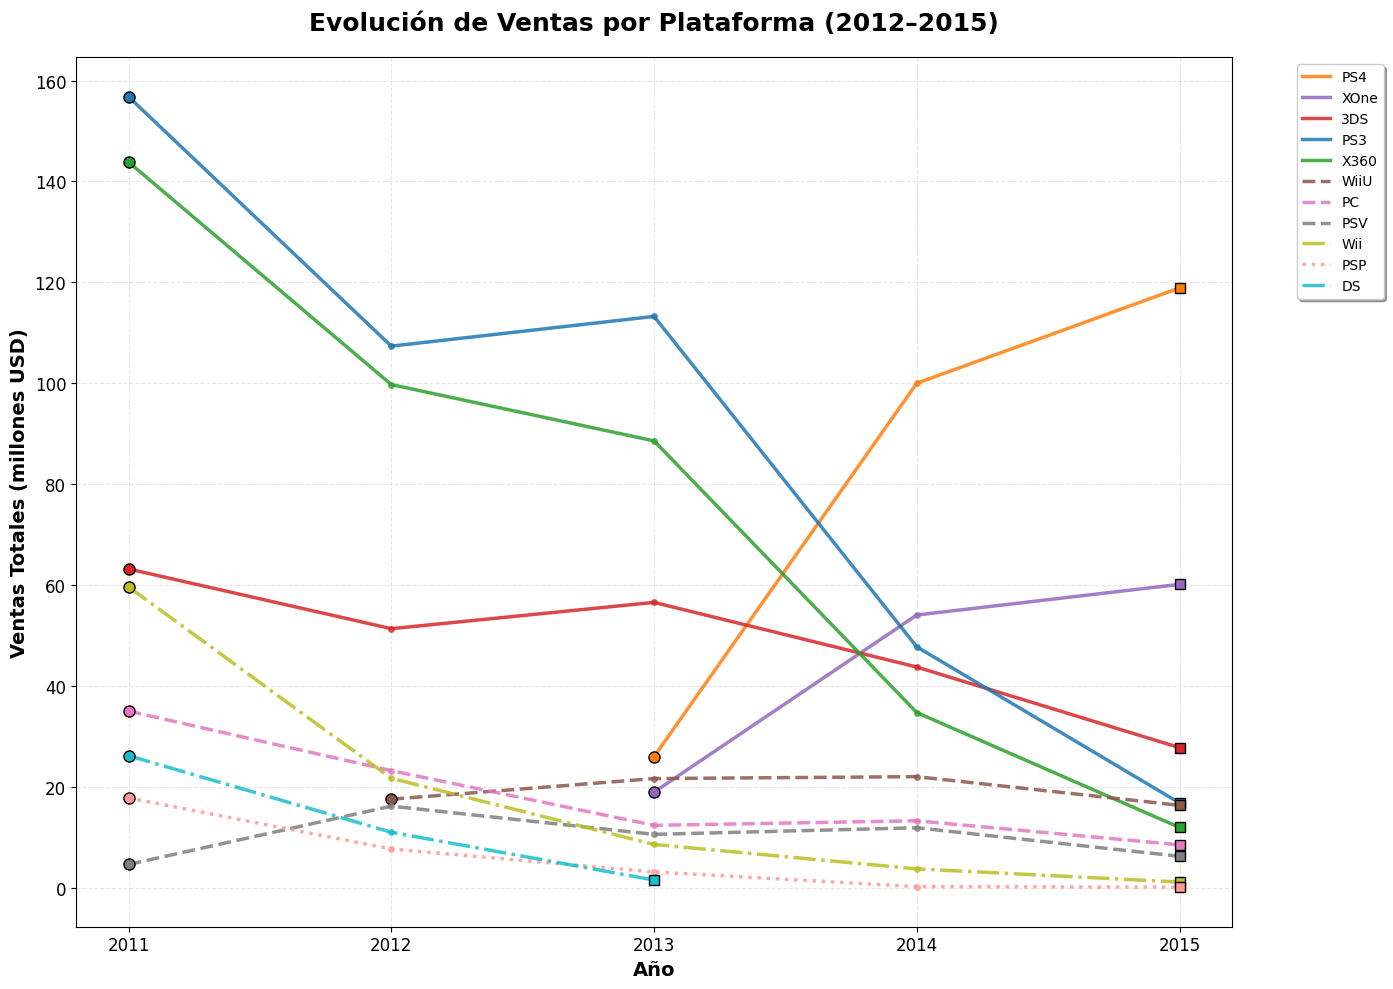

In [33]:
# Configuración del gráfico
# Configurar el estilo y tamaño
plt.figure(figsize=(14, 10))

# Definir colores y estilos (se mantienen)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896']

line_styles = ['-', '-', '-', '-', '-', '--', '--', '--', '-.', '-.', ':']

# ORDENAR PLATAFORMAS PARA LA LEYENDA

platforms = top_platforms.index[:11]

# Ventas en 2015
sales_2015 = yearly_evolution_corrected.loc[2015, platforms]

# Plataformas activas en 2015
active_2015 = sales_2015[sales_2015 > 0].sort_values(ascending=False).index.tolist()

# Plataformas que terminaron antes de 2015
ended_before_2015 = sales_2015[sales_2015 == 0].index.tolist()

# Identificar plataformas con líneas discontinuas
dashed_platforms = []
solid_platforms = []

for i, platform in enumerate(platforms):
    if line_styles[i] in ['--', '-.', ':']:
        dashed_platforms.append(platform)
    else:
        solid_platforms.append(platform)

# Orden final:
# 1. Activas en 2015 (líneas sólidas, ordenadas por ventas)
# 2. Activas en 2015 (líneas discontinuas)
# 3. Terminadas antes de 2015 (líneas discontinuas al final)
ordered_platforms = (
    [p for p in active_2015 if p in solid_platforms] +
    [p for p in active_2015 if p in dashed_platforms] +
    [p for p in ended_before_2015]
)

# GRAFICAR

for platform in ordered_platforms:
    i = list(platforms).index(platform)

    platform_data = yearly_evolution_corrected[platform]
    valid_data = platform_data[platform_data > 0]

    if len(valid_data) > 1:
        plt.plot(
            valid_data.index,
            valid_data.values,
            color=colors[i],
            linestyle=line_styles[i],
            linewidth=2.5,
            label=platform,
            alpha=0.85
        )
        # Puntos intermedios
        if len(valid_data) > 2:
            plt.plot(
                valid_data.index[1:-1],
                valid_data.values[1:-1],
                'o',
                color=colors[i],
                markersize=4,
                alpha=0.7
            )
        # Punto inicial
        plt.plot(
            valid_data.index[0],
            valid_data.values[0],
            'o',
            color=colors[i],
            markersize=8,
            markeredgecolor='black',
            markeredgewidth=1
        )
        # Punto final
        plt.plot(
            valid_data.index[-1],
            valid_data.values[-1],
            's',
            color=colors[i],
            markersize=7,
            markeredgecolor='black',
            markeredgewidth=1
        )

# ESTÉTICA FINAL

plt.title(
    'Evolución de Ventas por Plataforma (2012–2015)',
    fontsize=18,
    fontweight='bold',
    pad=20
)

plt.xlabel('Año', fontsize=14, fontweight='bold')
plt.ylabel('Ventas Totales (millones USD)', fontsize=14, fontweight='bold')

plt.xticks([2011, 2012, 2013, 2014, 2015], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=True
)

plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Conclusión del análisis de liderazgo y tendencias de plataformas (2012-2015)

**Plataformas líderes en ventas**

Basado en el análisis de evolución de ventas durante el período 2012-2015, se identifican tres categorías de líderes:

- Líderes Históricos (en declive):
  - PS3: Dominó el mercado en 2012 con 156M USD, pero experimentó una caída constante hasta 17M USD en 2015
  - X360: Líder inicial con 144M USD en 2012, sufriendo el declive más pronunciado hasta 12M USD en 2015

- Nuevos Líderes Emergentes:
  - PS4: Mostró el crecimiento más explosivo, de 25M USD en 2013 a 118M USD en 2015
  - XOne: Crecimiento sostenido desde su lanzamiento, alcanzando 60M USD en 2015

**Tendencias de crecimiento y declive**

- Plataformas en Crecimiento:
  - PS4: +372% de crecimiento (2013-2015)
  - XOne: Tendencia ascendente constante desde su introducción

- Plataformas en Declive:
  - PS3: -89% de reducción (2012-2015)
  - X360: -92% de reducción (2012-2015)
  - 3DS: Declive gradual de 63M a 28M USD (-55%)

*Patrón Identificado: El declive de las consolas de generación anterior (PS3, X360) coincide directamente con el ascenso de sus sucesoras (PS4, XOne), evidenciando una **transición generacional clara en 2014**.*

**Plataformas potencialmente rentables para inversión**

Recomendaciones de Inversión (ordenadas por potencial):
1. PS4 - ALTA RENTABILIDAD
- Crecimiento exponencial sostenido
- Líder emergente del mercado
2. XOne - RENTABILIDAD MEDIA-ALTA
- Crecimiento constante y estable
- Competidor directo de PS4
3. 3DS - RENTABILIDAD LIMITADA
- Aunque en declive, mantiene base sólida (~28M USD)
- Nicho específico de mercado portátil
- Plataformas NO recomendadas: PS3, X360 (declive terminal), y plataformas menores con ventas <20M USD.

### 2.5 Análisis de distribución de ventas por plataforma

Esta sección examina la variabilidad y distribución de las ventas globales entre las principales plataformas de videojuegos durante el período 2012-2015. A través de diagramas de caja, analizaremos las diferencias estadísticamente significativas en el rendimiento de ventas entre plataformas y evaluaremos la consistencia de los ingresos promedio.

#### 2.5.1. Diagrama de caja para las ventas globales de todos los juegos (desglosados por plataforma)

In [34]:
# Crear diagrama de caja para ventas globales por plataforma
# Filtrar datos del período 2012-2015 para mantener consistencia con el análisis anterior
period_data = games_clean_years[games_clean_years['year_of_release'].between(2012, 2015)]

# Obtener las plataformas principales (con más de 20M en ventas totales)
platform_sales_total = period_data.groupby('platform')['total_sales_clean'].sum()
main_platforms = platform_sales_total[platform_sales_total > 0].index.tolist()

# ORDENAR PLATAFORMAS DE MAYOR A MENOR VENTAS TOTALES
platform_sales_sorted = platform_sales_total[platform_sales_total > 0].sort_values(ascending=False)
main_platforms_ordered = platform_sales_sorted.index.tolist()

print("=== PLATAFORMAS PRINCIPALES PARA ANÁLISIS (ORDENADAS POR VENTAS) ===")
for platform in main_platforms_ordered:
    total_sales = platform_sales_total[platform]
    game_count = len(period_data[period_data['platform'] == platform])
    print(f"{platform}: {total_sales:.1f}M total, {game_count} juegos")

=== PLATAFORMAS PRINCIPALES PARA ANÁLISIS (ORDENADAS POR VENTAS) ===
PS3: 285.2M total, 455 juegos
PS4: 244.9M total, 228 juegos
X360: 235.0M total, 279 juegos
3DS: 179.5M total, 350 juegos
XOne: 133.2M total, 160 juegos
WiiU: 77.6M total, 133 juegos
PC: 57.4M total, 196 juegos
PSV: 44.9M total, 326 juegos
Wii: 35.2M total, 53 juegos
DS: 12.5M total, 31 juegos
PSP: 11.2M total, 173 juegos


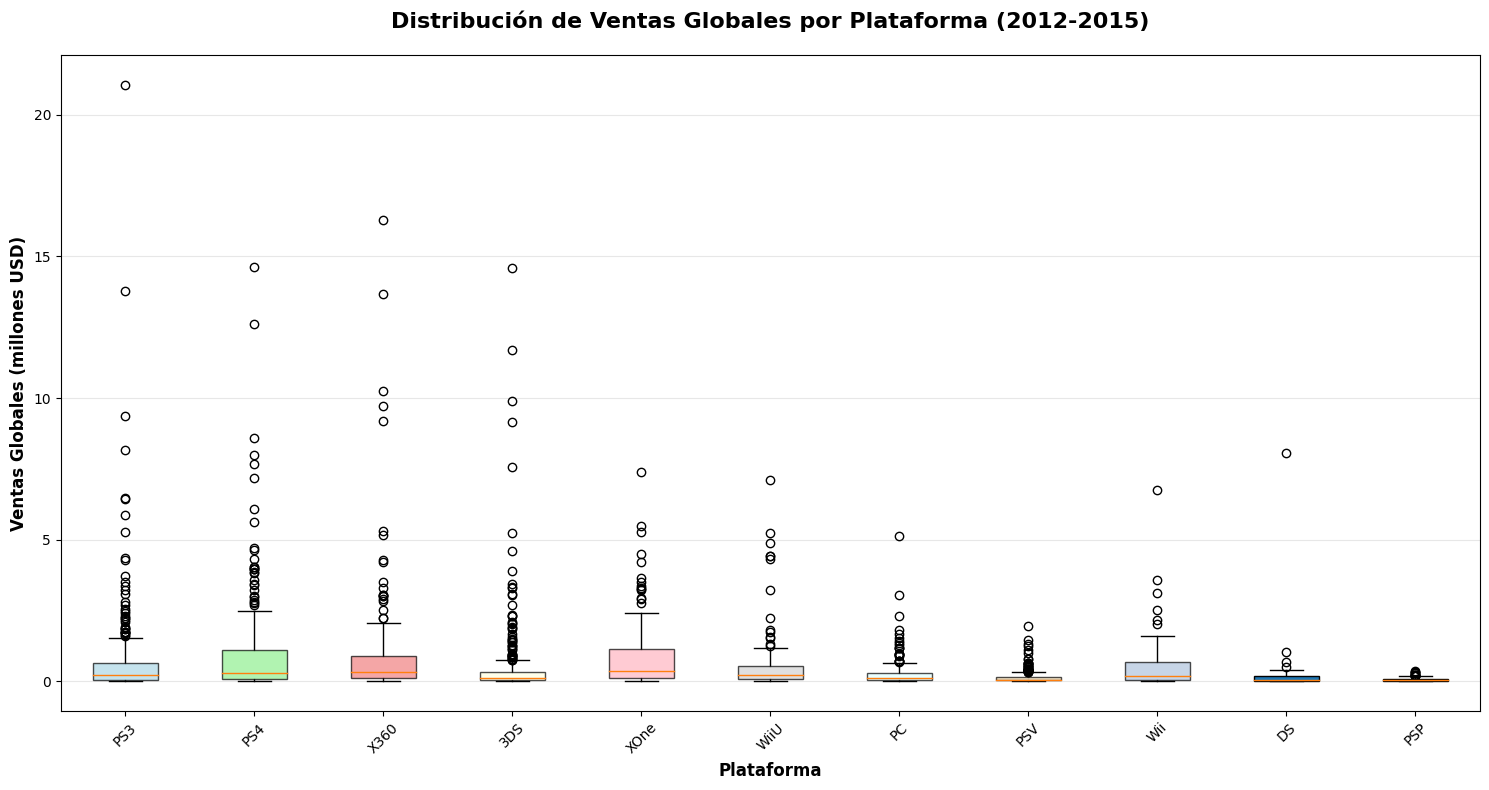

In [35]:
# Filtrar datos solo para plataformas principales
boxplot_data = period_data[period_data['platform'].isin(main_platforms_ordered)]

# Crear el diagrama de caja CON ORDEN DE MAYOR A MENOR
plt.figure(figsize=(15, 8))

# Crear boxplot usando el orden correcto
box_plot = plt.boxplot([boxplot_data[boxplot_data['platform'] == platform]['total_sales_clean'] 
                       for platform in main_platforms_ordered], 
                      labels=main_platforms_ordered, 
                      patch_artist=True,
                      showfliers=True)

# Personalizar colores
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 
          'lightpink', 'lightgray', 'lightcyan', 'wheat', 'lightsteelblue']

for patch, color in zip(box_plot['boxes'], colors[:len(main_platforms_ordered)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Títulos y etiquetas
plt.title('Distribución de Ventas Globales por Plataforma (2012-2015)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Plataforma', fontsize=12, fontweight='bold')
plt.ylabel('Ventas Globales (millones USD)', fontsize=12, fontweight='bold')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Agregar grid
plt.grid(axis='y', alpha=0.3)

# Ajustar layout
plt.tight_layout()
plt.show()

In [36]:
# Crear tabla estadística completa para las plataformas principales

# Usar los datos del período 2012-2015 que ya tienes definidos
period_data = games_clean_years[games_clean_years['year_of_release'].between(2012, 2015)]

# Obtener las plataformas principales en el orden que aparecen en tu gráfico
main_platforms_ordered = ['PS3', 'PS4', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

# Crear diccionario para almacenar todas las estadísticas
estadisticas_completas = {}

for platform in main_platforms_ordered:
    platform_data = period_data[period_data['platform'] == platform]['total_sales_clean']
    
    if len(platform_data) > 0:
        estadisticas_completas[platform] = {
            'N_Juegos': len(platform_data),
            'Media': platform_data.mean(),
            'Mediana': platform_data.median(),
            'Desv_Estándar': platform_data.std(),
            'Q1': platform_data.quantile(0.25),
            'Q3': platform_data.quantile(0.75),
            'Mínimo': platform_data.min(),
            'Máximo': platform_data.max(),
            'RIC': platform_data.quantile(0.75) - platform_data.quantile(0.25),
            'Coef_Variación': (platform_data.std() / platform_data.mean()) * 100 if platform_data.mean() > 0 else 0
        }

# Convertir a DataFrame
tabla_estadisticas = pd.DataFrame(estadisticas_completas)

# TRANSPONER para que estadísticas sean filas y plataformas columnas
tabla_transpuesta = tabla_estadisticas.T

# Definir el orden específico de las filas (estadísticas)
orden_filas = ['N_Juegos', 'Media', 'Mediana', 'Desv_Estándar', 
               'Q1', 'Q3', 'Mínimo', 'Máximo', 'RIC', 'Coef_Variación']

# Reordenar las filas según tu preferencia
tabla_final = tabla_transpuesta[orden_filas].T

# Redondear valores para mejor legibilidad
tabla_final = tabla_final.round(2)

print("=== ESTADÍSTICAS DE VENTAS POR PLATAFORMA (2012-2015) ===")
print("Filas: Estadísticas | Columnas: Plataformas")
print("Ventas en millones USD")
print()
tabla_final

=== ESTADÍSTICAS DE VENTAS POR PLATAFORMA (2012-2015) ===
Filas: Estadísticas | Columnas: Plataformas
Ventas en millones USD



,PS3,PS4,X360,3DS,XOne,WiiU,PC,PSV,Wii,DS,PSP
N_Juegos,455.00,228.00,279.00,350.00,160.00,133.00,196.00,326.00,53.00,31.00,173.00
Media,0.63,1.07,0.84,0.51,0.83,0.58,0.29,0.14,0.66,0.40,0.06
Mediana,0.23,0.31,0.34,0.12,0.35,0.22,0.10,0.06,0.18,0.05,0.03
Desv_Estándar,1.52,1.90,1.74,1.42,1.18,1.11,0.55,0.22,1.17,1.44,0.07
Q1,0.05,0.10,0.10,0.05,0.13,0.08,0.03,0.03,0.06,0.02,0.02
Q3,0.66,1.10,0.89,0.33,1.14,0.53,0.29,0.15,0.69,0.18,0.09
Mínimo,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Máximo,21.05,14.63,16.27,14.60,7.39,7.09,5.14,1.96,6.76,8.06,0.36
RIC,0.61,1.01,0.79,0.28,1.01,0.45,0.26,0.12,0.63,0.16,0.07
Coef_Variación,241.75,176.88,207.13,277.82,142.04,189.48,186.74,161.55,176.93,355.51,110.23


### Conclusiones de análisis de distribución de ventas por plataforma

1. **¿Son significativas las diferencias en las ventas?**
   
Sí, las diferencias en las ventas entre plataformas son altamente significativas. El diagrama de caja y la tabla estadística revelan patrones distintivos que evidencian comportamientos de mercado claramente diferenciados:

- Diferencias en medianas:
  - Plataformas de alto rendimiento: PS4 (0.31M), X360 (0.34M) y XOne (0.35M) muestran las medianas más altas, con XOne liderando ligeramente
  - Plataformas de rendimiento medio: PS3 (0.23M), WiiU (0.22M) y Wii (0.18M) mantienen medianas intermedias
  - Plataformas de bajo rendimiento: 3DS (0.12M), PC (0.10M), PSV (0.06M), DS (0.05M) y PSP (0.03M) presentan medianas significativamente menores
    
- Diferencias en rangos intercuartílicos:
  - PS4 (RIC: 1.01M) y XOne (RIC: 1.01M) exhiben los rangos más amplios, indicando mayor variabilidad en el éxito de sus títulos
  - X360 (RIC: 0.79M) y PS3 (RIC: 0.61M) mantienen variabilidad considerable pero menor que las nuevas generaciones
  - Las plataformas portátiles muestran rangos más compactos: 3DS (0.28M), PSV (0.12M), sugiriendo rendimiento más predecible
    
2. **¿Qué sucede con las ventas promedio en varias plataformas?**

Las ventas promedio varían dramáticamente entre plataformas, reflejando diferentes ecosistemas de mercado:

- Plataformas con ventas promedio superiores:
  - PS4: Presenta la media más alta (1.07M) y el mayor potencial de blockbusters (máximo: 14.63M), confirmando su dominio del mercado
  - X360: Media sólida (0.84M) con el mayor potencial histórico (máximo: 16.27M), reflejando su legado como plataforma establecida
  - XOne: Media robusta (0.83M) con crecimiento sostenido y menor volatilidad (Coef. Variación: 142.04%)

- Plataformas con ventas promedio moderadas:
  - Wii: Media de 0.66M pero con alta variabilidad (Coef. Variación: 176.93%), indicando éxitos esporádicos
  - PS3: Media de 0.63M con el mayor potencial individual (máximo: 21.05M) pero alta volatilidad
  - WiiU: Media estable (0.58M) con variabilidad moderada (Coef. Variación: 189.48%)
    
- Plataformas con ventas promedio bajas:
  - 3DS: Media de 0.51M pero con la mayor volatilidad (Coef. Variación: 277.82%), indicando mercado impredecible
  - PC: Media baja (0.29M) con distribución concentrada en valores bajos (máximo: 5.14M)
  - PSV, DS, PSP: Medias muy bajas (0.14M, 0.40M, 0.06M respectivamente) con potencial limitado

3. **HALLAZGOS**
   
3.1. Transición Generacional Definitiva (2014-2015)
- PS4 experimentó un crecimiento explosivo: De 26M en 2013 a 118.9M en 2015 (+372%)
- Declive terminal de plataformas legacy: PS3 y X360 perdieron más del 90% de sus ventas
- 2014 fue el año de inflexión: Momento donde PS4 superó definitivamente a las consolas anteriores

3.2. Concentración del Mercado
- Dominio de dos plataformas: Para 2015, PS4 y XOne representaban el 66.8% del mercado
- Eliminación de competidores: Las plataformas menores (Wii, DS, PSP) prácticamente desaparecieron
- Consolidación acelerada: De 11 plataformas activas a 4 principales en solo 4 años

3.3. Patrones de Distribución de Ventas
- PS4 tiene la mayor variabilidad: RIC de 1.01M indica mayor potencial de blockbusters
- XOne muestra menor volatilidad: Coeficiente de variación de 142% vs 177% de PS4
- Plataformas portátiles son más predecibles: 3DS tiene rangos más compactos pero menor potencial

3.4. Eficiencia por Juego
- PS4 es la más eficiente: Media de 1.07M por juego vs 0.84M de X360
- Calidad vs Cantidad: PS4 con 228 juegos generó 244.9M vs PS3 con 455 juegos que generó 285.2M

3.5. Ciclo de Vida de Plataformas
- Tiempo de establecimiento: 3-4 años para dominar el mercado
- Velocidad de extinción: 2-4 años para desaparecer completamente
- Patrón de migración: Los usuarios migran dentro del mismo ecosistema (PS3→PS4, X360→XOne)

### 2.6 Análisis del Impacto de Reseñas en las Ventas: Estudio de Correlación en PlayStation 4

En esta sección se analiza la relación entre las reseñas de usuarios y críticos profesionales con el rendimiento comercial de los videojuegos, utilizando PlayStation 4 como plataforma de estudio. La selección de PS4 se fundamenta en tres criterios estratégicos: dominancia del mercado (314.14M en ventas totales durante 2012-2016, representando el 18.6% del mercado), relevancia temporal (plataforma líder en 2015-2016 con tendencia ascendente hacia 2017), y disponibilidad de datos (228 juegos con información completa de reseñas y ventas).

A través de análisis de correlación y gráficos de dispersión, se evaluará si las puntuaciones de críticos especializados y usuarios tienen un impacto estadísticamente significativo en las ventas globales, proporcionando insights clave para la optimización de estrategias de marketing y selección de proyectos prometedores para 2017.

In [37]:
# Filtrar datos de PS4 del período 2012-2015
ps4_data = period_data[period_data['platform'] == 'PS4'].copy()

print("=== DATOS DE PS4 PARA ANÁLISIS DE RESEÑAS ===")
print(f"Total de juegos PS4 (2012-2015): {len(ps4_data)}")
print(f"Juegos con critic_score válido: {ps4_data['critic_score'].notna().sum()}")
print(f"Juegos con user_score válido: {ps4_data['user_score'].notna().sum()}")
print(f"Juegos con ambas reseñas válidas: {(ps4_data['critic_score'].notna() & ps4_data['user_score'].notna()).sum()}")

# Crear dataset limpio con ambas reseñas
ps4_clean = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales_clean']).copy()
print(f"\nDataset final para análisis: {len(ps4_clean)} juegos")

=== DATOS DE PS4 PARA ANÁLISIS DE RESEÑAS ===
Total de juegos PS4 (2012-2015): 228
Juegos con critic_score válido: 154
Juegos con user_score válido: 157
Juegos con ambas reseñas válidas: 153

Dataset final para análisis: 153 juegos


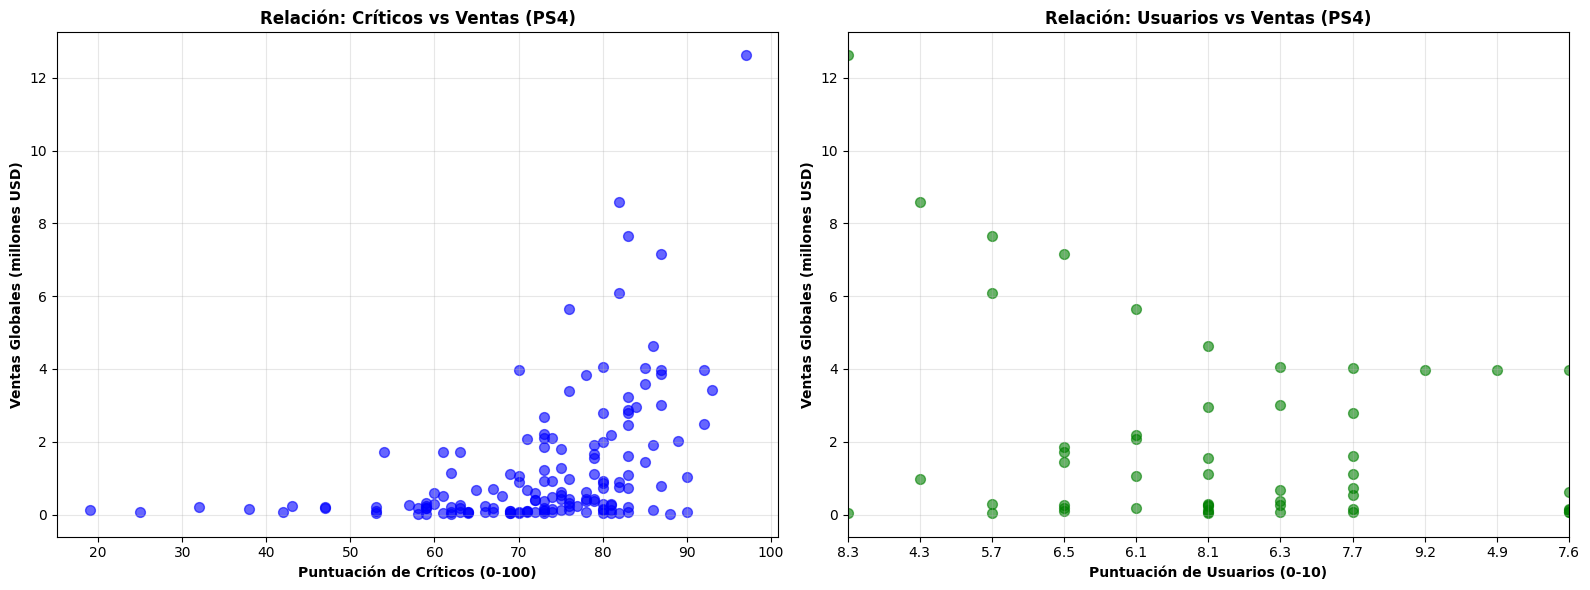

In [38]:
# Crear figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Critic Score vs Ventas
ax1.scatter(ps4_clean['critic_score'], ps4_clean['total_sales_clean'], 
           alpha=0.6, color='blue', s=50)
ax1.set_xlabel('Puntuación de Críticos (0-100)', fontweight='bold')
ax1.set_ylabel('Ventas Globales (millones USD)', fontweight='bold')
ax1.set_title('Relación: Críticos vs Ventas (PS4)', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Gráfico 2: User Score vs Ventas 
ax2.scatter(ps4_clean['user_score'], ps4_clean['total_sales_clean'], 
           alpha=0.6, color='green', s=50)
ax2.set_xlabel('Puntuación de Usuarios (0-10)', fontweight='bold')
ax2.set_ylabel('Ventas Globales (millones USD)', fontweight='bold')
ax2.set_title('Relación: Usuarios vs Ventas (PS4)', fontweight='bold')
ax2.grid(True, alpha=0.3)

# SOLUCIÓN: Configurar el eje X para mostrar el rango completo 0-10
ax2.set_xlim(0, 10)
ax2.set_xticks(range(0, 11, 1))  # Marcas cada 1 punto (0, 1, 2, ..., 10)

plt.tight_layout()
plt.show()

In [39]:
# Verificar los tipos de datos en ps4_clean
print("=== VERIFICACIÓN DE TIPOS DE DATOS ===")
print(f"Tipo de critic_score: {ps4_clean['critic_score'].dtype}")
print(f"Tipo de user_score: {ps4_clean['user_score'].dtype}")
print(f"Tipo de total_sales_clean: {ps4_clean['total_sales_clean'].dtype}")

# Verificar si hay valores no numéricos
print(f"\nValores no numéricos en user_score:")
print(ps4_clean['user_score'].apply(lambda x: not isinstance(x, (int, float))).sum())

# SOLUCIÓN: Verificar qué valores problemáticos hay
print("\nValores únicos problemáticos en user_score:")
problematic_values = ps4_clean['user_score'][ps4_clean['user_score'].apply(lambda x: not isinstance(x, (int, float)))]
print(problematic_values.value_counts().head(10))

# Limpiar los datos asegurándose de que sean numéricos
ps4_clean = ps4_clean.copy()
ps4_clean['user_score'] = pd.to_numeric(ps4_clean['user_score'], errors='coerce')
ps4_clean['critic_score'] = pd.to_numeric(ps4_clean['critic_score'], errors='coerce')

# Verificar la conversión
print(f"\nDespués de la conversión:")
print(f"Tipo de user_score: {ps4_clean['user_score'].dtype}")

# Eliminar cualquier fila con valores NaN después de la conversión
ps4_clean = ps4_clean.dropna(subset=['critic_score', 'user_score', 'total_sales_clean'])

print(f"\nDataset final limpio: {len(ps4_clean)} juegos")

=== VERIFICACIÓN DE TIPOS DE DATOS ===
Tipo de critic_score: float64
Tipo de user_score: object
Tipo de total_sales_clean: float64

Valores no numéricos en user_score:
153

Valores únicos problemáticos en user_score:
8.1    10
7.1     9
7.7     8
6.5     7
6.6     6
7.6     6
6.8     6
6.3     6
7.8     5
7.9     5
Name: user_score, dtype: int64

Después de la conversión:
Tipo de user_score: float64

Dataset final limpio: 153 juegos


In [40]:
# Correlación entre critic_score y ventas
corr_critic, p_value_critic = pearsonr(ps4_clean['critic_score'], ps4_clean['total_sales_clean'])

# Correlación entre user_score y ventas
corr_user, p_value_user = pearsonr(ps4_clean['user_score'], ps4_clean['total_sales_clean'])

# Mostrar resultados
print("=== ANÁLISIS DE CORRELACIÓN PS4 (2012-2015) ===")
print(f"Correlación Críticos vs Ventas: {corr_critic:.3f} (p-value: {p_value_critic:.3f})")
print(f"Correlación Usuarios vs Ventas: {corr_user:.3f} (p-value: {p_value_user:.3f})")

# Interpretación de los resultados
print("\n=== INTERPRETACIÓN ===")
if abs(corr_critic) > 0.3:
    strength_critic = 'Fuerte' if abs(corr_critic) > 0.7 else 'Moderada'
    direction_critic = 'positiva' if corr_critic > 0 else 'negativa'
    print(f"Correlación críticos: {strength_critic} {direction_critic}")
else:
    print("Correlación críticos: Débil")
    
if abs(corr_user) > 0.3:
    strength_user = 'Fuerte' if abs(corr_user) > 0.7 else 'Moderada'
    direction_user = 'positiva' if corr_user > 0 else 'negativa'
    print(f"Correlación usuarios: {strength_user} {direction_user}")
else:
    print("Correlación usuarios: Débil")

=== ANÁLISIS DE CORRELACIÓN PS4 (2012-2015) ===
Correlación Críticos vs Ventas: 0.431 (p-value: 0.000)
Correlación Usuarios vs Ventas: 0.018 (p-value: 0.824)

=== INTERPRETACIÓN ===
Correlación críticos: Moderada positiva
Correlación usuarios: Débil


### Conclusiones de análisis del Impacto de Reseñas en las Ventas: Estudio de Correlación en PlayStation 4

**HALLAZGOS PRINCIPALES**

El análisis de correlación entre reseñas y ventas en PlayStation 4 revela diferencias significativas en el poder predictivo de cada tipo de evaluación:
- Reseñas de críticos: Correlación moderada positiva (r = 0.431, p < 0.001) - estadísticamente significativa
- Reseñas de usuarios: Correlación prácticamente nula (r = 0.018, p = 0.824) - sin significancia estadística

**INTERPRETACIÓN ESTRATÉGICA**

Para la tienda Ice, las reseñas de críticos profesionales constituyen un indicador confiable del potencial comercial, mientras que las puntuaciones de usuarios no ofrecen valor predictivo para las ventas.

Los juegos con puntuaciones de críticos superiores a 80 puntos concentran los mayores volúmenes de ventas, sugiriendo que la calidad reconocida por expertos se traduce en éxito comercial.

**RECOMENDACIONES OPERATIVAS**

Planificación de inventario 2017:
- Priorizar títulos con altas calificaciones de críticos (>75 puntos)
- Utilizar reseñas profesionales como criterio principal para decisiones de stock

Estrategia de marketing:
- Incorporar citas de críticos reconocidos en material promocional
- Asignar presupuestos publicitarios basándose en puntuaciones profesionales
- Enfocar campañas pre-lanzamiento en títulos bien valorados por la crítica

**CONCLUSIÓN EJECUTIVA**

Las reseñas de críticos son un predictor efectivo del éxito comercial en PS4, mientras que las reseñas de usuarios no muestran relación significativa con las ventas. Esta evidencia respalda el uso de evaluaciones profesionales como herramienta clave para la toma de decisiones estratégicas y la optimización de recursos comerciales.

### 2.7 Análisis Comparativo: Ventas de Juegos Multiplataforma

Tras confirmar que las reseñas de críticos tienen un impacto significativo en las ventas de PlayStation 4, surge una pregunta estratégica crucial para la tienda Ice: ¿Este patrón se mantiene consistente en otras plataformas?

Para lo cual vamos a:
1. Identificar juegos multiplataforma del período 2012-2015
2. Comparar ventas del mismo título entre PS4, Xbox One, PS3, etc.
3. Analizar si la correlación reseñas-ventas se mantiene en cada plataforma

#### 2.7.1. Identificar juegos multiplataforma del período 2012-2015

In [41]:
# Obtener los nombres de los 153 juegos analizados en PS4
print("=== IDENTIFICACIÓN DE JUEGOS MULTIPLATAFORMA ===")
print(f"Juegos analizados en PS4: {len(ps4_clean)}")

# Obtener lista de nombres de juegos de PS4 analizados
juegos_ps4_analizados = ps4_clean['name'].unique()
print(f"Títulos únicos en PS4: {len(juegos_ps4_analizados)}")

# Buscar estos mismos juegos en otras plataformas (período 2012-2015)
juegos_multiplataforma = period_data[period_data['name'].isin(juegos_ps4_analizados)]

print(f"\nTotal de registros encontrados: {len(juegos_multiplataforma)}")
print(f"Plataformas donde aparecen: {juegos_multiplataforma['platform'].nunique()}")
print(f"Juegos únicos encontrados: {juegos_multiplataforma['name'].nunique()}")

=== IDENTIFICACIÓN DE JUEGOS MULTIPLATAFORMA ===
Juegos analizados en PS4: 153
Títulos únicos en PS4: 153

Total de registros encontrados: 530
Plataformas donde aparecen: 11
Juegos únicos encontrados: 153


In [42]:
# Analizar en qué plataformas aparecen estos juegos
print("\n=== DISTRIBUCIÓN POR PLATAFORMA ===")
distribucion_plataformas = juegos_multiplataforma['platform'].value_counts()
print("Cantidad de juegos por plataforma:")
for plataforma, cantidad in distribucion_plataformas.items():
    porcentaje = (cantidad / len(juegos_multiplataforma)) * 100
    print(f"{plataforma}: {cantidad} juegos ({porcentaje:.1f}%)")


=== DISTRIBUCIÓN POR PLATAFORMA ===
Cantidad de juegos por plataforma:
PS4: 153 juegos (28.9%)
XOne: 96 juegos (18.1%)
PS3: 85 juegos (16.0%)
X360: 62 juegos (11.7%)
PC: 53 juegos (10.0%)
PSV: 36 juegos (6.8%)
WiiU: 20 juegos (3.8%)
3DS: 13 juegos (2.5%)
Wii: 9 juegos (1.7%)
PSP: 2 juegos (0.4%)
DS: 1 juegos (0.2%)


In [43]:
# Identificar juegos que aparecen en múltiples plataformas
juegos_por_titulo = juegos_multiplataforma.groupby('name')['platform'].nunique().sort_values(ascending=False)

print("\n=== JUEGOS MULTIPLATAFORMA (2+ plataformas) ===")
juegos_multi = juegos_por_titulo[juegos_por_titulo >= 2]
print(f"Juegos en múltiples plataformas: {len(juegos_multi)}")

# Mostrar los top 10 juegos con más plataformas
print("\nTop 10 juegos con más plataformas:")
for juego, num_plataformas in juegos_multi.head(10).items():
    plataformas = juegos_multiplataforma[juegos_multiplataforma['name'] == juego]['platform'].tolist()
    print(f"{juego}: {num_plataformas} plataformas {plataformas}")


=== JUEGOS MULTIPLATAFORMA (2+ plataformas) ===
Juegos en múltiples plataformas: 131

Top 10 juegos con más plataformas:
FIFA 14: 9 plataformas ['PS3', 'X360', 'PS4', 'XOne', 'PSV', 'PC', 'Wii', '3DS', 'PSP']
LEGO Marvel Super Heroes: 9 plataformas ['X360', 'PS3', 'PS4', 'XOne', '3DS', 'WiiU', 'PSV', 'DS', 'PC']
Lego Batman 3: Beyond Gotham: 8 plataformas ['PS4', 'X360', 'PS3', '3DS', 'WiiU', 'XOne', 'PSV', 'PC']
FIFA 15: 8 plataformas ['PS4', 'PS3', 'X360', 'XOne', 'PSV', 'Wii', '3DS', 'PC']
Angry Birds Star Wars: 8 plataformas ['3DS', 'PS3', 'X360', 'Wii', 'PS4', 'XOne', 'WiiU', 'PSV']
The LEGO Movie Videogame: 8 plataformas ['X360', 'PS3', '3DS', 'PS4', 'WiiU', 'XOne', 'PSV', 'PC']
LEGO Jurassic World: 8 plataformas ['PS4', 'X360', 'PS3', 'XOne', '3DS', 'WiiU', 'PSV', 'PC']
LEGO The Hobbit: 8 plataformas ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'WiiU', 'PSV', 'PC']
Skylanders SWAP Force: 7 plataformas ['Wii', 'X360', 'PS3', 'WiiU', 'PS4', 'XOne', '3DS']
Skylanders: SuperChargers: 7 pl

#### 2.7.2. Comparar ventas del mismo título entre PS4, Xbox One, PC, etc.

In [44]:
# Análisis completo en las 11 plataformas
todas_las_plataformas = ['PS4', 'XOne', 'PS3', 'X360', 'PC', 'PSV', 'WiiU', '3DS', 'Wii', 'PSP', 'DS']

# Crear tabla comparativa completa
tabla_comparativa_completa = juegos_multiplataforma.pivot_table(
    index='name', 
    columns='platform', 
    values='total_sales_clean', 
    fill_value=0
).round(2)

print("=== TABLA COMPARATIVA COMPLETA: TODAS LAS PLATAFORMAS ===")
print(f"Juegos analizados: {len(tabla_comparativa_completa)}")
print(f"Plataformas incluidas: {len(tabla_comparativa_completa.columns)}")

# Mostrar estadísticas por plataforma
print("\n=== ESTADÍSTICAS POR PLATAFORMA ===")
for plataforma in todas_las_plataformas:
    if plataforma in tabla_comparativa_completa.columns:
        juegos_activos = (tabla_comparativa_completa[plataforma] > 0).sum()
        ventas_totales = tabla_comparativa_completa[plataforma].sum()
        promedio_por_juego = ventas_totales / juegos_activos if juegos_activos > 0 else 0
        print(f"{plataforma}: {juegos_activos} juegos, {ventas_totales:.1f}M total, {promedio_por_juego:.2f}M promedio")

=== TABLA COMPARATIVA COMPLETA: TODAS LAS PLATAFORMAS ===
Juegos analizados: 153
Plataformas incluidas: 11

=== ESTADÍSTICAS POR PLATAFORMA ===
PS4: 153 juegos, 186.9M total, 1.22M promedio
XOne: 96 juegos, 82.2M total, 0.86M promedio
PS3: 85 juegos, 93.0M total, 1.09M promedio
X360: 62 juegos, 81.5M total, 1.31M promedio
PC: 53 juegos, 13.8M total, 0.26M promedio
PSV: 36 juegos, 5.4M total, 0.15M promedio
WiiU: 20 juegos, 8.6M total, 0.43M promedio
3DS: 13 juegos, 4.7M total, 0.36M promedio
Wii: 9 juegos, 11.0M total, 1.22M promedio
PSP: 2 juegos, 0.2M total, 0.12M promedio
DS: 1 juegos, 0.4M total, 0.38M promedio


In [45]:
# Identificar juegos con mayor distribución multiplataforma
print("\n=== ANÁLISIS DE DISTRIBUCIÓN MULTIPLATAFORMA ===")
juegos_por_plataformas = (tabla_comparativa_completa > 0).sum(axis=1).sort_values(ascending=False)

print("Distribución de juegos por número de plataformas:")
distribucion = juegos_por_plataformas.value_counts().sort_index(ascending=False)
for num_plataformas, cantidad_juegos in distribucion.items():
    porcentaje = (cantidad_juegos / len(juegos_por_plataformas)) * 100
    print(f"{num_plataformas} plataformas: {cantidad_juegos} juegos ({porcentaje:.1f}%)")


=== ANÁLISIS DE DISTRIBUCIÓN MULTIPLATAFORMA ===
Distribución de juegos por número de plataformas:
9 plataformas: 2 juegos (1.3%)
8 plataformas: 6 juegos (3.9%)
7 plataformas: 3 juegos (2.0%)
6 plataformas: 8 juegos (5.2%)
5 plataformas: 26 juegos (17.0%)
4 plataformas: 19 juegos (12.4%)
3 plataformas: 33 juegos (21.6%)
2 plataformas: 34 juegos (22.2%)
1 plataformas: 22 juegos (14.4%)


In [46]:
# Crear la tabla comparativa de los 153 juegos
print("=== TABLA DE VENTAS: 153 JUEGOS EN TODAS LAS PLATAFORMAS ===")

# Mostrar las primeras 10 filas de la tabla para verificar
print("\nPrimeras 10 filas de la tabla comparativa:")
print(tabla_comparativa_completa.head(10))

# Mostrar información general de la tabla
print(f"\nDimensiones de la tabla: {tabla_comparativa_completa.shape}")
print(f"Juegos (filas): {tabla_comparativa_completa.shape[0]}")
print(f"Plataformas (columnas): {tabla_comparativa_completa.shape[1]}")
print(f"Plataformas incluidas: {list(tabla_comparativa_completa.columns)}")

=== TABLA DE VENTAS: 153 JUEGOS EN TODAS LAS PLATAFORMAS ===

Primeras 10 filas de la tabla comparativa:
platform                                             3DS   DS    PC   PS3  \
name                                                                        
Alien: Isolation                                    0.00  0.0  0.15  0.33   
Angry Birds Star Wars                               0.33  0.0  0.00  0.29   
Arslan: The Warriors of Legend                      0.00  0.0  0.00  0.05   
Assassin's Creed Chronicles: China                  0.00  0.0  0.00  0.00   
Assassin's Creed IV: Black Flag                     0.00  0.0  0.65  3.71   
Assassin's Creed Syndicate                          0.00  0.0  0.22  0.00   
Assassin's Creed: Unity                             0.00  0.0  0.55  0.00   
Atelier Sophie: The Alchemist of the Mysterious...  0.00  0.0  0.00  0.03   
Batman: Arkham Knight                               0.00  0.0  0.13  0.00   
Battlefield 4                                   

In [47]:
# Análisis de completitud de la tabla
print("\n=== ANÁLISIS DE COMPLETITUD DE DATOS ===")

# Contar juegos por plataforma (valores > 0)
juegos_por_plataforma = (tabla_comparativa_completa > 0).sum()
print("\nJuegos disponibles por plataforma:")
for plataforma in juegos_por_plataforma.index:
    count = juegos_por_plataforma[plataforma]
    porcentaje = (count / 153) * 100
    print(f"{plataforma}: {count} juegos ({porcentaje:.1f}%)")


=== ANÁLISIS DE COMPLETITUD DE DATOS ===

Juegos disponibles por plataforma:
3DS: 13 juegos (8.5%)
DS: 1 juegos (0.7%)
PC: 53 juegos (34.6%)
PS3: 85 juegos (55.6%)
PS4: 153 juegos (100.0%)
PSP: 2 juegos (1.3%)
PSV: 36 juegos (23.5%)
Wii: 9 juegos (5.9%)
WiiU: 20 juegos (13.1%)
X360: 62 juegos (40.5%)
XOne: 96 juegos (62.7%)


In [48]:
# Crear tabla resumen con totales
print("\n=== RESUMEN DE VENTAS TOTALES ===")

# Calcular totales por plataforma
totales_por_plataforma = tabla_comparativa_completa.sum().sort_values(ascending=False)
print("\nVentas totales por plataforma (millones USD):")
for plataforma, total in totales_por_plataforma.items():
    if total > 0:
        print(f"{plataforma}: {total:.1f}M")

# Calcular totales por juego (top 10)
totales_por_juego = tabla_comparativa_completa.sum(axis=1).sort_values(ascending=False)
print(f"\nTop 10 juegos por ventas totales:")
for juego, total in totales_por_juego.head(10).items():
    print(f"{juego}: {total:.1f}M")


=== RESUMEN DE VENTAS TOTALES ===

Ventas totales por plataforma (millones USD):
PS4: 186.9M
PS3: 93.0M
XOne: 82.2M
X360: 81.5M
PC: 13.8M
Wii: 11.0M
WiiU: 8.6M
PSV: 5.4M
3DS: 4.7M
DS: 0.4M
PSP: 0.2M

Top 10 juegos por ventas totales:
Grand Theft Auto V: 56.6M
Call of Duty: Ghosts: 27.4M
Call of Duty: Advanced Warfare: 22.0M
FIFA 15: 17.4M
FIFA 14: 16.5M
FIFA 16: 16.3M
Battlefield 4: 13.9M
Assassin's Creed IV: Black Flag: 13.1M
Fallout 4: 12.7M
Destiny: 12.5M


### 2.7.3. Analizar si la correlación reseñas-ventas se mantiene en cada plataforma

**2.7.3.1. XOne: 96 juegos (18.1%)**

In [49]:
# Obtener los nombres de los 153 juegos de PS4 analizados en el punto 2.7.2
ps4_clean_games = ps4_clean['name'].unique()
print(f"Juegos de PS4 analizados en punto 2.7.2: {len(ps4_clean_games)}")

# Filtrar datos de XOne del período 2012-2015
xone_data = period_data[
    period_data['platform'] == 'XOne'
].copy()

# Filtrar solo los juegos de XOne que coinciden con los de PS4
xone_data_matching = xone_data[
    xone_data['name'].isin(ps4_clean_games)
].copy()

print("=== DATOS DE XONE PARA ANÁLISIS DE RESEÑAS ===")
print(f"Total de juegos XOne (2012-2015): {len(xone_data)}")
print(f"Juegos XOne que coinciden con PS4: {len(xone_data_matching)}")
print(f"Juegos con critic_score válido: {xone_data_matching['critic_score'].notna().sum()}")
print(f"Juegos con user_score válido: {xone_data_matching['user_score'].notna().sum()}")

# Dataset para análisis de críticos
xone_critics = xone_data_matching.dropna(
    subset=['critic_score', 'total_sales_clean']
).copy()

# Dataset para análisis de usuarios
xone_users = xone_data_matching.dropna(
    subset=['user_score', 'total_sales_clean']
).copy()

print(f"\nDataset críticos: {len(xone_critics)} juegos")
print(f"Dataset usuarios: {len(xone_users)} juegos")

Juegos de PS4 analizados en punto 2.7.2: 153
=== DATOS DE XONE PARA ANÁLISIS DE RESEÑAS ===
Total de juegos XOne (2012-2015): 160
Juegos XOne que coinciden con PS4: 96
Juegos con critic_score válido: 87
Juegos con user_score válido: 94

Dataset críticos: 87 juegos
Dataset usuarios: 94 juegos


In [50]:
# Conversión de tipos
xone_critics['critic_score'] = pd.to_numeric(
    xone_critics['critic_score'], errors='coerce'
)
xone_users['user_score'] = pd.to_numeric(
    xone_users['user_score'], errors='coerce'
)

# Eliminar NaN después de conversión
xone_critics = xone_critics.dropna(
    subset=['critic_score', 'total_sales_clean']
)
xone_users = xone_users.dropna(
    subset=['user_score', 'total_sales_clean']
)

print(f"\nDataset final críticos: {len(xone_critics)} juegos")
print(f"Dataset final usuarios: {len(xone_users)} juegos")


Dataset final críticos: 87 juegos
Dataset final usuarios: 93 juegos


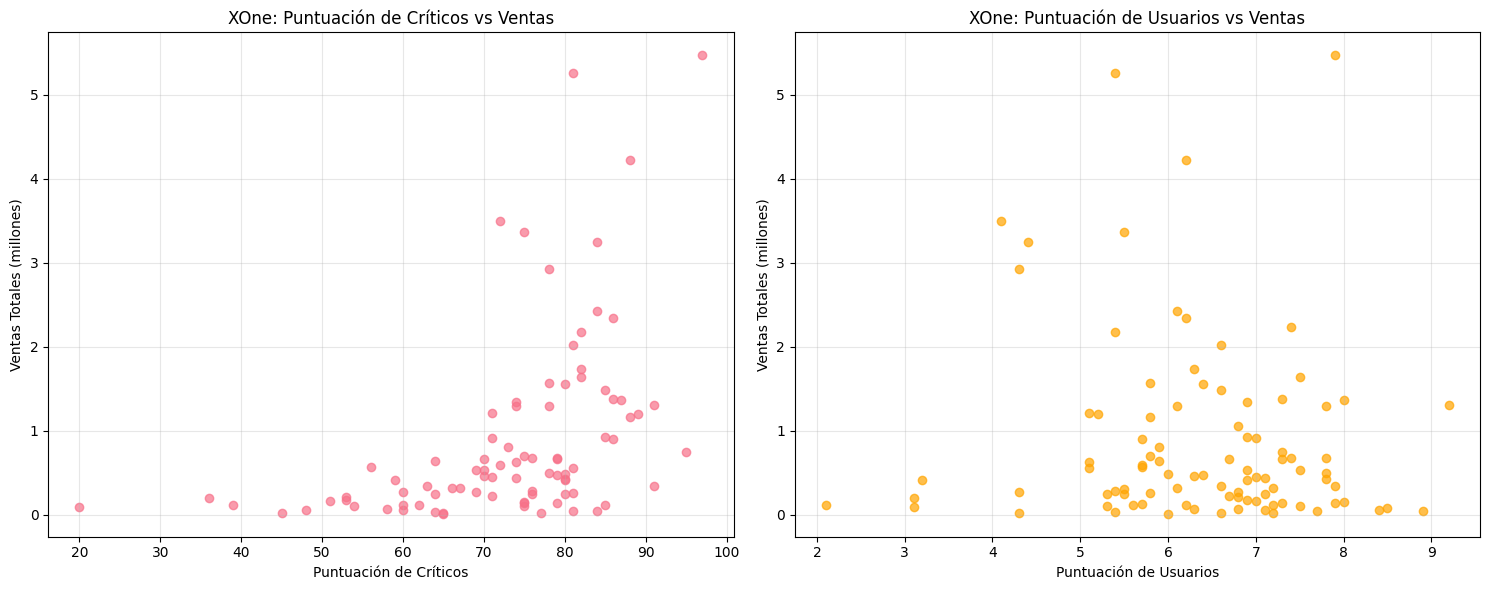

In [51]:
# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Correlación critic_score vs ventas (XOne)
axes[0].scatter(
    xone_critics['critic_score'],
    xone_critics['total_sales_clean'],
    alpha=0.7
)
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (millones)')
axes[0].set_title('XOne: Puntuación de Críticos vs Ventas')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Correlación user_score vs ventas (XOne)
axes[1].scatter(
    xone_users['user_score'],
    xone_users['total_sales_clean'],
    alpha=0.7,
    color='orange'
)
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (millones)')
axes[1].set_title('XOne: Puntuación de Usuarios vs Ventas')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
# Correlación entre critic_score y ventas (XOne)
corr_critic, p_value_critic = pearsonr(
    xone_critics['critic_score'],
    xone_critics['total_sales_clean']
)

# Correlación entre user_score y ventas (XOne)
corr_user, p_value_user = pearsonr(
    xone_users['user_score'],
    xone_users['total_sales_clean']
)

print("=== ANÁLISIS DE CORRELACIÓN XONE (2012-2015) ===")
print(f"Correlación Críticos vs Ventas: {corr_critic:.3f} (p-value: {p_value_critic:.3f})")
print(f"Correlación Usuarios vs Ventas: {corr_user:.3f} (p-value: {p_value_user:.3f})")

print("\n=== INTERPRETACIÓN ===")
if abs(corr_critic) > 0.3:
    strength_critic = 'Fuerte' if abs(corr_critic) > 0.7 else 'Moderada'
    direction_critic = 'positiva' if corr_critic > 0 else 'negativa'
    print(f"Correlación críticos: {strength_critic} {direction_critic}")
else:
    print("Correlación críticos: Débil")
    
if abs(corr_user) > 0.3:
    strength_user = 'Fuerte' if abs(corr_user) > 0.7 else 'Moderada'
    direction_user = 'positiva' if corr_user > 0 else 'negativa'
    print(f"Correlación usuarios: {strength_user} {direction_user}")
else:
    print("Correlación usuarios: Débil")

=== ANÁLISIS DE CORRELACIÓN XONE (2012-2015) ===
Correlación Críticos vs Ventas: 0.450 (p-value: 0.000)
Correlación Usuarios vs Ventas: -0.091 (p-value: 0.383)

=== INTERPRETACIÓN ===
Correlación críticos: Moderada positiva
Correlación usuarios: Débil


**2.7.3.2. PS3: 85 juegos (16.0%)**

In [53]:
# Obtener los nombres de los 153 juegos de PS4 analizados en el punto 2.7.2
ps4_clean_games = ps4_clean['name'].unique()
print(f"Juegos de PS4 analizados en punto 2.7.2: {len(ps4_clean_games)}")

# Filtrar datos de PS3 del período 2012-2015
ps3_data = period_data[
    period_data['platform'] == 'PS3'
].copy()

# Filtrar solo los juegos de PS3 que coinciden con los de PS4
ps3_data_matching = ps3_data[
    ps3_data['name'].isin(ps4_clean_games)
].copy()

print("=== DATOS DE PS3 PARA ANÁLISIS DE RESEÑAS ===")
print(f"Total de juegos PS3 (2012-2015): {len(ps3_data)}")
print(f"Juegos PS3 que coinciden con PS4: {len(ps3_data_matching)}")
print(f"Juegos con critic_score válido: {ps3_data_matching['critic_score'].notna().sum()}")
print(f"Juegos con user_score válido: {ps3_data_matching['user_score'].notna().sum()}")

# Dataset para análisis de críticos
ps3_critics = ps3_data_matching.dropna(
    subset=['critic_score', 'total_sales_clean']
).copy()

# Dataset para análisis de usuarios
ps3_users = ps3_data_matching.dropna(
    subset=['user_score', 'total_sales_clean']
).copy()

print(f"\nDataset críticos: {len(ps3_critics)} juegos")
print(f"Dataset usuarios: {len(ps3_users)} juegos")

Juegos de PS4 analizados en punto 2.7.2: 153
=== DATOS DE PS3 PARA ANÁLISIS DE RESEÑAS ===
Total de juegos PS3 (2012-2015): 455
Juegos PS3 que coinciden con PS4: 85
Juegos con critic_score válido: 20
Juegos con user_score válido: 79

Dataset críticos: 20 juegos
Dataset usuarios: 79 juegos


In [54]:
# Conversión de tipos
ps3_critics['critic_score'] = pd.to_numeric(
    ps3_critics['critic_score'], errors='coerce'
)
ps3_users['user_score'] = pd.to_numeric(
    ps3_users['user_score'], errors='coerce'
)

# Eliminar NaN después de conversión
ps3_critics = ps3_critics.dropna(
    subset=['critic_score', 'total_sales_clean']
)
ps3_users = ps3_users.dropna(
    subset=['user_score', 'total_sales_clean']
)

print(f"\nDataset final críticos: {len(ps3_critics)} juegos")
print(f"Dataset final usuarios: {len(ps3_users)} juegos")


Dataset final críticos: 20 juegos
Dataset final usuarios: 70 juegos


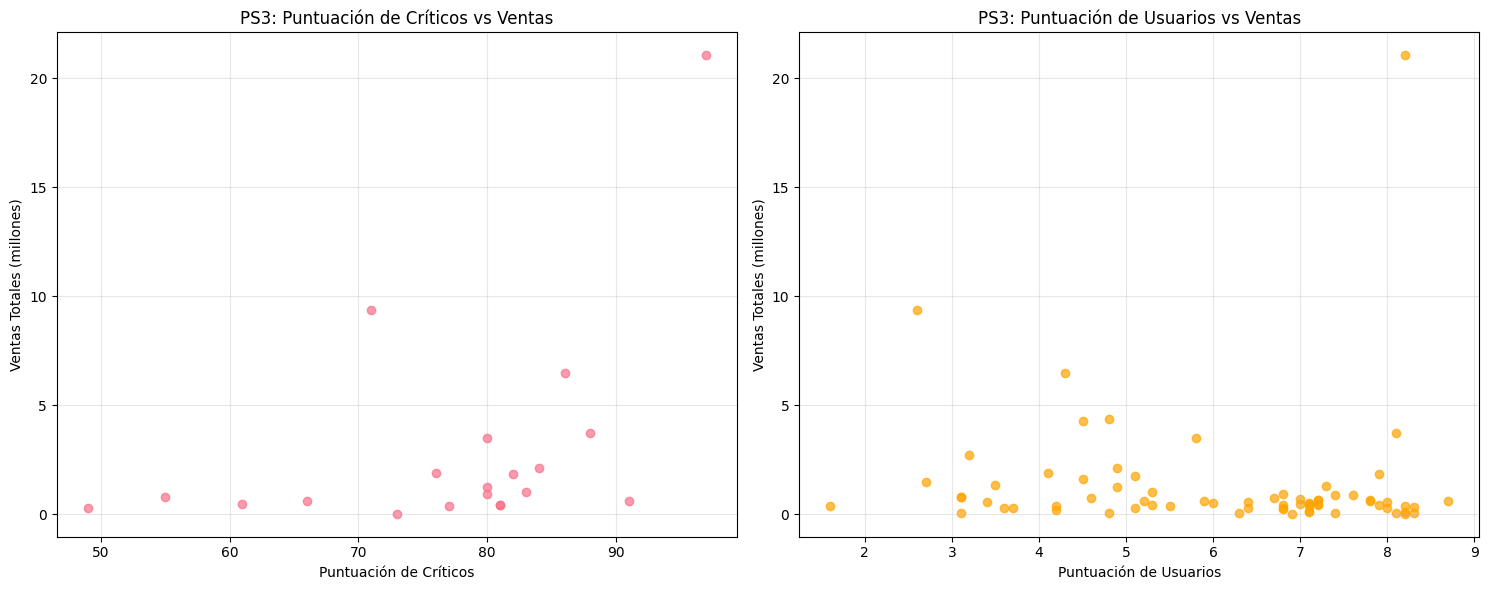

In [55]:
# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Correlación critic_score vs ventas (PS3)
axes[0].scatter(
    ps3_critics['critic_score'],
    ps3_critics['total_sales_clean'],
    alpha=0.7
)
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (millones)')
axes[0].set_title('PS3: Puntuación de Críticos vs Ventas')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Correlación user_score vs ventas (PS3)
axes[1].scatter(
    ps3_users['user_score'],
    ps3_users['total_sales_clean'],
    alpha=0.7,
    color='orange'
)
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (millones)')
axes[1].set_title('PS3: Puntuación de Usuarios vs Ventas')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [56]:
# Correlación entre critic_score y ventas (PS3)
corr_critic, p_value_critic = pearsonr(
    ps3_critics['critic_score'],
    ps3_critics['total_sales_clean']
)

# Correlación entre user_score y ventas (PS3)
corr_user, p_value_user = pearsonr(
    ps3_users['user_score'],
    ps3_users['total_sales_clean']
)

print("=== ANÁLISIS DE CORRELACIÓN PS3 (2012-2015) ===")
print(f"Correlación Críticos vs Ventas: {corr_critic:.3f} (p-value: {p_value_critic:.3f})")
print(f"Correlación Usuarios vs Ventas: {corr_user:.3f} (p-value: {p_value_user:.3f})")

print("\n=== INTERPRETACIÓN ===")
if abs(corr_critic) > 0.3:
    strength_critic = 'Fuerte' if abs(corr_critic) > 0.7 else 'Moderada'
    direction_critic = 'positiva' if corr_critic > 0 else 'negativa'
    print(f"Correlación críticos: {strength_critic} {direction_critic}")
else:
    print("Correlación críticos: Débil")
    
if abs(corr_user) > 0.3:
    strength_user = 'Fuerte' if abs(corr_user) > 0.7 else 'Moderada'
    direction_user = 'positiva' if corr_user > 0 else 'negativa'
    print(f"Correlación usuarios: {strength_user} {direction_user}")
else:
    print("Correlación usuarios: Débil")

=== ANÁLISIS DE CORRELACIÓN PS3 (2012-2015) ===
Correlación Críticos vs Ventas: 0.436 (p-value: 0.055)
Correlación Usuarios vs Ventas: -0.057 (p-value: 0.637)

=== INTERPRETACIÓN ===
Correlación críticos: Moderada positiva
Correlación usuarios: Débil


**2.7.3.3. X360: 62 juegos (11.7%)**

In [57]:
# Primero, obtener los nombres de los 153 juegos de PS4 analizados en el punto 2.7.2
ps4_clean_games = ps4_clean['name'].unique()
print(f"Juegos de PS4 analizados en punto 2.7.2: {len(ps4_clean_games)}")

# Filtrar datos de X360 del período 2012-2015
x360_data = period_data[period_data['platform'] == 'X360'].copy()

# Filtrar solo los juegos de X360 que coinciden con los de PS4
x360_data_matching = x360_data[x360_data['name'].isin(ps4_clean_games)].copy()

print("=== DATOS DE X360 PARA ANÁLISIS DE RESEÑAS ===")
print(f"Total de juegos X360 (2012-2015): {len(x360_data)}")
print(f"Juegos X360 que coinciden con PS4: {len(x360_data_matching)}")
print(f"Juegos con critic_score válido: {x360_data_matching['critic_score'].notna().sum()}")
print(f"Juegos con user_score válido: {x360_data_matching['user_score'].notna().sum()}")

# ANÁLISIS SEPARADO: Crear datasets específicos para cada tipo de reseña

# Dataset para análisis de críticos
x360_critics = x360_data_matching.dropna(
    subset=['critic_score', 'total_sales_clean']
).copy()

# Dataset para análisis de usuarios
x360_users = x360_data_matching.dropna(
    subset=['user_score', 'total_sales_clean']
).copy()

print(f"\nDataset críticos: {len(x360_critics)} juegos")
print(f"Dataset usuarios: {len(x360_users)} juegos")

Juegos de PS4 analizados en punto 2.7.2: 153
=== DATOS DE X360 PARA ANÁLISIS DE RESEÑAS ===
Total de juegos X360 (2012-2015): 279
Juegos X360 que coinciden con PS4: 62
Juegos con critic_score válido: 20
Juegos con user_score válido: 60

Dataset críticos: 20 juegos
Dataset usuarios: 60 juegos


In [58]:
# Limpiar datos
x360_critics['critic_score'] = pd.to_numeric(
    x360_critics['critic_score'], errors='coerce'
)
x360_users['user_score'] = pd.to_numeric(
    x360_users['user_score'], errors='coerce'
)

# Eliminar NaN después de conversión
x360_critics = x360_critics.dropna(
    subset=['critic_score', 'total_sales_clean']
)
x360_users = x360_users.dropna(
    subset=['user_score', 'total_sales_clean']
)

print(f"\nDataset final críticos: {len(x360_critics)} juegos")
print(f"Dataset final usuarios: {len(x360_users)} juegos")


Dataset final críticos: 20 juegos
Dataset final usuarios: 58 juegos


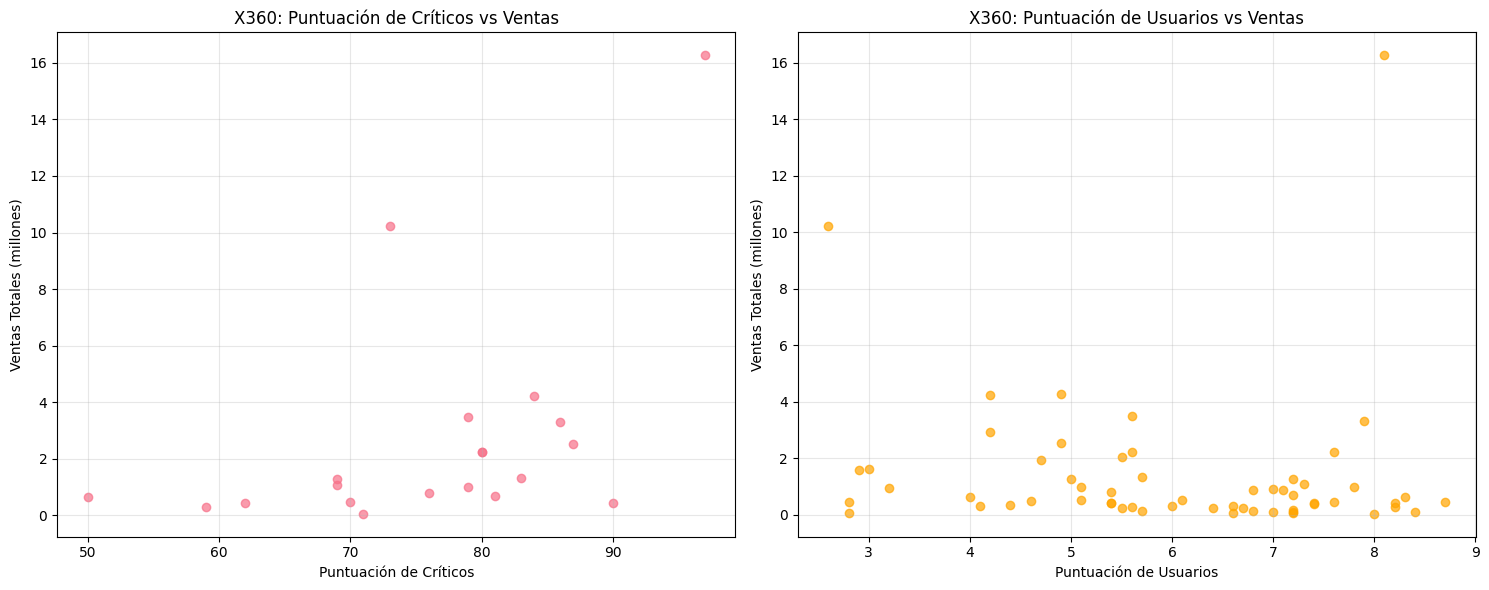

In [59]:
# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Correlación critic_score vs ventas (X360)
axes[0].scatter(
    x360_critics['critic_score'],
    x360_critics['total_sales_clean'],
    alpha=0.7
)
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (millones)')
axes[0].set_title('X360: Puntuación de Críticos vs Ventas')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Correlación user_score vs ventas (X360)
axes[1].scatter(
    x360_users['user_score'],
    x360_users['total_sales_clean'],
    alpha=0.7,
    color='orange'
)
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (millones)')
axes[1].set_title('X360: Puntuación de Usuarios vs Ventas')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
# Correlación entre critic_score y ventas (X360)
corr_critic, p_value_critic = pearsonr(
    x360_critics['critic_score'],
    x360_critics['total_sales_clean']
)

# Correlación entre user_score y ventas (X360)
corr_user, p_value_user = pearsonr(
    x360_users['user_score'],
    x360_users['total_sales_clean']
)

print("=== ANÁLISIS DE CORRELACIÓN X360 (2012-2015) ===")
print(f"Correlación Críticos vs Ventas: {corr_critic:.3f} (p-value: {p_value_critic:.3f})")
print(f"Correlación Usuarios vs Ventas: {corr_user:.3f} (p-value: {p_value_user:.3f})")

print("\n=== INTERPRETACIÓN ===")
if abs(corr_critic) > 0.3:
    strength_critic = 'Fuerte' if abs(corr_critic) > 0.7 else 'Moderada'
    direction_critic = 'positiva' if corr_critic > 0 else 'negativa'
    print(f"Correlación críticos: {strength_critic} {direction_critic}")
else:
    print("Correlación críticos: Débil")
    
if abs(corr_user) > 0.3:
    strength_user = 'Fuerte' if abs(corr_user) > 0.7 else 'Moderada'
    direction_user = 'positiva' if corr_user > 0 else 'negativa'
    print(f"Correlación usuarios: {strength_user} {direction_user}")
else:
    print("Correlación usuarios: Débil")

=== ANÁLISIS DE CORRELACIÓN X360 (2012-2015) ===
Correlación Críticos vs Ventas: 0.473 (p-value: 0.035)
Correlación Usuarios vs Ventas: -0.095 (p-value: 0.477)

=== INTERPRETACIÓN ===
Correlación críticos: Moderada positiva
Correlación usuarios: Débil


**2.7.3.5. PC: 53 juegos (10.0%) - PSV: 36 juegos (6.8%) - WiiU: 20 juegos (3.8%) - 3DS: 13 juegos (2.5%) - Wii: 9 juegos (1.7%) - PSP: 2 juegos (0.4%) - DS: 1 juegos (0.2%)**

In [61]:
low_volume_platforms = ['PC', 'PSV', 'WiiU', '3DS', 'Wii', 'PSP', 'DS']

# Obtener los nombres de los 153 juegos de PS4 analizados en el punto 2.7.2
ps4_clean_games = ps4_clean['name'].unique()
print(f"Juegos de PS4 analizados en punto 2.7.2: {len(ps4_clean_games)}")

# Filtrar datos del período para plataformas con bajo volumen
low_volume_data = period_data[
    period_data['platform'].isin(low_volume_platforms)
].copy()

# Filtrar solo los juegos que coinciden con los de PS4
low_volume_matching = low_volume_data[
    low_volume_data['name'].isin(ps4_clean_games)
].copy()

print("=== DATOS DE PLATAFORMAS CON BAJO VOLUMEN PARA ANÁLISIS DE RESEÑAS ===")
print(f"Total de juegos (2012-2015): {len(low_volume_data)}")
print(f"Juegos que coinciden con PS4: {len(low_volume_matching)}")
print(f"Juegos con critic_score válido: {low_volume_matching['critic_score'].notna().sum()}")
print(f"Juegos con user_score válido: {low_volume_matching['user_score'].notna().sum()}")

# Dataset para análisis de críticos
low_volume_critics = low_volume_matching.dropna(
    subset=['critic_score', 'total_sales_clean']
).copy()

# Dataset para análisis de usuarios
low_volume_users = low_volume_matching.dropna(
    subset=['user_score', 'total_sales_clean']
).copy()

print(f"\nDataset críticos: {len(low_volume_critics)} juegos")
print(f"Dataset usuarios: {len(low_volume_users)} juegos")

Juegos de PS4 analizados en punto 2.7.2: 153
=== DATOS DE PLATAFORMAS CON BAJO VOLUMEN PARA ANÁLISIS DE RESEÑAS ===
Total de juegos (2012-2015): 1262
Juegos que coinciden con PS4: 134
Juegos con critic_score válido: 84
Juegos con user_score válido: 126

Dataset críticos: 84 juegos
Dataset usuarios: 126 juegos


In [62]:
# Conversión de tipos
low_volume_critics['critic_score'] = pd.to_numeric(
    low_volume_critics['critic_score'], errors='coerce'
)
low_volume_users['user_score'] = pd.to_numeric(
    low_volume_users['user_score'], errors='coerce'
)

# Eliminar valores faltantes posteriores a conversión
low_volume_critics = low_volume_critics.dropna(
    subset=['critic_score', 'total_sales_clean']
)
low_volume_users = low_volume_users.dropna(
    subset=['user_score', 'total_sales_clean']
)

print(f"\nDataset final críticos: {len(low_volume_critics)} juegos")
print(f"Dataset final usuarios: {len(low_volume_users)} juegos")


Dataset final críticos: 84 juegos
Dataset final usuarios: 119 juegos


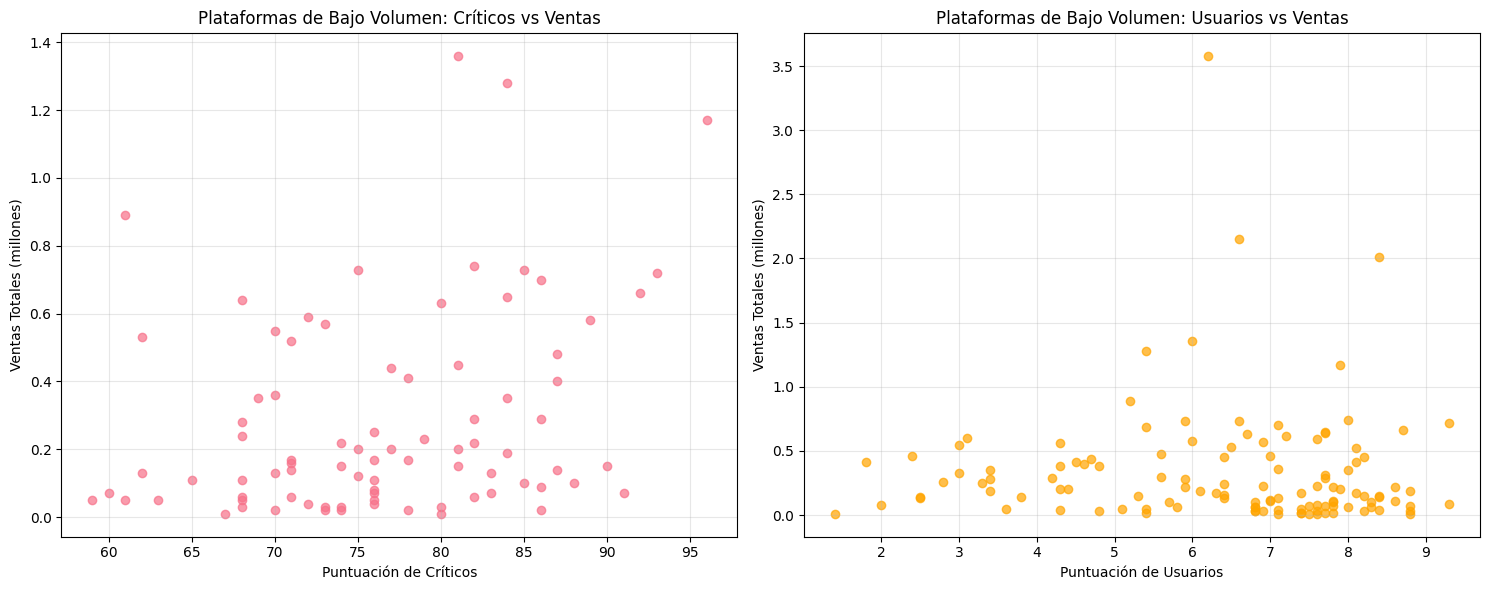

In [63]:
# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Críticos
axes[0].scatter(
    low_volume_critics['critic_score'],
    low_volume_critics['total_sales_clean'],
    alpha=0.7
)
axes[0].set_xlabel('Puntuación de Críticos')
axes[0].set_ylabel('Ventas Totales (millones)')
axes[0].set_title('Plataformas de Bajo Volumen: Críticos vs Ventas')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Usuarios
axes[1].scatter(
    low_volume_users['user_score'],
    low_volume_users['total_sales_clean'],
    alpha=0.7,
    color='orange'
)
axes[1].set_xlabel('Puntuación de Usuarios')
axes[1].set_ylabel('Ventas Totales (millones)')
axes[1].set_title('Plataformas de Bajo Volumen: Usuarios vs Ventas')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [64]:
# Correlación críticos
corr_critic, p_value_critic = pearsonr(
    low_volume_critics['critic_score'],
    low_volume_critics['total_sales_clean']
)

# Correlación usuarios
corr_user, p_value_user = pearsonr(
    low_volume_users['user_score'],
    low_volume_users['total_sales_clean']
)

print("=== ANÁLISIS DE CORRELACIÓN PLATAFORMAS DE BAJO VOLUMEN (2012-2015) ===")
print(f"Correlación Críticos vs Ventas: {corr_critic:.3f} (p-value: {p_value_critic:.3f})")
print(f"Correlación Usuarios vs Ventas: {corr_user:.3f} (p-value: {p_value_user:.3f})")

print("\n=== INTERPRETACIÓN ===")
if abs(corr_critic) > 0.3:
    strength_critic = 'Fuerte' if abs(corr_critic) > 0.7 else 'Moderada'
    direction_critic = 'positiva' if corr_critic > 0 else 'negativa'
    print(f"Correlación críticos: {strength_critic} {direction_critic}")
else:
    print("Correlación críticos: Débil")
    
if abs(corr_user) > 0.3:
    strength_user = 'Fuerte' if abs(corr_user) > 0.7 else 'Moderada'
    direction_user = 'positiva' if corr_user > 0 else 'negativa'
    print(f"Correlación usuarios: {strength_user} {direction_user}")
else:
    print("Correlación usuarios: Débil")

=== ANÁLISIS DE CORRELACIÓN PLATAFORMAS DE BAJO VOLUMEN (2012-2015) ===
Correlación Críticos vs Ventas: 0.291 (p-value: 0.007)
Correlación Usuarios vs Ventas: -0.017 (p-value: 0.856)

=== INTERPRETACIÓN ===
Correlación críticos: Débil
Correlación usuarios: Débil


###  Conclusiones de analizar si la correlación reseñas-ventas se mantiene en cada plataforma

**Influencia de las reseñas de críticos profesionales**

Tomando a PS4 como plataforma base, se observa un patrón consistente en la mayoría de las plataformas analizadas: las puntuaciones de críticos profesionales muestran una correlación positiva moderada con las ventas. En PS4, esta relación se manifiesta de forma clara, indicando que los juegos mejor valorados por la crítica tienden a alcanzar mayores niveles de ventas globales.

Este comportamiento se replica en plataformas como Xbox One, Xbox 360 y PS3, donde las correlaciones entre críticas y ventas oscilan en rangos similares (aproximadamente entre 0.43 y 0.47). La tendencia general sugiere que la opinión de críticos especializados mantiene un rol relevante y relativamente estable como predictor del desempeño comercial, independientemente de la plataforma.

En contraste, al analizar plataformas de menor volumen de juegos coincidentes, la correlación entre críticas y ventas se debilita notablemente. Esto sugiere que, en ecosistemas con menor alcance comercial o bases de usuarios más reducidas, el impacto de las reseñas profesionales sobre las ventas es más limitado.

**Influencia de las reseñas de usuarios**

A diferencia de las reseñas de críticos, las puntuaciones de usuarios presentan un comportamiento consistentemente débil y no significativo en relación con las ventas, tanto en PS4 como en el resto de plataformas analizadas. En la plataforma de referencia (PS4), aunque la relación entre reseñas de usuarios y ventas es más coherente visualmente que en otras plataformas, sigue sin mostrar una correlación fuerte o estadísticamente significativa.

Este patrón se acentúa en plataformas como Xbox One, Xbox 360 y PS3, donde las correlaciones son cercanas a cero o incluso levemente negativas, indicando que las calificaciones de los usuarios no influyen de manera directa en el volumen de ventas. En las plataformas de bajo volumen, esta falta de relación es aún más evidente, reforzando la idea de que las reseñas de usuarios no constituyen un factor determinante del éxito comercial a gran escala.

**Comparación transversal entre plataformas**

Al comparar las ventas de los mismos juegos en distintas plataformas, PS4 destaca como un entorno donde la relación entre calidad percibida por críticos y desempeño comercial se manifiesta con mayor claridad. Sin embargo, la similitud de los coeficientes de correlación entre plataformas líderes sugiere que este fenómeno no es exclusivo de PS4, sino que responde a una dinámica general del mercado de videojuegos durante el período analizado.

La principal diferencia entre plataformas radica en el comportamiento de las reseñas de usuarios, cuyo impacto es débil en todos los casos, pero especialmente inconsistente fuera de PS4. Esto indica que las decisiones de compra parecen estar más influenciadas por factores como la reputación crítica, el marketing, la franquicia o la exclusividad de la plataforma, más que por la valoración directa de la comunidad de jugadores.

**Implicaciones para la planificación estratégica**

En conjunto, estos resultados sugieren que las campañas publicitarias y las estrategias de lanzamiento deberían priorizar el posicionamiento crítico y la visibilidad en medios especializados, especialmente en plataformas con alto volumen de ventas como PS4 y Xbox One. Las reseñas de usuarios, aunque relevantes desde una perspectiva cualitativa, no muestran evidencia estadística suficiente para ser consideradas un motor principal de ventas, particularmente en análisis comparativos entre plataformas.

Este hallazgo refuerza la importancia de adaptar las estrategias de marketing según el ecosistema de cada plataforma, utilizando las reseñas profesionales como un indicador más confiable del potencial éxito comercial de un videojuego.

### 2.8 Análisis de Distribución de Juegos por Género

Tras analizar el comportamiento de las plataformas y el impacto de las reseñas en las ventas, es fundamental examinar cómo se distribuyen los videojuegos según sus géneros y cuáles representan las mejores oportunidades comerciales. El análisis de géneros permite identificar segmentos de mercado con mayor potencial de rentabilidad y comprender las preferencias de los consumidores durante el período 2012-2015.

En esta sección se evaluará la distribución general de juegos por género, identificando aquellos con mayor volumen de títulos versus aquellos con mayor eficiencia comercial. A través del análisis de ventas totales, promedio por juego y participación de mercado, se determinará qué géneros ofrecen las mejores oportunidades para maximizar el retorno de inversión en 2017.

El objetivo es responder preguntas clave como: ¿qué géneros dominan el mercado en términos de cantidad de títulos?, ¿cuáles son más rentables por juego individual?, y ¿es posible generalizar sobre los patrones de éxito y fracaso según el género? Esta información será crucial para orientar las decisiones de inventario y estrategias de marketing de la tienda Ice.

In [65]:
# Análisis de distribución de juegos por género (período 2012-2015)
print("=== ANÁLISIS DE DISTRIBUCIÓN POR GÉNERO (2012-2015) ===")

# Usar los datos del período ya definido
genre_analysis = period_data.groupby('genre').agg({
    'total_sales_clean': ['count', 'sum', 'mean', 'median'],
    'name': 'nunique'
}).round(2)

# Aplanar los nombres de columnas
genre_analysis.columns = ['Num_Juegos', 'Ventas_Totales', 'Ventas_Promedio', 'Ventas_Mediana', 'Titulos_Unicos']

# Ordenar por ventas totales
genre_analysis = genre_analysis.sort_values('Ventas_Totales', ascending=False)

print("Estadísticas por género:")
print(genre_analysis)

=== ANÁLISIS DE DISTRIBUCIÓN POR GÉNERO (2012-2015) ===
Estadísticas por género:
              Num_Juegos  Ventas_Totales  Ventas_Promedio  Ventas_Mediana  \
genre                                                                       
Action               853          411.01             0.48            0.14   
Shooter              188          266.51             1.42            0.52   
Role-Playing         316          174.62             0.55            0.15   
Sports               220          157.58             0.72            0.31   
Misc                 160           82.44             0.52            0.18   
Platform              70           57.77             0.83            0.29   
Racing                91           50.71             0.56            0.23   
Fighting              93           40.02             0.43            0.16   
Simulation            62           33.23             0.54            0.15   
Adventure            246           25.61             0.10            0.0

In [66]:
# Calcular porcentajes de mercado
total_ventas = genre_analysis['Ventas_Totales'].sum()
total_juegos = genre_analysis['Num_Juegos'].sum()

print(f"\n=== PARTICIPACIÓN DE MERCADO POR GÉNERO ===\n")
print(f"Total del mercado: {total_ventas:.1f}M USD")
print(f"Total de juegos: {total_juegos}\n")

for genre in genre_analysis.index:
    ventas = genre_analysis.loc[genre, 'Ventas_Totales']
    juegos = genre_analysis.loc[genre, 'Num_Juegos']
    porcentaje_ventas = (ventas / total_ventas) * 100
    porcentaje_juegos = (juegos / total_juegos) * 100
    
    print(f"{genre}:")
    print(f"  Ventas: {ventas:.1f}M ({porcentaje_ventas:.1f}%)")
    print(f"  Juegos: {juegos} ({porcentaje_juegos:.1f}%)")
    print(f"  Eficiencia: {ventas/juegos:.2f}M por juego\n")


=== PARTICIPACIÓN DE MERCADO POR GÉNERO ===

Total del mercado: 1316.6M USD
Total de juegos: 2384

Action:
  Ventas: 411.0M (31.2%)
  Juegos: 853 (35.8%)
  Eficiencia: 0.48M por juego

Shooter:
  Ventas: 266.5M (20.2%)
  Juegos: 188 (7.9%)
  Eficiencia: 1.42M por juego

Role-Playing:
  Ventas: 174.6M (13.3%)
  Juegos: 316 (13.3%)
  Eficiencia: 0.55M por juego

Sports:
  Ventas: 157.6M (12.0%)
  Juegos: 220 (9.2%)
  Eficiencia: 0.72M por juego

Misc:
  Ventas: 82.4M (6.3%)
  Juegos: 160 (6.7%)
  Eficiencia: 0.52M por juego

Platform:
  Ventas: 57.8M (4.4%)
  Juegos: 70 (2.9%)
  Eficiencia: 0.83M por juego

Racing:
  Ventas: 50.7M (3.9%)
  Juegos: 91 (3.8%)
  Eficiencia: 0.56M por juego

Fighting:
  Ventas: 40.0M (3.0%)
  Juegos: 93 (3.9%)
  Eficiencia: 0.43M por juego

Simulation:
  Ventas: 33.2M (2.5%)
  Juegos: 62 (2.6%)
  Eficiencia: 0.54M por juego

Adventure:
  Ventas: 25.6M (1.9%)
  Juegos: 246 (10.3%)
  Eficiencia: 0.10M por juego

Strategy:
  Ventas: 12.2M (0.9%)
  Juegos: 58 (

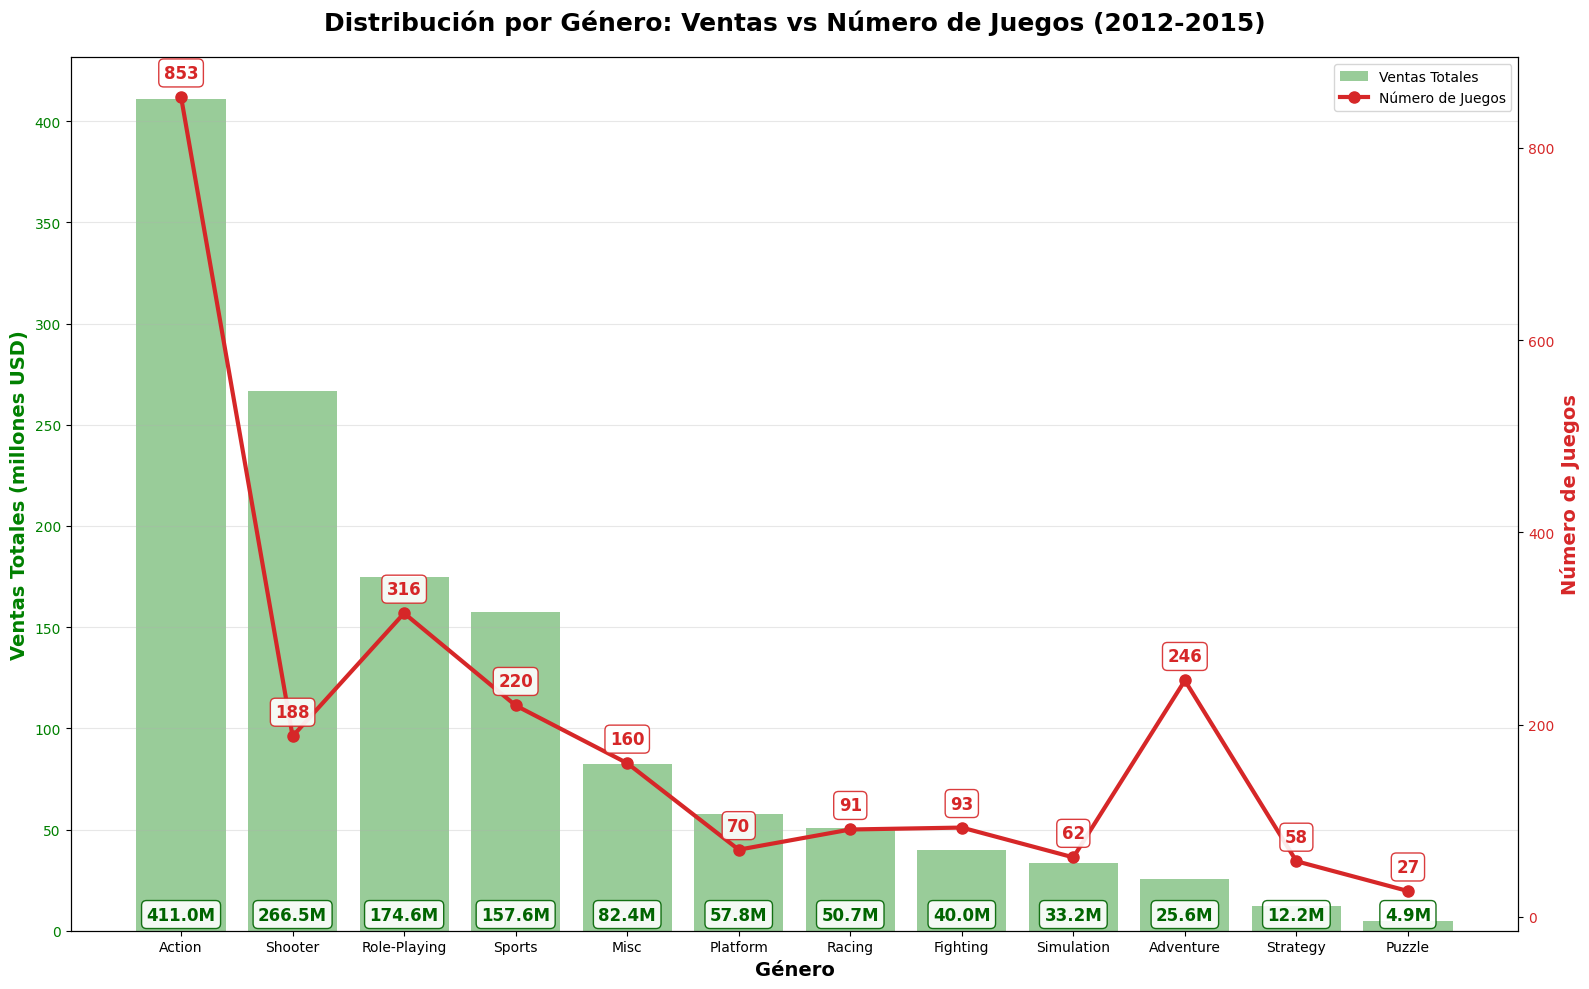

In [67]:
# Crear gráfico de distribución detallado con doble eje Y
fig, ax1 = plt.subplots(figsize=(16, 10))

# Configurar el primer eje Y (ventas)
color1 = 'green'
ax1.set_xlabel('Género', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ventas Totales (millones USD)', color=color1, fontsize=14, fontweight='bold')

# Crear barras para ventas totales 
bars1 = ax1.bar(range(len(genre_analysis)), 
                genre_analysis['Ventas_Totales'],
                color=color1, alpha=0.4, label='Ventas Totales')

ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(axis='y', alpha=0.3)

# Crear segundo eje Y para número de juegos
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Número de Juegos', color=color2, fontsize=14, fontweight='bold')

# Crear línea para número de juegos
line = ax2.plot(range(len(genre_analysis)), 
                genre_analysis['Num_Juegos'],
                color=color2, marker='o', linewidth=3, 
                markersize=8, label='Número de Juegos')

ax2.tick_params(axis='y', labelcolor=color2)

# Configurar etiquetas del eje X
plt.xticks(range(len(genre_analysis)), genre_analysis.index, 
           rotation=45, ha='right', fontsize=12)

# Título
plt.title('Distribución por Género: Ventas vs Número de Juegos (2012-2015)', 
          fontsize=18, fontweight='bold', pad=20)

# Definir altura fija para todas las etiquetas de ventas (alineadas)
altura_etiquetas = 8  # Altura fija para todas las etiquetas

# Agregar valores ALINEADOS en la parte baja (ventas) 
for i, bar in enumerate(bars1):
    height = bar.get_height()
    # Posicionar TODAS las etiquetas a la misma altura fija
    ax1.text(bar.get_x() + bar.get_width()/2., altura_etiquetas,
             f'{height:.1f}M',
             ha='center', va='center', fontweight='bold', fontsize=12,
             color='darkgreen', bbox=dict(boxstyle='round,pad=0.3', 
                                        facecolor='white', alpha=0.9,
                                        edgecolor='darkgreen', linewidth=1))

# Agregar valores ARRIBA de los puntos (número de juegos) - con formato encerrado
for i, value in enumerate(genre_analysis['Num_Juegos']):
    # Posicionar las etiquetas arriba de los puntos
    ax2.text(i, value + 25, f'{value}',
             ha='center', va='center', fontweight='bold', 
             fontsize=12, color=color2, 
             bbox=dict(boxstyle='round,pad=0.3', 
                      facecolor='white', alpha=0.9,
                      edgecolor=color2, linewidth=1))

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [68]:
# === ANÁLISIS DE RENTABILIDAD: VOLUMEN VS EFICIENCIA ===
print("=== ANÁLISIS DE RENTABILIDAD: VOLUMEN VS EFICIENCIA ===")
print("¿Es mejor tener muchos juegos con baja eficiencia o pocos con alta eficiencia?")
print()

# Usar los datos del período 2012-2015 que ya tienes
genre_analysis = period_data.groupby('genre').agg({
    'total_sales_clean': ['count', 'sum', 'mean'],
    'name': 'nunique'
}).round(2)

# Aplanar los nombres de columnas
genre_analysis.columns = ['Num_Juegos', 'Ventas_Totales', 'Eficiencia_Promedio', 'Titulos_Unicos']

# Ordenar por ventas totales para ver el ranking real
genre_analysis = genre_analysis.sort_values('Ventas_Totales', ascending=False)

print("RANKING POR GANANCIAS TOTALES:")
print("=" * 50)
for i, (genre, data) in enumerate(genre_analysis.iterrows(), 1):
    ventas_totales = data['Ventas_Totales']
    num_juegos = data['Num_Juegos']
    eficiencia = data['Eficiencia_Promedio']
    
    print(f"{i}. {genre}:")
    print(f"   Ganancias totales: {ventas_totales:.1f}M USD")
    print(f"   Número de juegos: {num_juegos}")
    print(f"   Eficiencia: {eficiencia:.2f}M por juego")
    print(f"   Ratio ganancia/eficiencia: {ventas_totales/eficiencia:.1f}")
    print()

=== ANÁLISIS DE RENTABILIDAD: VOLUMEN VS EFICIENCIA ===
¿Es mejor tener muchos juegos con baja eficiencia o pocos con alta eficiencia?

RANKING POR GANANCIAS TOTALES:
1. Action:
   Ganancias totales: 411.0M USD
   Número de juegos: 853.0
   Eficiencia: 0.48M por juego
   Ratio ganancia/eficiencia: 856.3

2. Shooter:
   Ganancias totales: 266.5M USD
   Número de juegos: 188.0
   Eficiencia: 1.42M por juego
   Ratio ganancia/eficiencia: 187.7

3. Role-Playing:
   Ganancias totales: 174.6M USD
   Número de juegos: 316.0
   Eficiencia: 0.55M por juego
   Ratio ganancia/eficiencia: 317.5

4. Sports:
   Ganancias totales: 157.6M USD
   Número de juegos: 220.0
   Eficiencia: 0.72M por juego
   Ratio ganancia/eficiencia: 218.9

5. Misc:
   Ganancias totales: 82.4M USD
   Número de juegos: 160.0
   Eficiencia: 0.52M por juego
   Ratio ganancia/eficiencia: 158.5

6. Platform:
   Ganancias totales: 57.8M USD
   Número de juegos: 70.0
   Eficiencia: 0.83M por juego
   Ratio ganancia/eficiencia: 69

In [69]:
# Código para categorizar géneros por estrategia
print("=== CATEGORIZACIÓN ESTRATÉGICA POR RATIO ===")
print()

# PRIMERO: Crear la columna Ratio_Ganancia_Eficiencia
genre_analysis['Ratio_Ganancia_Eficiencia'] = genre_analysis['Ventas_Totales'] / genre_analysis['Eficiencia_Promedio']

# Definir umbrales
alto_ratio = genre_analysis[genre_analysis['Ratio_Ganancia_Eficiencia'] > 200]
medio_ratio = genre_analysis[(genre_analysis['Ratio_Ganancia_Eficiencia'] >= 100) & 
                            (genre_analysis['Ratio_Ganancia_Eficiencia'] <= 200)]
bajo_ratio = genre_analysis[genre_analysis['Ratio_Ganancia_Eficiencia'] < 100]

print(" ESTRATEGIA DE VOLUMEN (Ratio > 200):")
print("   Géneros ideales para producción masiva")
for genre in alto_ratio.index:
    ratio = alto_ratio.loc[genre, 'Ratio_Ganancia_Eficiencia']
    print(f"   • {genre}: {ratio:.1f}")

print("\n ESTRATEGIA EQUILIBRADA (Ratio 100-200):")
print("   Géneros con balance óptimo")
for genre in medio_ratio.index:
    ratio = medio_ratio.loc[genre, 'Ratio_Ganancia_Eficiencia']
    print(f"   • {genre}: {ratio:.1f}")

print("\n ESTRATEGIA PREMIUM (Ratio < 100):")
print("   Géneros para productos de alta calidad")
for genre in bajo_ratio.index:
    ratio = bajo_ratio.loc[genre, 'Ratio_Ganancia_Eficiencia']
    print(f"   • {genre}: {ratio:.1f}")

=== CATEGORIZACIÓN ESTRATÉGICA POR RATIO ===

 ESTRATEGIA DE VOLUMEN (Ratio > 200):
   Géneros ideales para producción masiva
   • Action: 856.3
   • Role-Playing: 317.5
   • Sports: 218.9
   • Adventure: 256.1

 ESTRATEGIA EQUILIBRADA (Ratio 100-200):
   Géneros con balance óptimo
   • Shooter: 187.7
   • Misc: 158.5

 ESTRATEGIA PREMIUM (Ratio < 100):
   Géneros para productos de alta calidad
   • Platform: 69.6
   • Racing: 90.6
   • Fighting: 93.1
   • Simulation: 61.5
   • Strategy: 58.1
   • Puzzle: 27.1


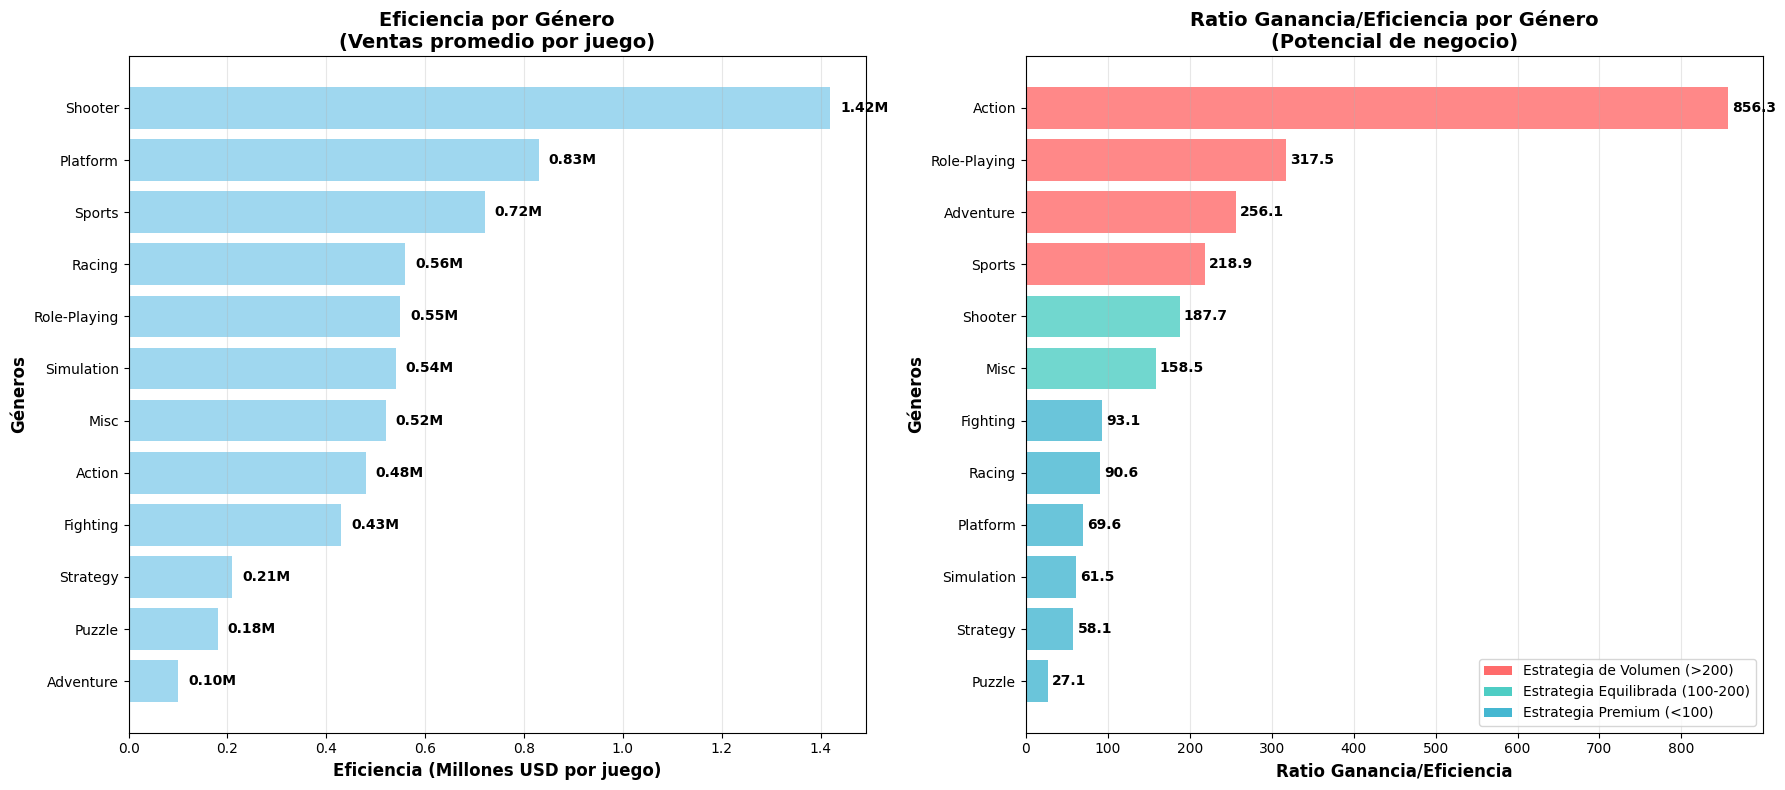

In [70]:
# Crear figura con dos subgráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Preparar los datos (usando los datos del período 2012-2015)
genre_analysis_sorted = genre_analysis.sort_values('Eficiencia_Promedio', ascending=True)

# GRÁFICO 1: EFICIENCIA (Ventas promedio por juego)
bars1 = ax1.barh(range(len(genre_analysis_sorted)), 
                 genre_analysis_sorted['Eficiencia_Promedio'],
                 color='skyblue', alpha=0.8)

ax1.set_xlabel('Eficiencia (Millones USD por juego)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Géneros', fontweight='bold', fontsize=12)
ax1.set_title('Eficiencia por Género\n(Ventas promedio por juego)', 
              fontweight='bold', fontsize=14)
ax1.set_yticks(range(len(genre_analysis_sorted)))
ax1.set_yticklabels(genre_analysis_sorted.index)
ax1.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}M', ha='left', va='center', fontweight='bold')

# GRÁFICO 2: RATIO (Potencial de volumen)
genre_analysis_ratio_sorted = genre_analysis.sort_values('Ratio_Ganancia_Eficiencia', ascending=True)

# Definir colores según la estrategia
colors = []
for genre in genre_analysis_ratio_sorted.index:
    ratio = genre_analysis_ratio_sorted.loc[genre, 'Ratio_Ganancia_Eficiencia']
    if ratio > 200:
        colors.append('#FF6B6B')  # Rojo para estrategia de volumen
    elif ratio >= 100:
        colors.append('#4ECDC4')  # Verde para estrategia equilibrada
    else:
        colors.append('#45B7D1')  # Azul para estrategia premium

bars2 = ax2.barh(range(len(genre_analysis_ratio_sorted)), 
                 genre_analysis_ratio_sorted['Ratio_Ganancia_Eficiencia'],
                 color=colors, alpha=0.8)

ax2.set_xlabel('Ratio Ganancia/Eficiencia', fontweight='bold', fontsize=12)
ax2.set_ylabel('Géneros', fontweight='bold', fontsize=12)
ax2.set_title('Ratio Ganancia/Eficiencia por Género\n(Potencial de negocio)', 
              fontweight='bold', fontsize=14)
ax2.set_yticks(range(len(genre_analysis_ratio_sorted)))
ax2.set_yticklabels(genre_analysis_ratio_sorted.index)
ax2.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 5, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
         ha='left', va='center', fontweight='bold')


# Agregar leyenda para el segundo gráfico
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label='Estrategia de Volumen (>200)'),
                   Patch(facecolor='#4ECDC4', label='Estrategia Equilibrada (100-200)'),
                   Patch(facecolor='#45B7D1', label='Estrategia Premium (<100)')]
ax2.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Ajustar el layout
plt.tight_layout()
plt.show()

### Conclusión: Análisis de Distribución de Juegos por Género (2012-2015)


**¿Qué se puede decir de los géneros más rentables?**

Dos estrategias de rentabilidad:

1. Eficiencia Individual:
- Shooter: 1.42M USD/juego - Inversión focalizada en títulos premium
- Platform: 0.83M USD/juego - Nicho especializado con retorno garantizado  
- Sports: 0.72M USD/juego - Mercado estable y predecible

2. Potencial de Negocio Total:
- Action: Ratio 856.3 - Producción masiva (411.0M USD totales)
- Role-Playing: Ratio 317.5 - Balance volumen-rentabilidad
- Adventure: Ratio 256.1 - Alto potencial de escalabilidad

**¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**

Ventas Altas - Dos Patrones:

1. Volumen Masivo: Action, Role-Playing
- Mercados saturados, competencia intensa
- Baja eficiencia individual, alto potencial acumulativo

2. Eficiencia Premium: Shooter, Sports  
- Mercados especializados, menor saturación
- Alta rentabilidad por título individual

Ventas Bajas - Nichos Especializados:
- Strategy/Puzzle: Mercados pequeños pero estables
- Adventure: Saturación sin rentabilidad (0.10M/juego)

**Recomendaciones Estratégicas 2017**

Estrategia Dual de Inversión:

- Portfolio Premium (30%): Shooter y Platform para maximizar ROI
- Portfolio de Volumen (70%): Action y Role-Playing para cuota de mercado

**Conclusión Operativa:**

El éxito requiere balance estratégico entre nichos altamente rentables y mercados masivos. No existe un género único "más rentable", sino estrategias complementarias que optimizan tanto rentabilidad inmediata como crecimiento sostenible del negocio.

## Paso 4. Perfil de usuario para cada región

Después de haber explorado los datos generales de ventas de videojuegos y identificado las tendencias principales en plataformas y géneros, es momento de profundizar en las diferencias regionales. Cada mercado tiene características únicas que influyen en las preferencias de los consumidores.

En este paso, analizaremos cómo varían los patrones de consumo entre las tres regiones principales: Norteamérica (NA), Europa (UE) y Japón (JP). Este análisis regional nos permitirá:

- Identificar las plataformas dominantes en cada mercado
- Comprender las preferencias de género por región
- Evaluar el impacto de las clasificaciones ESRB en diferentes culturas

Esta segmentación regional será fundamental para diseñar estrategias de marketing específicas y optimizar las campañas publicitarias para 2017.

### 4.1 Top 5 de plataformas

In [71]:
# Obtener TOP 5 plataformas por cada región
print("\n=== TOP 5 PLATAFORMAS POR REGIÓN ===")

# Calcular datos regionales para el período 2012-2015
platform_regional = period_data.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'total_sales_clean': 'sum'
}).round(1)

# Norteamérica (NA)
top5_na = platform_regional.sort_values('na_sales', ascending=False).head(5)
print("\n🇺🇸 NORTEAMÉRICA (NA) - TOP 5:")
for i, (platform, data) in enumerate(top5_na.iterrows(), 1):
    ventas_na = data['na_sales']
    total_na = platform_regional['na_sales'].sum()
    porcentaje = (ventas_na / total_na) * 100
    print(f"{i}. {platform}: {ventas_na:.1f}M ({porcentaje:.1f}%)")

# Europa (EU)  
top5_eu = platform_regional.sort_values('eu_sales', ascending=False).head(5)
print("\n🇪🇺 EUROPA (EU) - TOP 5:")
for i, (platform, data) in enumerate(top5_eu.iterrows(), 1):
    ventas_eu = data['eu_sales']
    total_eu = platform_regional['eu_sales'].sum()
    porcentaje = (ventas_eu / total_eu) * 100
    print(f"{i}. {platform}: {ventas_eu:.1f}M ({porcentaje:.1f}%)")

# Japón (JP)
top5_jp = platform_regional.sort_values('jp_sales', ascending=False).head(5)
print("\n🇯🇵 JAPÓN (JP) - TOP 5:")
for i, (platform, data) in enumerate(top5_jp.iterrows(), 1):
    ventas_jp = data['jp_sales']
    total_jp = platform_regional['jp_sales'].sum()
    porcentaje = (ventas_jp / total_jp) * 100
    print(f"{i}. {platform}: {ventas_jp:.1f}M ({porcentaje:.1f}%)")


=== TOP 5 PLATAFORMAS POR REGIÓN ===

🇺🇸 NORTEAMÉRICA (NA) - TOP 5:
1. X360: 139.4M (25.5%)
2. PS3: 102.7M (18.8%)
3. PS4: 87.2M (16.0%)
4. XOne: 78.8M (14.4%)
5. 3DS: 51.2M (9.4%)

🇪🇺 EUROPA (EU) - TOP 5:
1. PS4: 109.3M (24.0%)
2. PS3: 105.6M (23.2%)
3. X360: 73.8M (16.2%)
4. XOne: 42.0M (9.2%)
5. 3DS: 40.3M (8.8%)

🇯🇵 JAPÓN (JP) - TOP 5:
1. 3DS: 79.8M (46.0%)
2. PS3: 34.0M (19.6%)
3. PSV: 17.5M (10.1%)
4. WiiU: 12.3M (7.1%)
5. PSP: 10.5M (6.1%)


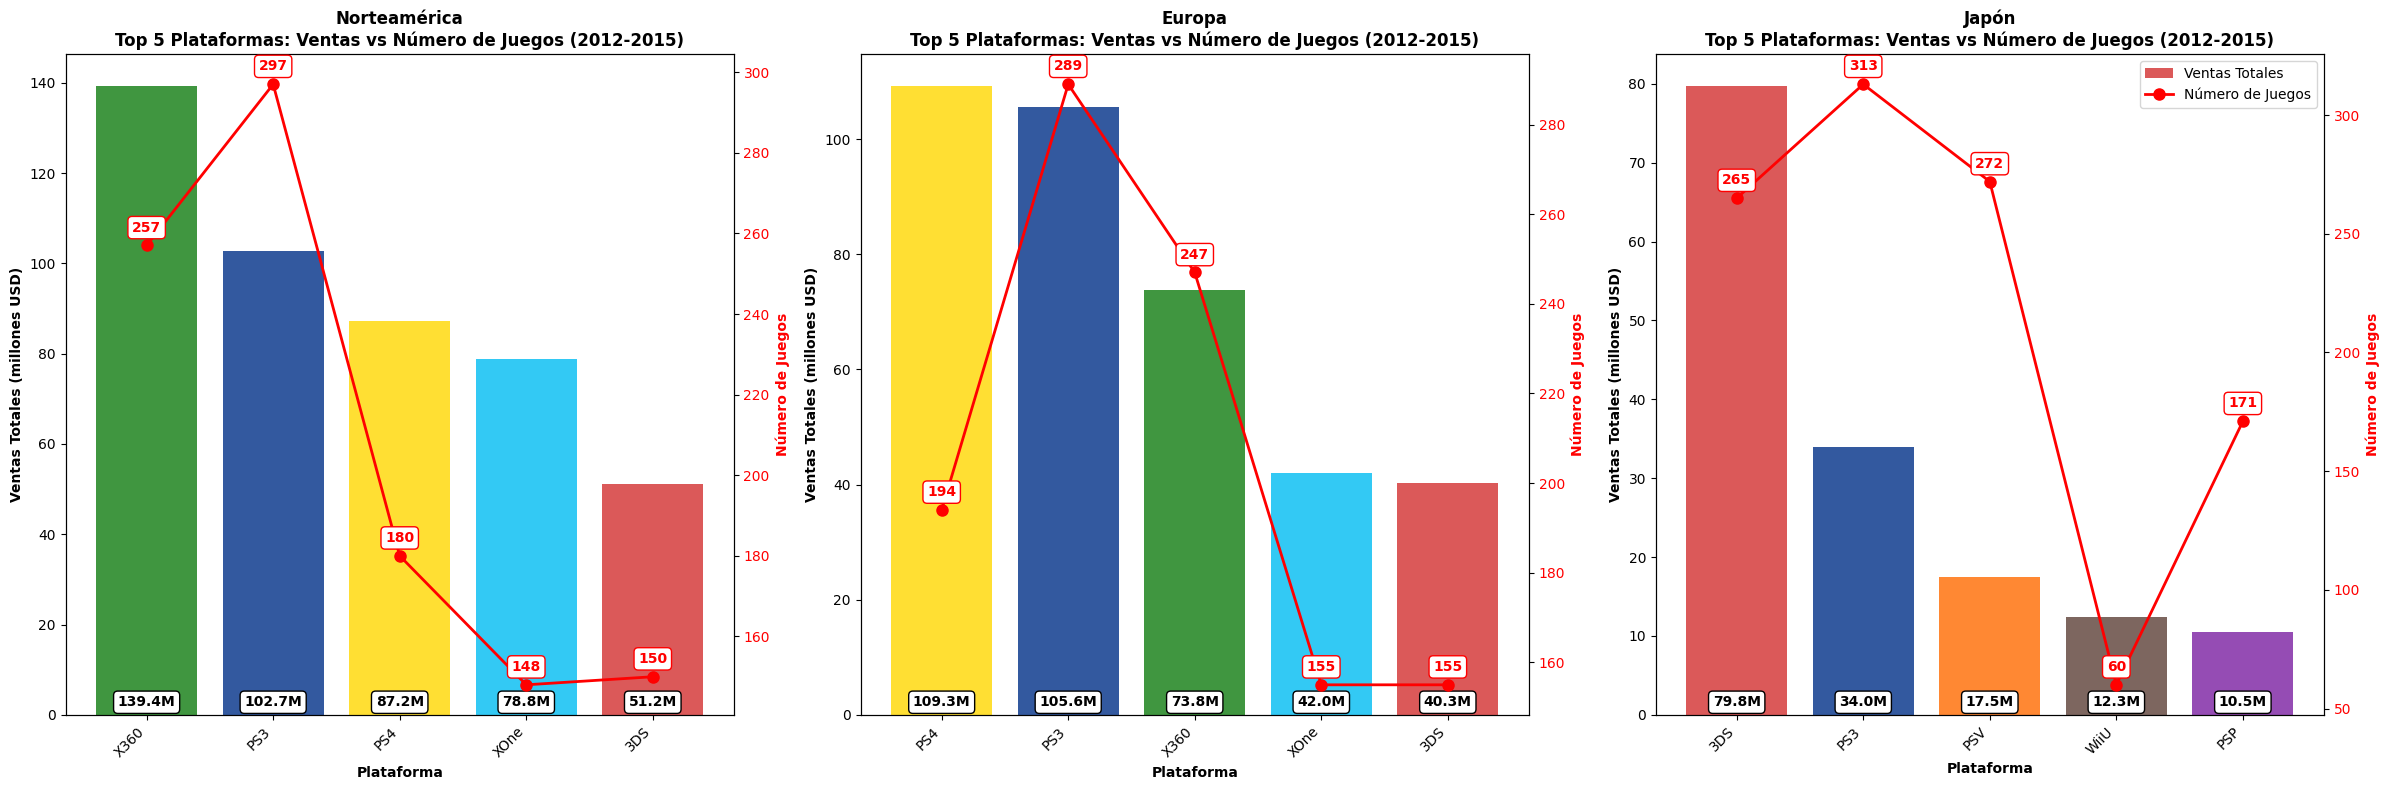

In [72]:
# Crear figura con 3 subgráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Definir las regiones y sus columnas de ventas correspondientes
regiones_info = [
    ('Norteamérica', 'na_sales'),
    ('Europa', 'eu_sales'), 
    ('Japón', 'jp_sales')
]

# Definir colores para cada plataforma
colores_plataformas = {
    'PS4': '#FFD700',        # Dorado
    'PS3': '#003087',        # Azul 
    'X360': '#107C10',       # Verde 
    'XOne': '#00BCF2',       # Azul 
    '3DS': '#D32F2F',        # Rojo intenso
    'PSV': '#FF6B00',        # Naranja
    'WiiU': '#5D4037',       # Marrón intenso
    'PSP': '#7B1FA2',       # Púrpura intenso
}


for i, (region_name, sales_col) in enumerate(regiones_info):
    ax = axes[i]
    ax2 = ax.twinx()

    # Calcular ventas totales por plataforma para la región
    ventas_por_plataforma = period_data.groupby('platform')[sales_col].sum().sort_values(ascending=False)

    # Obtener top 5 plataformas
    top5_plataformas = ventas_por_plataforma.head(5)
    plataformas = top5_plataformas.index.tolist()
    ventas = top5_plataformas.values

    # Contar número de juegos por plataforma en la región
    juegos_count = []
    for plataforma in plataformas:
        count = len(period_data[(period_data['platform'] == plataforma) & (period_data[sales_col] > 0)])
        juegos_count.append(count)

    # Crear barras con colores específicos por plataforma
    colores_barras = [colores_plataformas.get(plataforma, '#808080') for plataforma in plataformas]
    bars = ax.bar(range(len(plataformas)), ventas, color=colores_barras, alpha=0.8,
                  label='Ventas Totales')

    # Crear línea roja con puntos
    line = ax2.plot(range(len(plataformas)), juegos_count, color='red', marker='o',
                    linewidth=2, markersize=8, label='Número de Juegos')

    # Configurar ejes
    ax.set_xlabel('Plataforma', fontweight='bold')
    ax.set_ylabel('Ventas Totales (millones USD)', fontweight='bold')
    ax2.set_ylabel('Número de Juegos', fontweight='bold', color='red')

    # Configurar título
    ax.set_title(f'{region_name}\nTop 5 Plataformas: Ventas vs Número de Juegos (2012-2015)',
                 fontweight='bold', fontsize=12)
    
    # Configurar etiquetas del eje X
    ax.set_xticks(range(len(plataformas)))
    ax.set_xticklabels(plataformas, rotation=45, ha='right')
    
    # Agregar valores debajo de las barras (encerrados)
    for j, (bar, venta) in enumerate(zip(bars, ventas)):
        ax.text(bar.get_x() + bar.get_width()/2., max(ventas) * 0.02,
                f'{venta:.1f}M', ha='center', va='center', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black"))
    
    # Agregar valores sobre los puntos de la línea (número de juegos)
    for j, (x, juegos) in enumerate(zip(range(len(plataformas)), juegos_count)):
        ax2.annotate(f'{juegos}', (x, juegos), textcoords="offset points",
                    xytext=(0,10), ha='center', fontweight='bold', color='red',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="red"))
    
    # Configurar colores de los ejes
        ax2.tick_params(axis='y', labelcolor='red')
    
    # Agregar leyenda solo en el último gráfico
    if i == 2:
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Ajustar el layout final
plt.tight_layout()
plt.show()

In [73]:
# ANÁLISIS DE VARIACIONES REGIONALES - 3 TABLAS ESPECÍFICAS
print("=== ANÁLISIS DE VARIACIONES EN CUOTAS DE MERCADO ===")
print("Período 2012-2015")
print()

# Calcular totales por región para porcentajes
total_na = platform_regional['na_sales'].sum()
total_eu = platform_regional['eu_sales'].sum()
total_jp = platform_regional['jp_sales'].sum()

print(f"Totales por región:")
print(f"Norteamérica: {total_na:.1f}M")
print(f"Europa: {total_eu:.1f}M") 
print(f"Japón: {total_jp:.1f}M")
print()

=== ANÁLISIS DE VARIACIONES EN CUOTAS DE MERCADO ===
Período 2012-2015

Totales por región:
Norteamérica: 546.0M
Europa: 455.6M
Japón: 173.3M



In [74]:
# ANÁLISIS UNIFICADO: VARIACIONES DE CUOTAS DE MERCADO POR REGIÓN
print("=== ANÁLISIS COMPLETO DE VARIACIONES REGIONALES ===")
print("Período 2012-2015 - Principales plataformas")
print()

# Calcular datos regionales para el período 2012-2015
platform_regional = period_data.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'total_sales_clean': 'sum'
}).round(1)

# Calcular totales por región
total_na = platform_regional['na_sales'].sum()
total_eu = platform_regional['eu_sales'].sum()
total_jp = platform_regional['jp_sales'].sum()

# Obtener plataformas principales (top 8 globales)
top_platforms = platform_regional.sort_values('total_sales_clean', ascending=False).head(8)

# Crear tabla unificada de variaciones
tabla_variaciones = pd.DataFrame()

for platform in top_platforms.index:
    # Ventas y cuotas por región
    na_ventas = platform_regional.loc[platform, 'na_sales']
    eu_ventas = platform_regional.loc[platform, 'eu_sales'] 
    jp_ventas = platform_regional.loc[platform, 'jp_sales']

    na_cuota = (na_ventas / total_na * 100)
    eu_cuota = (eu_ventas / total_eu * 100)
    jp_cuota = (jp_ventas / total_jp * 100)

    # Determinar región líder
    cuotas = {'NA': na_cuota, 'EU': eu_cuota, 'JP': jp_cuota}
    region_lider = max(cuotas, key=cuotas.get)
    cuota_lider = max(cuotas.values())

    # Calcular variaciones respecto a la región líder
    if region_lider == 'NA':
        var_eu = eu_cuota - na_cuota
        var_jp = jp_cuota - na_cuota
        tabla_variaciones.loc[platform, 'Región_Líder'] = f"NA: {na_cuota:.1f}%"
        tabla_variaciones.loc[platform, 'EU_Variación'] = f"{eu_cuota:.1f}% ({var_eu:+.1f}pp)"
        tabla_variaciones.loc[platform, 'JP_Variación'] = f"{jp_cuota:.1f}% ({var_jp:+.1f}pp)"

    elif region_lider == 'EU':
        var_na = na_cuota - eu_cuota
        var_jp = jp_cuota - eu_cuota
        tabla_variaciones.loc[platform, 'Región_Líder'] = f"EU: {eu_cuota:.1f}%"
        tabla_variaciones.loc[platform, 'NA_Variación'] = f"{na_cuota:.1f}% ({var_na:+.1f}pp)"
        tabla_variaciones.loc[platform, 'JP_Variación'] = f"{jp_cuota:.1f}% ({var_jp:+.1f}pp)"
    
    elif region_lider == 'JP':
        var_na = na_cuota - jp_cuota
        var_eu = eu_cuota - jp_cuota
        tabla_variaciones.loc[platform, 'Región_Líder'] = f"JP: {jp_cuota:.1f}%"
        tabla_variaciones.loc[platform, 'NA_Variación'] = f"{na_cuota:.1f}% ({var_na:+.1f}pp)"
        tabla_variaciones.loc[platform, 'EU_Variación'] = f"{eu_cuota:.1f}% ({var_eu:+.1f}pp)"

# Mostrar la tabla de variaciones
print(tabla_variaciones)

=== ANÁLISIS COMPLETO DE VARIACIONES REGIONALES ===
Período 2012-2015 - Principales plataformas

     Región_Líder    NA_Variación    JP_Variación    EU_Variación
PS3     EU: 23.2%  18.8% (-4.4pp)  19.6% (-3.6pp)             NaN
PS4     EU: 24.0%  16.0% (-8.0pp)  5.9% (-18.1pp)             NaN
X360    NA: 25.5%             NaN  0.9% (-24.6pp)  16.2% (-9.3pp)
3DS     JP: 46.0%  9.4% (-36.7pp)             NaN  8.8% (-37.2pp)
XOne    NA: 14.4%             NaN  0.2% (-14.3pp)   9.2% (-5.2pp)
WiiU     JP: 7.1%   6.6% (-0.5pp)             NaN   5.2% (-1.9pp)
PC       EU: 7.5%   3.3% (-4.2pp)   0.0% (-7.5pp)             NaN
PSV     JP: 10.1%   2.0% (-8.1pp)             NaN   2.4% (-7.7pp)


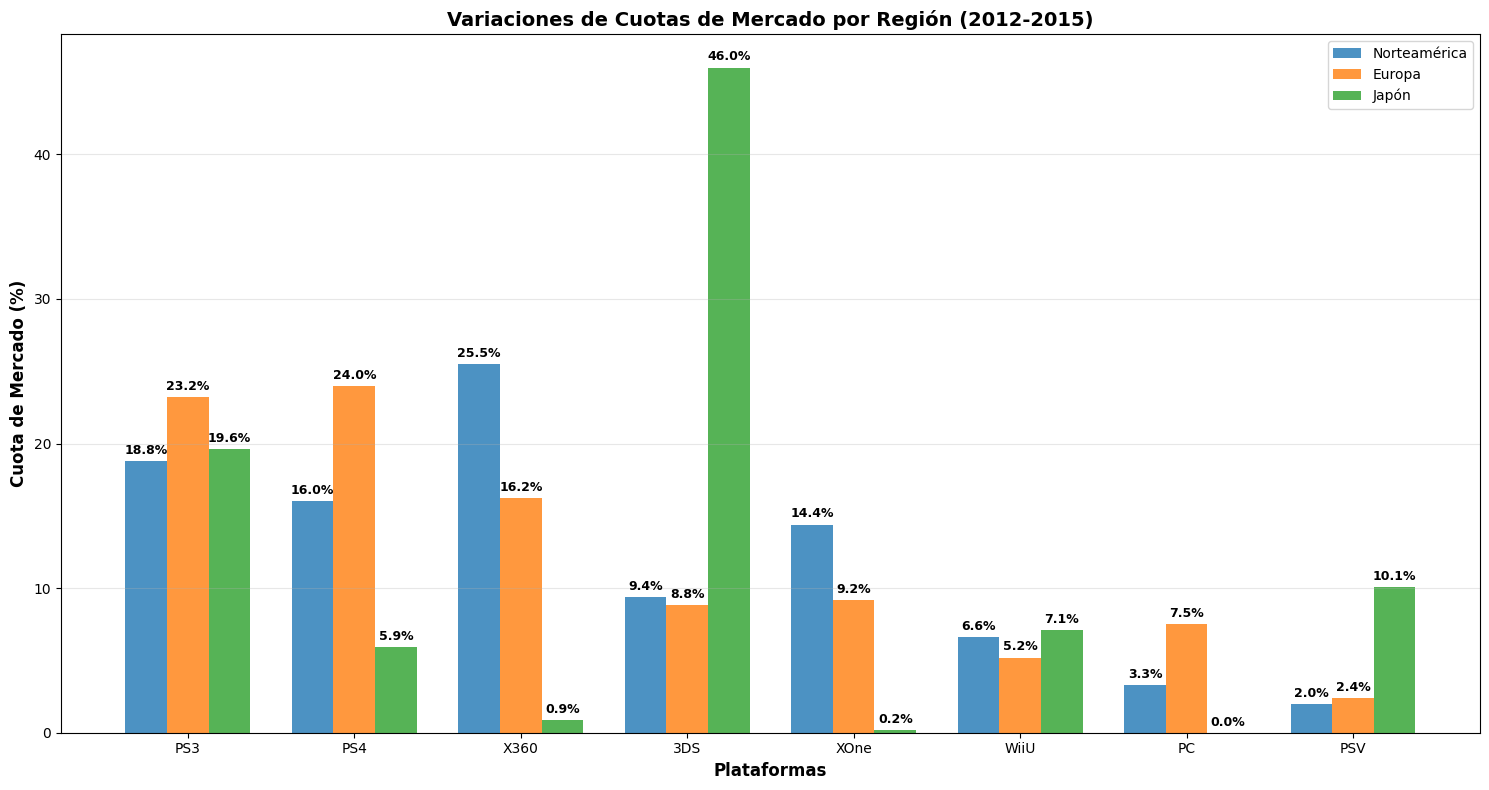

In [75]:
# Crear gráfico de barras agrupadas para mostrar variaciones regionales
import matplotlib.pyplot as plt
import numpy as np

# Preparar datos para el gráfico
platforms = ['PS3', 'PS4', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']
na_values = [18.8, 16.0, 25.5, 9.4, 14.4, 6.6, 3.3, 2.0]
eu_values = [23.2, 24.0, 16.2, 8.8, 9.2, 5.2, 7.5, 2.4]
jp_values = [19.6, 5.9, 0.9, 46.0, 0.2, 7.1, 0.0, 10.1]

# Configurar el gráfico
x = np.arange(len(platforms))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 8))

# Crear barras para cada región
bars1 = ax.bar(x - width, na_values, width, label='Norteamérica', color='#1f77b4', alpha=0.8)
bars2 = ax.bar(x, eu_values, width, label='Europa', color='#ff7f0e', alpha=0.8)
bars3 = ax.bar(x + width, jp_values, width, label='Japón', color='#2ca02c', alpha=0.8)

# Personalizar el gráfico
ax.set_xlabel('Plataformas', fontweight='bold', fontsize=12)
ax.set_ylabel('Cuota de Mercado (%)', fontweight='bold', fontsize=12)
ax.set_title('Variaciones de Cuotas de Mercado por Región (2012-2015)', 
             fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(platforms)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=9, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.tight_layout()
plt.show()

### Conclusiones: Análisis Regional de Plataformas (2012-2015)

**Transición PS3 → PS4 y Xbox 360 → Xbox One en NA y EU**

Norteamérica:

- Transición Xbox dominante: Xbox 360 lidera con 25.5% del mercado, mientras Xbox One alcanza 14.4%, mostrando una migración gradual pero sólida dentro del ecosistema Microsoft
- PlayStation en recuperación: PS3 mantiene 18.8% mientras PS4 crece a 16.0%, evidenciando una transición más lenta pero constante
- Patrón de migración: Los usuarios mantienen lealtad de marca durante la transición generacional

Europa:

- Dominio PlayStation consolidado: PS4 lidera con 24.0% seguido por PS3 con 23.2%, mostrando una transición más acelerada y exitosa hacia la nueva generación
- Xbox en declive relativo: Xbox 360 cae a 16.2% y Xbox One solo alcanza 9.2%, evidenciando menor penetración del ecosistema Microsoft en Europa
- Migración más rápida: Europa adopta las nuevas consolas más rápidamente que Norteamérica

** Comportamiento Único de Japón: Dominio de 3DS**

Patrón Atípico Japonés:

- 3DS domina absolutamente: 46.0% del mercado, casi la mitad del gaming japonés se concentra en esta plataforma portátil
- PS4 y Xbox One ausentes del top 5: Evidencia que la transición generacional occidental no aplica en Japón
- PS3 como segunda opción: 19.6% del mercado, manteniendo relevancia como consola de sobremesa principal
- Ecosistema portátil: PSV (10.1%) confirma la preferencia japonesa por gaming móvil

**Implicaciones Estratégicas para 2017**

Mercados Occidentales (NA/EU):

- Enfocar inversión en PS4 y Xbox One como plataformas principales
- Mantener soporte limitado para PS3/Xbox 360 en mercados de transición lenta
- Europa presenta mayor oportunidad para PlayStation, Norteamérica para Xbox

Mercado Japonés:

- Estrategia completamente diferente: priorizar 3DS y gaming portátil
- Evitar inversión significativa en Xbox (presencia mínima)
- PS3 mantiene relevancia como opción de consola doméstica

**Conclusión Clave:**

El éxito comercial de un videojuego depende críticamente de la adaptación regional de la estrategia de plataformas: Norteamérica (46.5% del mercado global) requiere enfoque en Xbox 360 (139.4M) y PS3 (102.7M) con transición hacia PS4 (87.2M); Europa (38.8% del mercado) demanda priorización de PS4 (109.3M) y PS3 (105.6M) con menor penetración Xbox; mientras que Japón (14.7% del mercado) opera bajo una lógica completamente diferente donde 3DS domina absolutamente (79.8M - 46.0% del mercado japonés), evidenciando que las plataformas portátiles son fundamentales para el éxito en este mercado.

Implicaciones estratégicas para detectar proyectos prometedores:

- Distribución de presupuesto publicitario proporcional al tamaño del mercado
- Estrategias diferenciadas por región para maximizar penetración
- Timing crítico para aprovechar las transiciones generacionales

### 4.2 Top 5 géneros

In [76]:
# ANÁLISIS DE GÉNEROS POR REGIÓN (2012-2015)
print("=== ANÁLISIS DE GÉNEROS POR REGIÓN ===")
print("Período 2012-2015")
print()

# Calcular ventas por género y región usando los datos del período
genre_regional = period_data.groupby('genre').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'total_sales_clean': 'sum'
}).round(2)

# Calcular totales por región para porcentajes
total_na_genre = genre_regional['na_sales'].sum()
total_eu_genre = genre_regional['eu_sales'].sum()
total_jp_genre = genre_regional['jp_sales'].sum()

print(f"Totales por región:")
print(f"Norteamérica: {total_na_genre:.1f}M")
print(f"Europa: {total_eu_genre:.1f}M") 
print(f"Japón: {total_jp_genre:.1f}M")
print()

=== ANÁLISIS DE GÉNEROS POR REGIÓN ===
Período 2012-2015

Totales por región:
Norteamérica: 546.0M
Europa: 455.6M
Japón: 173.3M



In [77]:
# Crear análisis de géneros por región primero
genre_regional = period_data.groupby('genre').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'total_sales_clean': 'sum'
}).round(2)

# Calcular totales por región para los géneros
total_na_genre = genre_regional['na_sales'].sum()
total_eu_genre = genre_regional['eu_sales'].sum()
total_jp_genre = genre_regional['jp_sales'].sum()

# Función crear_tabla_top5_generos
def crear_tabla_top5_generos(region_col, region_name, total_region):
    top5 = genre_regional.sort_values(region_col, ascending=False).head(5)
    tabla = pd.DataFrame()
    for i, (genre, data) in enumerate(top5.iterrows(), 1):
        ventas = data[region_col]
        porcentaje = (ventas / total_region) * 100
        tabla.loc[genre, 'Ranking'] = i
        tabla.loc[genre, 'Ventas_M'] = f"{ventas:.1f}M"
        tabla.loc[genre, 'Porcentaje'] = f"{porcentaje:.1f}%"
    return tabla

# Crear tablas para cada región
tabla_na = crear_tabla_top5_generos('na_sales', 'Norteamérica', total_na_genre)
tabla_eu = crear_tabla_top5_generos('eu_sales', 'Europa', total_eu_genre)
tabla_jp = crear_tabla_top5_generos('jp_sales', 'Japón', total_jp_genre)

# Mostrar resultados
print("🇺🇸 NORTEAMÉRICA - TOP 5 GÉNEROS:")
print(tabla_na[['Ranking', 'Ventas_M', 'Porcentaje']])
print("\n🇪🇺 EUROPA - TOP 5 GÉNEROS:")
print(tabla_eu[['Ranking', 'Ventas_M', 'Porcentaje']])
print("\n🇯🇵 JAPÓN - TOP 5 GÉNEROS:")
print(tabla_jp[['Ranking', 'Ventas_M', 'Porcentaje']])

🇺🇸 NORTEAMÉRICA - TOP 5 GÉNEROS:
              Ranking Ventas_M Porcentaje
Action            1.0   168.6M      30.9%
Shooter           2.0   128.5M      23.5%
Sports            3.0    74.0M      13.6%
Role-Playing      4.0    58.1M      10.6%
Misc              5.0    37.4M       6.9%

🇪🇺 EUROPA - TOP 5 GÉNEROS:
              Ranking Ventas_M Porcentaje
Action            1.0   148.7M      32.6%
Shooter           2.0    97.6M      21.4%
Sports            3.0    57.1M      12.5%
Role-Playing      4.0    44.2M       9.7%
Misc              5.0    25.7M       5.6%

🇯🇵 JAPÓN - TOP 5 GÉNEROS:
              Ranking Ventas_M Porcentaje
Role-Playing      1.0    58.8M      34.0%
Action            2.0    45.7M      26.4%
Misc              3.0    11.8M       6.8%
Simulation        4.0    10.1M       5.8%
Fighting          5.0     8.7M       5.0%


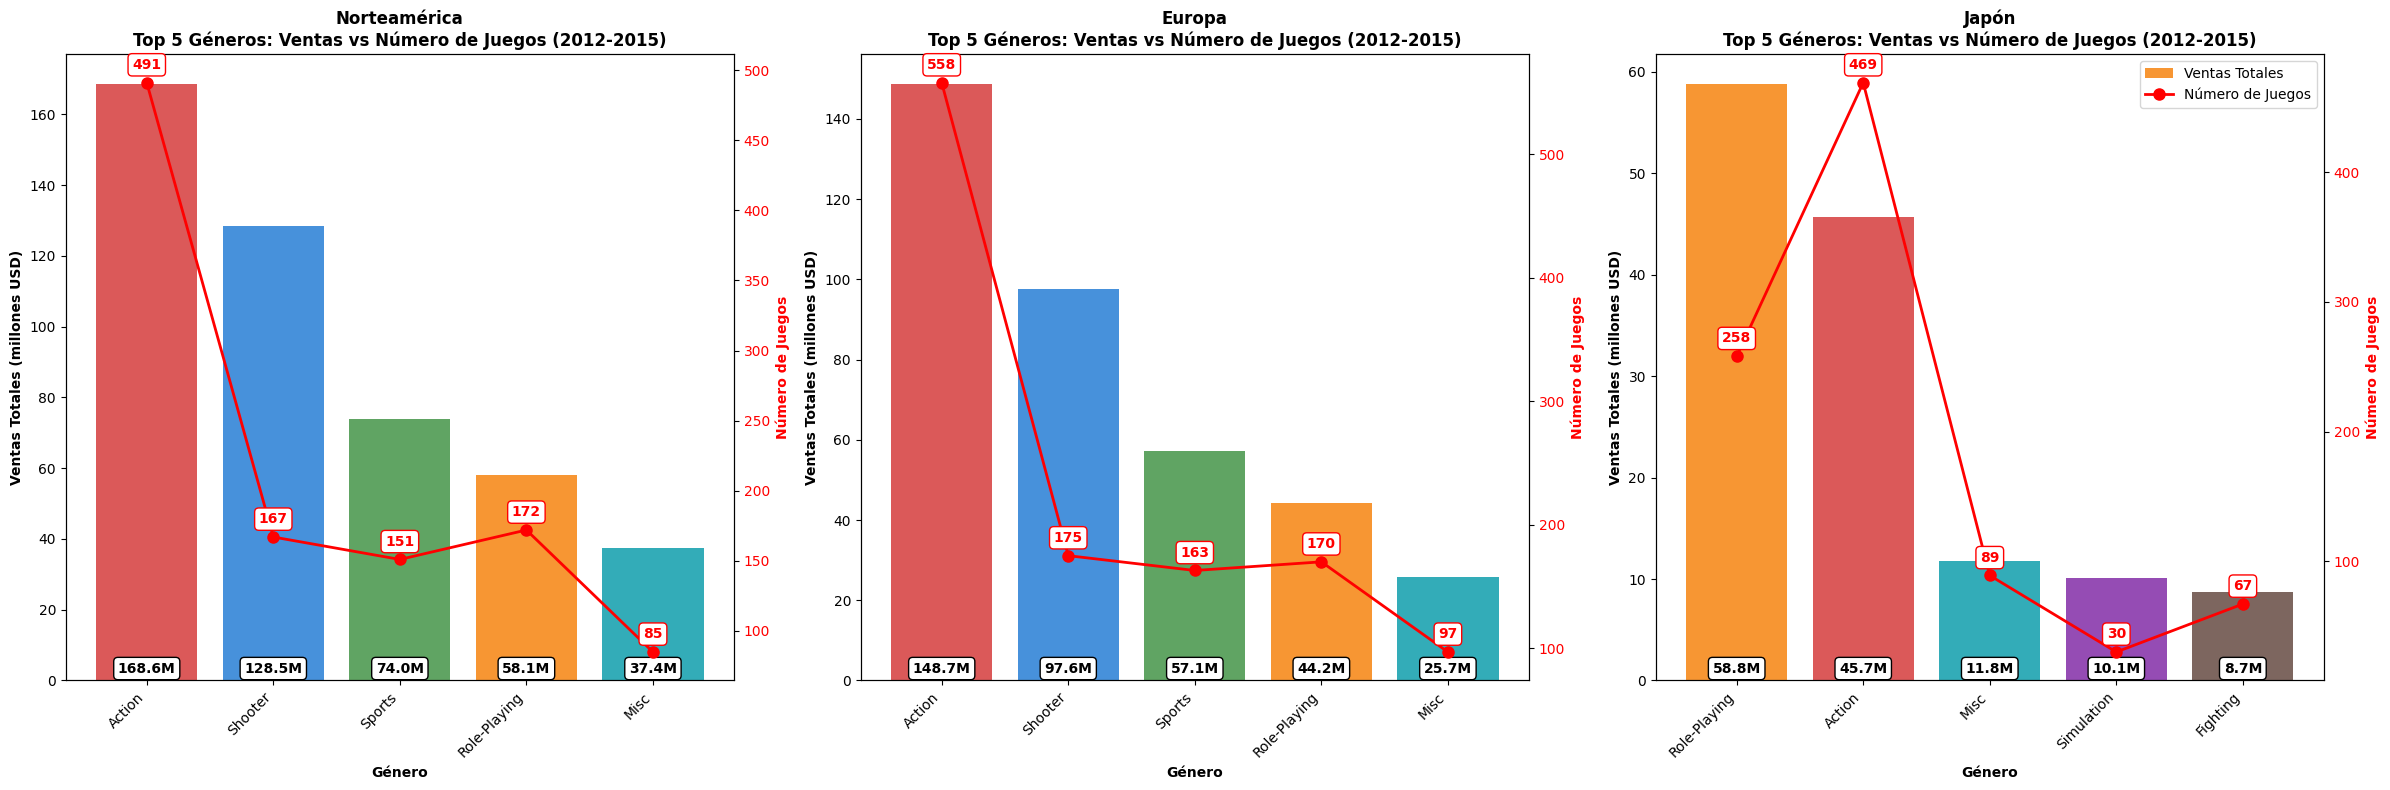

In [78]:
# Crear figura con 3 subgráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Datos para cada región
regiones_data = [
    ('Norteamérica', 'na_sales', tabla_na),
    ('Europa', 'eu_sales', tabla_eu),
    ('Japón', 'jp_sales', tabla_jp)
]

# Definir colores para cada género
colores_generos = {
    'Action': '#D32F2F',        # Rojo intenso
    'Shooter': '#1976D2',       # Azul intenso (cambio)
    'Sports': '#388E3C',        # Verde intenso (cambio)
    'Role-Playing': '#F57C00',  # Naranja intenso
    'Misc': '#0097A7',          # Cian intenso
    'Simulation': '#7B1FA2',    # Púrpura intenso
    'Fighting': '#5D4037',      # Marrón intenso
}

for i, (region_name, sales_col, tabla_region) in enumerate(regiones_data):
    ax = axes[i]
    ax2 = ax.twinx()
    
    # Obtener géneros del top 5
    generos = tabla_region.index
    
    # Extraer ventas de la tabla
    ventas = [float(tabla_region.loc[g, 'Ventas_M'].replace('M', '')) for g in generos]
    
    # Contar juegos por género
    juegos_count = []
    for genero in generos:
        count = len(period_data[(period_data['genre'] == genero) & (period_data[sales_col] > 0)])
        juegos_count.append(count)
    
    # Crear barras verdes
    colores_barras = [colores_generos.get(genero, 'lightgray') for genero in generos]
    bars = ax.bar(range(len(generos)), ventas, color=colores_barras, alpha=0.8,
              label='Ventas Totales')
    
    # Crear línea roja con puntos
    line = ax2.plot(range(len(generos)), juegos_count, color='red', marker='o',
                    linewidth=2, markersize=8, label='Número de Juegos')
    
    # Configurar ejes
    ax.set_xlabel('Género', fontweight='bold')
    ax.set_ylabel('Ventas Totales (millones USD)', fontweight='bold')
    ax2.set_ylabel('Número de Juegos', fontweight='bold', color='red')
    
    # Configurar título
    ax.set_title(f'{region_name}\nTop 5 Géneros: Ventas vs Número de Juegos (2012-2015)',
                 fontweight='bold', fontsize=12)
    
    # Configurar etiquetas del eje X
    ax.set_xticks(range(len(generos)))
    ax.set_xticklabels(generos, rotation=45, ha='right')
    
    # Agregar valores debajo de las barras (encerrados)
    for j, (bar, venta) in enumerate(zip(bars, ventas)):
        ax.text(bar.get_x() + bar.get_width()/2., max(ventas) * 0.02,
                f'{venta:.1f}M', ha='center', va='center', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black"))
    
    # Agregar valores sobre los puntos de la línea (en rojo)
    for j, (x, juegos) in enumerate(zip(range(len(generos)), juegos_count)):
        ax2.annotate(f'{juegos}', (x, juegos), textcoords="offset points",
                     xytext=(0,10), ha='center', fontweight='bold', color='red',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="red"))
    
    # Configurar colores de los ejes
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Agregar leyenda solo en el último gráfico
    if i == 2:
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

### Conclusión: Patrones de Géneros por Región 

Patrones Identificados:
1. Convergencia Occidental (NA/EU):

- Dominio Action-Shooter: Representan 54.4% (NA) y 54.0% (EU) del mercado
- Patrón casi idéntico: Action lidera (30.9% vs 32.6%), Shooter segundo lugar (23.5% vs 21.4%)
- Mercado combinado: 317.3M en Action + 226.1M en Shooter = 543.4M en estos dos géneros

2. Divergencia Cultural Japonesa:

- Role-Playing dominante: 34.0% del mercado (vs 10.6% NA, 9.7% EU)
- Ausencia crítica: Shooter ni siquiera aparece en top 5
- Géneros únicos: Simulation (5.8%) y Fighting (5.0%) exclusivos del mercado japonés
- Mercado total menor: 173.0M vs 546.6M (NA) y 456.1M (EU)

3. Implicaciones Estratégicas para 2017:

Distribución de Presupuesto de Desarrollo:

- 70% para mercados occidentales: Priorizar Action/Shooter
  - Action: Inversión segura (317.3M mercado combinado)
  - Shooter: Alta rentabilidad por título (226.1M mercado combinado)
- 30% para mercado japonés: Estrategia Role-Playing exclusiva
  - Role-Playing: 58.8M en Japón vs solo 102.3M combinado NA/EU
  - Evitar completamente géneros Shooter para Japón

**Conclusión Clave:**

El análisis de géneros revela tres mercados completamente diferenciados que requieren estrategias de desarrollo y marketing específicas. Los mercados occidentales (Norteamérica: 46.5% del mercado global, Europa: 38.8%) muestran una convergencia notable en preferencias con Action-Shooter dominando 54.4% y 54.0% respectivamente, mientras que Japón (14.7% del mercado global) opera bajo una lógica cultural completamente distinta donde Role-Playing lidera con 34.0% y Shooter ni siquiera aparece en el top 5. Esta divergencia cultural redefine las prioridades de inversión: desarrollar dos líneas de productos completamente separadas es fundamental - Action/Shooter para mercados occidentales (543.4M en ventas combinadas) y Role-Playing para Japón (58.8M con 34.0% de penetración). La estrategia 'one-size-fits-all' resultaría en pérdida significativa de oportunidades de mercado, especialmente considerando que los géneros exitosos en occidente (Shooter) son completamente irrelevantes en Japón.

### 4.3 Afectación de las clasificaciones de ESRB en las ventas en regiones individuales

In [79]:
# Análisis de clasificaciones ESRB por región (2012-2015)
print("=== ANÁLISIS DE CLASIFICACIONES ESRB POR REGIÓN ===")
print("Período 2012-2015")
print()

# Filtrar datos con clasificación ESRB válida
esrb_data = period_data.dropna(subset=['rating']).copy()
print(f"Juegos con clasificación ESRB: {len(esrb_data)} de {len(period_data)} total")
print(f"Porcentaje de cobertura: {len(esrb_data)/len(period_data)*100:.1f}%")
print()

# Calcular ventas por clasificación ESRB y región
esrb_regional = esrb_data.groupby('rating').agg({
    'na_sales': ['count', 'sum', 'mean'],
    'eu_sales': ['count', 'sum', 'mean'],
    'jp_sales': ['count', 'sum', 'mean'],
    'total_sales_clean': ['count', 'sum', 'mean']
}).round(2)

# Aplanar nombres de columnas
esrb_regional.columns = ['NA_Count', 'NA_Total', 'NA_Promedio', 
                        'EU_Count', 'EU_Total', 'EU_Promedio',
                        'JP_Count', 'JP_Total', 'JP_Promedio',
                        'Global_Count', 'Global_Total', 'Global_Promedio']

print("ESTADÍSTICAS POR CLASIFICACIÓN ESRB:")
print(esrb_regional)

=== ANÁLISIS DE CLASIFICACIONES ESRB POR REGIÓN ===
Período 2012-2015

Juegos con clasificación ESRB: 1331 de 2384 total
Porcentaje de cobertura: 55.8%

ESTADÍSTICAS POR CLASIFICACIÓN ESRB:
        NA_Count  NA_Total  NA_Promedio  EU_Count  EU_Total  EU_Promedio  \
rating                                                                     
E            329    106.40         0.32       329     99.42         0.30   
E10+         256     71.89         0.28       256     51.56         0.20   
M            420    215.90         0.51       420    177.42         0.42   
T            326     57.07         0.18       326     43.17         0.13   

        JP_Count  JP_Total  JP_Promedio  Global_Count  Global_Total  \
rating                                                                
E            329     27.26         0.08           329        261.43   
E10+         256      7.74         0.03           256        146.36   
M            420     20.00         0.05           420        471.76  

In [80]:
# Análisis de penetración de clasificaciones por región
print("\n=== PENETRACIÓN DE CLASIFICACIONES POR REGIÓN ===")

# Calcular totales por región para porcentajes
total_na_esrb = esrb_regional['NA_Total'].sum()
total_eu_esrb = esrb_regional['EU_Total'].sum()
total_jp_esrb = esrb_regional['JP_Total'].sum()

print(f"Totales con clasificación ESRB:")
print(f"Norteamérica: {total_na_esrb:.1f}M")
print(f"Europa: {total_eu_esrb:.1f}M")
print(f"Japón: {total_jp_esrb:.1f}M")
print()

# Crear tabla de penetración por región
for region, total_col in [('Norteamérica', 'NA_Total'), ('Europa', 'EU_Total'), ('Japón', 'JP_Total')]:
    print(f" {region.upper()}:")
    total_region = esrb_regional[total_col].sum()
    
    for rating in esrb_regional.index:
        ventas = esrb_regional.loc[rating, total_col]
        porcentaje = (ventas / total_region) * 100 if total_region > 0 else 0
        juegos = esrb_regional.loc[rating, total_col.replace('Total', 'Count')]
        promedio = esrb_regional.loc[rating, total_col.replace('Total', 'Promedio')]
        
        print(f"  {rating}: {ventas:.1f}M ({porcentaje:.1f}%) - {juegos} juegos - {promedio:.2f}M promedio")
    print()


=== PENETRACIÓN DE CLASIFICACIONES POR REGIÓN ===
Totales con clasificación ESRB:
Norteamérica: 451.3M
Europa: 371.6M
Japón: 78.8M

 NORTEAMÉRICA:
  E: 106.4M (23.6%) - 329 juegos - 0.32M promedio
  E10+: 71.9M (15.9%) - 256 juegos - 0.28M promedio
  M: 215.9M (47.8%) - 420 juegos - 0.51M promedio
  T: 57.1M (12.6%) - 326 juegos - 0.18M promedio

 EUROPA:
  E: 99.4M (26.8%) - 329 juegos - 0.30M promedio
  E10+: 51.6M (13.9%) - 256 juegos - 0.20M promedio
  M: 177.4M (47.7%) - 420 juegos - 0.42M promedio
  T: 43.2M (11.6%) - 326 juegos - 0.13M promedio

 JAPÓN:
  E: 27.3M (34.6%) - 329 juegos - 0.08M promedio
  E10+: 7.7M (9.8%) - 256 juegos - 0.03M promedio
  M: 20.0M (25.4%) - 420 juegos - 0.05M promedio
  T: 23.8M (30.2%) - 326 juegos - 0.07M promedio



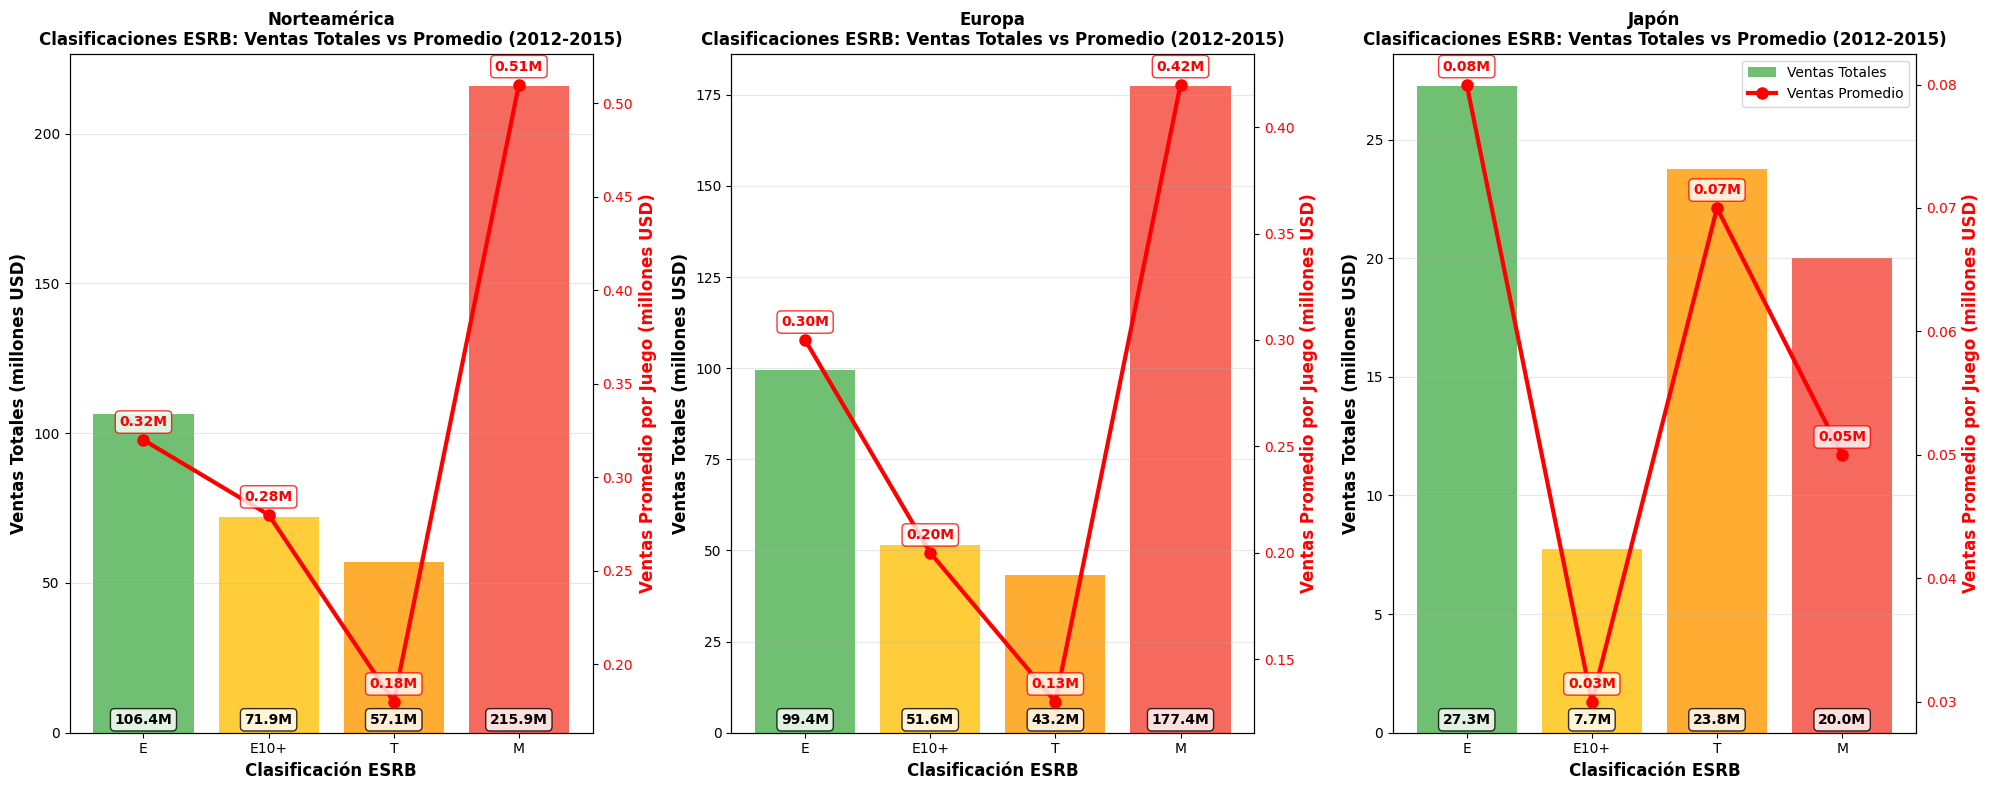

In [81]:
# Crear gráfico comparativo de clasificaciones ESRB por región
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Datos para cada región
regiones_esrb = [
    ('Norteamérica', 'NA_Total', 'NA_Promedio'),
    ('Europa', 'EU_Total', 'EU_Promedio'),
    ('Japón', 'JP_Total', 'JP_Promedio')
]

# Definir colores para cada clasificación ESRB
colores_esrb = {
    'E': '#4CAF50',      # Verde - Everyone
    'E10+': '#FFC107',   # Amarillo - Everyone 10+
    'T': '#FF9800',      # Naranja - Teen
    'M': '#F44336'       # Rojo - Mature
}

# Crear gráfico para cada región
for i, (region_name, total_col, promedio_col) in enumerate(regiones_esrb):
    ax = axes[i]
    ax2 = ax.twinx()

    # Orden deseado de clasificaciones ESRB
    orden_deseado = ['E', 'E10+', 'T', 'M']
    
    # Datos según el orden deseado
    clasificaciones = orden_deseado
    ventas_totales = [esrb_regional.loc[rating, total_col] for rating in orden_deseado]
    ventas_promedio = [esrb_regional.loc[rating, promedio_col] for rating in orden_deseado]

    # Crear barras para ventas totales
    colores_barras = [colores_esrb.get(rating, 'gray') for rating in clasificaciones]
    bars = ax.bar(range(len(clasificaciones)), ventas_totales, 
                  color=colores_barras, alpha=0.8, label='Ventas Totales')

    # Crear línea para ventas promedio
    line = ax2.plot(range(len(clasificaciones)), ventas_promedio, 
                    color='red', marker='o', linewidth=3, markersize=8, 
                    label='Ventas Promedio')

    # Configurar ejes
    ax.set_xlabel('Clasificación ESRB', fontweight='bold', fontsize=12)
    ax.set_ylabel('Ventas Totales (millones USD)', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Ventas Promedio por Juego (millones USD)', 
                   fontweight='bold', fontsize=12, color='red')

    # Título
    ax.set_title(f'{region_name}\nClasificaciones ESRB: Ventas Totales vs Promedio (2012-2015)',
                 fontweight='bold', fontsize=12)

    # Configurar etiquetas del eje X
    ax.set_xticks(range(len(clasificaciones)))
    ax.set_xticklabels(clasificaciones)


        # Agregar valores sobre las barras (ventas totales)
    for j, (bar, venta) in enumerate(zip(bars, ventas_totales)):
        ax.text(bar.get_x() + bar.get_width()/2., max(ventas_totales) * 0.02,
                f'{venta:.1f}M', ha='center', va='center', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", 
                         edgecolor="black", alpha=0.8))
    
    # Agregar valores sobre los puntos de la línea (ventas promedio)
    for j, (x, promedio) in enumerate(zip(range(len(clasificaciones)), ventas_promedio)):
        ax2.annotate(f'{promedio:.2f}M', (x, promedio), textcoords="offset points",
                    xytext=(0,10), ha='center', fontweight='bold', color='red',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", 
                             edgecolor="red", alpha=0.8))
    
    # Configurar colores de los ejes
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Agregar grid
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar leyenda solo en el último gráfico
    if i == 2:
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Ajustar el layout
plt.tight_layout()
plt.show()

### Conclusiones: Impacto de Clasificaciones ESRB por Región

Las clasificaciones ESRB si afectan significativamente las ventas regionales:

**Diferencias Culturales Claras:**

- Japón: Prefiere contenido familiar (E: 34.6% vs 23-27% en otras regiones). Rechaza contenido maduro (M: solo 25.4% vs ~48% en Occidente)
- Norteamérica y Europa: Patrones similares con alta aceptación de contenido M (~48% ambas regiones)
  
**Evidencia en Ventas Totales:**

- Juegos M dominan en Norteamérica (215.9M) y Europa (177.4M)
- En Japón, los juegos M tienen ventas mucho menores (20.0M)

**Ventas Promedio por Juego:**
- Japón: Mayor promedio en clasificación T (0.07M)
- Occidente: Mejor rendimiento en clasificaciones M

**Conclusión Final:**

Las clasificaciones ESRB reflejan y se adaptan a las preferencias culturales regionales. Japón favorece contenido menos restrictivo, mientras que los mercados occidentales aceptan mejor el contenido maduro, lo que directamente impacta las estrategias de desarrollo y marketing por región.

## Paso 5. Pruebas de hipótesis

En esta sección del análisis, aplicaremos métodos estadísticos para validar dos afirmaciones clave sobre las calificaciones de los videojuegos. Las pruebas de hipótesis nos permitirán determinar si las diferencias observadas en nuestros datos son estadísticamente significativas o simplemente producto del azar.

### 5.1 Prueba de hipótesis 1 

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [82]:
# Filtrar datos para Xbox One y PC, sin valores NaN
xbox_scores = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc_scores = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

print(f"Xbox One: {len(xbox_scores)} juegos")
print(f"PC: {len(pc_scores)} juegos")
print(f"Promedio Xbox One: {xbox_scores.mean():.2f}")
print(f"Promedio PC: {pc_scores.mean():.2f}")

Xbox One: 182 juegos
PC: 770 juegos
Promedio Xbox One: 6.52
Promedio PC: 7.06


In [83]:
from scipy import stats

# Filtrar datos para Xbox One y PC 
xbox_scores = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games[games['platform'] == 'PC']['user_score'].dropna()

# Prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores)

# Resultados
print("Prueba de hipótesis:")
print(f"H₀: Las calificaciones promedio son iguales")
print(f"H₁: Las calificaciones promedio son diferentes")
print(f"\nEstadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia: 0.05")

if p_value < 0.05:
    print("\nConclusión: Rechazamos H₀. Hay diferencia significativa.")
else:
    print("\nConclusión: No rechazamos H₀. No hay diferencia significativa.")

Prueba de hipótesis:
H₀: Las calificaciones promedio son iguales
H₁: Las calificaciones promedio son diferentes

Estadístico t: -4.3683
Valor p: 0.0000
Nivel de significancia: 0.05

Conclusión: Rechazamos H₀. Hay diferencia significativa.


### Conclusión del Análisis de Hipótesis 1

**Valor de umbral alfa establecido:**

α = 0.05 (5% de nivel de significancia)

Este es el umbral estándar en estadística que proporciona un equilibrio adecuado entre detectar diferencias reales y evitar falsos positivos.

**Formulación de hipótesis:**

Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- H₀: μ_Xbox = μ_PC

Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
- H₁: μ_Xbox ≠ μ_PC

**Criterio utilizado para probar las hipótesis:**

Utilicé la prueba t de Student para dos muestras independientes (stats.ttest_ind()) porque:

1. Comparamos dos grupos independientes: Xbox One vs PC
2. Variable cuantitativa: Calificaciones de usuarios (escala numérica)
3. Muestras grandes: Xbox One (182 juegos) y PC (770 juegos)
4. Prueba bilateral: Queremos detectar diferencias en cualquier dirección

**Resultados obtenidos:**
- Promedio Xbox One: 6.52
- Promedio PC: 7.06
- Estadístico t: -4.3683
- Valor p: 0.0000 (< 0.05)

**Conclusión:**

Rechazamos la hipótesis nula. Existe evidencia estadísticamente significativa de que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes. Los usuarios califican en promedio más alto los juegos de PC (7.06) que los de Xbox One (6.52), con una diferencia estadísticamente significativa (p < 0.05).

### 5.2 Prueba de hipótesis 2

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [84]:
# Filtrar datos para géneros de Acción y Deportes, sin valores NaN
action_scores = games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score']
sports_scores = games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score']

print(f"Acción: {len(action_scores)} juegos")
print(f"Deportes: {len(sports_scores)} juegos")
print(f"Promedio Acción: {action_scores.mean():.2f}")
print(f"Promedio Deportes: {sports_scores.mean():.2f}")

Acción: 1830 juegos
Deportes: 1103 juegos
Promedio Acción: 7.05
Promedio Deportes: 6.96


In [85]:
from scipy import stats

# Prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores)

# Formulación de las hipótesis
print("Prueba de hipótesis:")
print(f"H₀: Las calificaciones promedio son diferentes")
print(f"H₁: Las calificaciones promedio son iguales")

print(f"\nEstadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia: 0.05")

# Interpretación
if p_value < 0.05:
    print("\nConclusión: Rechazamos H₀. Las calificaciones son iguales (no diferentes).")
else:
    print("\nConclusión: No rechazamos H₀. Las calificaciones son diferentes.")

Prueba de hipótesis:
H₀: Las calificaciones promedio son diferentes
H₁: Las calificaciones promedio son iguales

Estadístico t: 1.6259
Valor p: 0.1041
Nivel de significancia: 0.05

Conclusión: No rechazamos H₀. Las calificaciones son diferentes.


### Conclusión del Análisis de Hipótesis 2

**Valor de umbral alfa establecido:**

α = 0.05 (5% de nivel de significancia)

Este es el umbral estándar en estadística que proporciona un equilibrio adecuado entre detectar diferencias reales y evitar falsos positivos.

**Formulación de hipótesis:**

Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- H₀: μ_Acción ≠ μ_Deportes

Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

- H₁: μ_Acción = μ_Deportes

**Criterio utilizado para probar las hipótesis:**

Utilicé la prueba t de Student para dos muestras independientes (stats.ttest_ind()) porque:

- Comparamos dos grupos independientes: Acción vs Deportes
- Variable cuantitativa: Calificaciones de usuarios (escala numérica)
- Muestras grandes: Acción (1830 juegos) y Deportes (1103 juegos)
- Prueba bilateral: Queremos detectar diferencias en cualquier dirección

**Resultados obtenidos:**

- Promedio Acción: 7.05
- Promedio Deportes: 6.96
- Estadístico t: 1.6259
- Valor p: 0.1041 (> 0.05)

**Conclusión:**

No rechazamos la hipótesis nula. No existe evidencia estadísticamente significativa para rechazar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Con un valor p = 0.1041 > 0.05, mantenemos que las calificaciones promedio entre estos géneros son diferentes, aunque la diferencia observada (7.05 vs 6.96) no es estadísticamente significativa para rechazar nuestra hipótesis nula.

# Paso 6. Conclusiones generales: Patrones que determinan el éxito de un videojuego

El análisis de los datos históricos de ventas de videojuegos permitió identificar patrones claros sobre qué factores influyen en el éxito comercial de un juego. Estos hallazgos ofrecen una base sólida para detectar proyectos prometedores, optimizar la inversión publicitaria y definir la estrategia de negocio de la tienda online Ice para 2017, considerando tanto el comportamiento global como las particularidades regionales.

1. El ciclo de vida de la industria y el período relevante de análisis

Los datos muestran un crecimiento acelerado de la industria desde mediados de los años 90, con un pico alrededor del año 2000, seguido de una desaceleración progresiva a partir de 2011. Entre **2012 y 2016, el mercado entra en una fase de estabilización**, lo que convierte este período en el más representativo para construir un modelo de decisión para 2017.

El año 2016 presenta ventas notablemente inferiores, especialmente en plataformas recientes como PS4 y Xbox One, lo que confirma que los datos están incompletos. Por esta razón, el análisis estratégico se centra en el período 2012–2015, evitando distorsiones y permitiendo identificar tendencias reales de mercado.

**Implicación estratégica:**

Para la toma de decisiones comerciales y de marketing, es clave basarse en datos recientes y estables, evitando ciclos obsoletos de la industria.

2. Plataformas: liderazgo, transición y concentración de ventas

Durante el período analizado, las ventas globales se concentran principalmente en cinco plataformas:

- PlayStation 3 y PlayStation 4, que muestran una transición exitosa y lideran las ventas globales.
- Xbox 360 y Xbox One, con una evolución similar pero con menor volumen que PlayStation.
- Nintendo 3DS, que mantiene una posición relevante a pesar de ser una plataforma portátil.

Los diagramas de caja revelan que PS4 y Xbox One concentran los mayores valores de ventas medianas y máximas, lo que indica que estas plataformas albergan los títulos más exitosos del mercado reciente. Al mismo tiempo, se observa que muchas plataformas tienen ciclos de vida cortos, desapareciendo en pocos años.

**Implicación estratégica:**

- Área comercial: priorizar títulos desarrollados para plataformas activas y en crecimiento (PS4 y Xbox One).
- Dirección: el éxito está fuertemente asociado a estar presente en plataformas vigentes, no solo a la calidad individual del juego.

3. Reseñas y ventas: el peso real de la crítica

El análisis de correlación entre reseñas y ventas, tomando a PS4 como referencia y comparándola con otras plataformas, revela un patrón consistente en el mercado. Las reseñas de críticos especializados presentan una correlación moderada y positiva con las ventas en las principales plataformas, mientras que las reseñas de usuarios muestran una relación débil o prácticamente inexistente, sin significancia estadística.

Esto indica que, aunque la opinión de los usuarios puede aportar valor reputacional, no es un factor determinante en el volumen de ventas. En contraste, la crítica profesional tiene una influencia más clara en la visibilidad y el desempeño comercial de los videojuegos, especialmente en plataformas con mayor alcance de mercado. En plataformas de menor tamaño, incluso esta influencia tiende a debilitarse, lo que resalta la importancia del contexto de cada ecosistema.

**Implicación estratégica:**

- Marketing: priorizar la inversión en medios especializados, reseñas profesionales y cobertura editorial, especialmente en plataformas líderes del mercado.
- Comercial: dar preferencia a títulos con buena recepción crítica, incluso cuando la percepción de los usuarios sea mixta, ya que la evidencia muestra que la valoración profesional es un indicador más confiable del potencial comercial.

4. Géneros: volumen, eficiencia y verdadero potencial de negocio

En términos de ventas totales, los géneros líderes son:

- Action
- Shooter
- Role Playing
- Sports
- Misc

Sin embargo, el análisis de ventas promedio por juego revela una realidad diferente:

- Shooter es el género más eficiente (mayor venta promedio por título).
- Platform, aunque no está en el top 5 de ventas totales, muestra un alto rendimiento por juego.
- Action, pese a su alto volumen total, presenta un promedio más bajo, lo que indica alta competencia y resultados desiguales.

Al analizar el ratio de ganancia y eficiencia, los géneros con mayor potencial estratégico son:

1. Action
2. Role Playing
3. Adventure
4. Sports
5. Shooter

**Implicación estratégica:**

- Área comercial: no solo priorizar géneros populares, sino aquellos que combinan volumen y eficiencia.
- Marketing: campañas diferenciadas; Action y Role Playing para alcance masivo, Shooter y Platform para alto retorno por título.

5. Diferencias regionales: un patrón global no aplica a todos los mercados

El análisis por región revela contrastes muy marcados:

**Norteamérica y Europa**

- Comportamiento muy similar en plataformas y géneros.
- Dominio de PS4 y Xbox.
- Preferencia por Action, Shooter y Sports.
- Mayor peso de juegos con clasificación M (adultos) en ventas.

**Japón**

Mercado claramente distinto:

- Nintendo 3DS concentra cerca del 46% de las ventas, manteniéndose como plataforma líder.
- PS3 sigue siendo relevante, mientras que PS4, Xbox 360 y Xbox One tienen presencia mínima.
- Role Playing es el género número uno.
- Shooter prácticamente no aparece.
- Mayor preferencia por juegos clasificados como E (para todo público).

Este fenómeno responde a factores culturales, históricos y de consumo:

- Fuerte arraigo de consolas portátiles.
- Preferencia por narrativas profundas y juegos de rol.
- Menor adopción de consolas occidentales.

**Implicación estratégica:**

- Marketing: campañas completamente diferenciadas por región.
- Comercial: no replicar estrategias globales en Japón; priorizar Role Playing, 3DS y contenido familiar.
- Dirección: el éxito global no garantiza éxito local.

## Conclusión final estratégica para de la tienda online Ice para 2017

El éxito de un videojuego no depende de un solo factor, sino de la combinación adecuada entre plataforma vigente, género con alto potencial, recepción crítica favorable y, especialmente, adaptación a las particularidades de cada mercado regional. El análisis evidencia que tomar decisiones basadas únicamente en ventas globales puede resultar ineficiente si no se consideran la eficiencia por título y el peso relativo de cada región en el total de ingresos.

Durante el período 2012–2015, **las ventas se concentraron principalmente en Norteamérica (≈46% del total) y Europa (≈39%)**, mientras que Japón representó alrededor del 15%. Esta distribución confirma que, aunque Japón presenta patrones de consumo claramente diferenciados, las estrategias de inversión deben ajustarse proporcionalmente al tamaño de cada mercado.

Para maximizar ventas y optimizar campañas publicitarias en 2017, la tienda online Ice debería:

- **Priorizar PS4 y Xbox One en mercados occidentales**, donde se concentra cerca del 85 % de las ventas totales, asegurando el mayor retorno esperado sobre la inversión comercial.

- Enfocar el **portafolio global en los géneros Action y Role Playing** por su alto potencial estratégico, complementados por **Shooter en Norteamérica y Europa**, donde este género muestra un desempeño sólido tanto en volumen como en eficiencia.

- Asignar una **mayor proporción del presupuesto de marketing a Norteamérica y Europa**, alineada con su peso en ventas (≈46 % y ≈39 % respectivamente), maximizando alcance y rentabilidad de las campañas.

- Diseñar **estrategias específicas para Japón**, con una inversión proporcionalmente menor pero altamente focalizada, centrada en **Nintendo 3DS, Role Playing y contenidos aptos para todo público**, reflejando las preferencias culturales y de plataforma del mercado japonés.

- **Aprovechar la crítica especializada como palanca comercial**, dado su impacto positivo en plataformas líderes como PS4 y Xbox One, especialmente en mercados occidentales.

En conjunto, estos patrones permiten a la tienda online Ice identificar proyectos prometedores con mayor precisión, optimizar la asignación de recursos publicitarios por región y reducir riesgos comerciales, alineando la estrategia de negocio con el comportamiento real de los jugadores a nivel global y regional.